<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Science Immersive - Capstone Project

---

## Predicting delayed flights and improving operational performance  


<br/><br/>


### Introduction


#### Background

Flight delays are not only painful for passengers, they are also a major problem for airlines.  
Flights departing after a 15-minute "grace period" are considered delayed, representing on average 21% of the total. The average delay costs the company about $1,100 USD per flight. Fuel and crew costs are, by far, the largest cost driver, followed by aircraft maintenance and ownership. 



#### Objectives

The goals of this project is to create a classification model which can:

- Identify the most important factors leading to a delayed flight.
- Provide insights to the airport operator in order to reduce the overall delays and improve business performance.


#### Data Source

The data used for this project come from the operational database of a major international airport containing all the flights made in 2013. Furthermore, I collected the hourly meteorogical data from the Open-Meteo website.  
<br/><br/>


***

## Exploratory Data Analysis
Quantitative description and visualisation of the data.




***

#### Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
# run to avoid warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set(font_scale=0.8)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
# load the data from CSV for consistency reasons
df = pd.read_csv('datasets/mod/df_01.csv', low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195293 entries, 0 to 195292
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  195293 non-null  object 
 1   year                  195293 non-null  int64  
 2   month                 195293 non-null  int64  
 3   day                   195293 non-null  int64  
 4   weekday               195293 non-null  int64  
 5   hour                  195293 non-null  int64  
 6   departing             195293 non-null  float64
 7   terminal_num          135429 non-null  object 
 8   airline_code          184132 non-null  object 
 9   airline_name          183940 non-null  object 
 10  aircraft_type_code    137357 non-null  object 
 11  aircraft_type_name    137357 non-null  object 
 12  service_type          195293 non-null  object 
 13  domestic              195293 non-null  float64
 14  cancelled             195293 non-null  float64
 15  

In [6]:
# display the size of the dataframe
df.shape

(195293, 40)

In [7]:
# display summary statistics for the numerical features
df.describe()

year          month            day        weekday           hour  \
count  195293.0  195293.000000  195293.000000  195293.000000  195293.000000   
mean     2013.0       7.246266      16.024609       3.009345      13.410388   
std         0.0       3.082975       8.765956       2.002745       6.164239   
min      2013.0       1.000000       1.000000       0.000000       0.000000   
25%      2013.0       5.000000       9.000000       1.000000       9.000000   
50%      2013.0       7.000000      16.000000       3.000000      14.000000   
75%      2013.0      10.000000      24.000000       5.000000      18.000000   
max      2013.0      12.000000      31.000000       6.000000      23.000000   

           departing       domestic      cancelled        regular  \
count  195293.000000  195293.000000  195293.000000  195293.000000   
mean        0.502000       0.593682       0.000456       0.917590   
std         0.499997       0.491146       0.021343       0.274988   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         1.000000       1.000000       0.000000       1.000000   
75%         1.000000       1.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

         CIS_country  ...    load_factor  baggage_weight   mail_weight  \
count  195293.000000  ...  182447.000000   121086.000000  82958.000000   
mean        0.106164  ...      81.163451     1134.466371     50.708612   
std         0.308048  ...      41.278123     1015.762045    140.169544   
min         0.000000  ...       0.000000        0.000000      0.000000   
25%         0.000000  ...      66.026000      458.000000      0.000000   
50%         0.000000  ...      89.474000      887.000000      0.000000   
75%         0.000000  ...     100.000000     1512.000000     23.000000   
max         1.000000  ...   13800.000000    29117.000000   3842.000000   

         temperature  relative_humidity  apparent_temperature  precipitation  \
count  195293.000000      195293.000000         195293.000000  195293.000000   
mean        9.103383          78.248683              6.827355       0.084761   
std         9.662356          15.507387             11.554376       0.317358   
min       -25.200000          29.000000            -32.900000       0.000000   
25%         2.200000          67.000000             -1.600000       0.000000   
50%        10.200000          82.000000              7.500000       0.000000   
75%        17.000000          91.000000             16.100000       0.000000   
max        30.600000         100.000000             34.500000       5.600000   

        weather_code     wind_speed        delayed  
count  195293.000000  195293.000000  195293.000000  
mean       11.385155      11.967680       0.170308  
std        21.362831       5.552934       0.375904  
min         0.000000       0.000000       0.000000  
25%         1.000000       7.700000       0.000000  
50%         2.000000      11.400000       0.000000  
75%         3.000000      15.500000       0.000000  
max        73.000000      37.800000       1.000000  

[8 rows x 27 columns]

In [8]:
# define different typologies of variables
continuous_vars = ['pax_total', 'pax_1', 'pax_2', 'pax_3', 'pax_4', 'pax_5', 'pax_6', 'load_factor', 'baggage_weight',
                   'mail_weight', 'temperature', 'relative_humidity', 'apparent_temperature', 'precipitation',
                   'wind_speed']

discrete_vars = ['date', 'month', 'day', 'weekday', 'hour']

ordinal_vars = []

nominal_vars = ['terminal_num', 'airline_code', 'airline_name', 'aircraft_type_code', 'aircraft_type_name',
                'service_type', 'country_name', 'flight_number', 'main_delay_code', 'source_delay', 'runway',
                'spot_number', 'weather_code']

binary_vars = ['departing', 'domestic', 'cancelled', 'regular', 'CIS_country']

quant_vars = continuous_vars + discrete_vars

categ_vars = ordinal_vars + nominal_vars + binary_vars

delay = ['delayed']

# the variable 'year' has been excluded because it only contains one value

In [9]:
print('TYPOLOGIES OF VARIABLES')
print('Continuous variables:', len(continuous_vars))
print('Discrete variables:  ', len(discrete_vars))
print('Ordinal variables:   ', len(ordinal_vars))
print('Nominal variables:   ', len(nominal_vars))
print('Binary variables:    ', len(binary_vars))

TYPOLOGIES OF VARIABLES
Continuous variables: 15
Discrete variables:   5
Ordinal variables:    0
Nominal variables:    13
Binary variables:     5


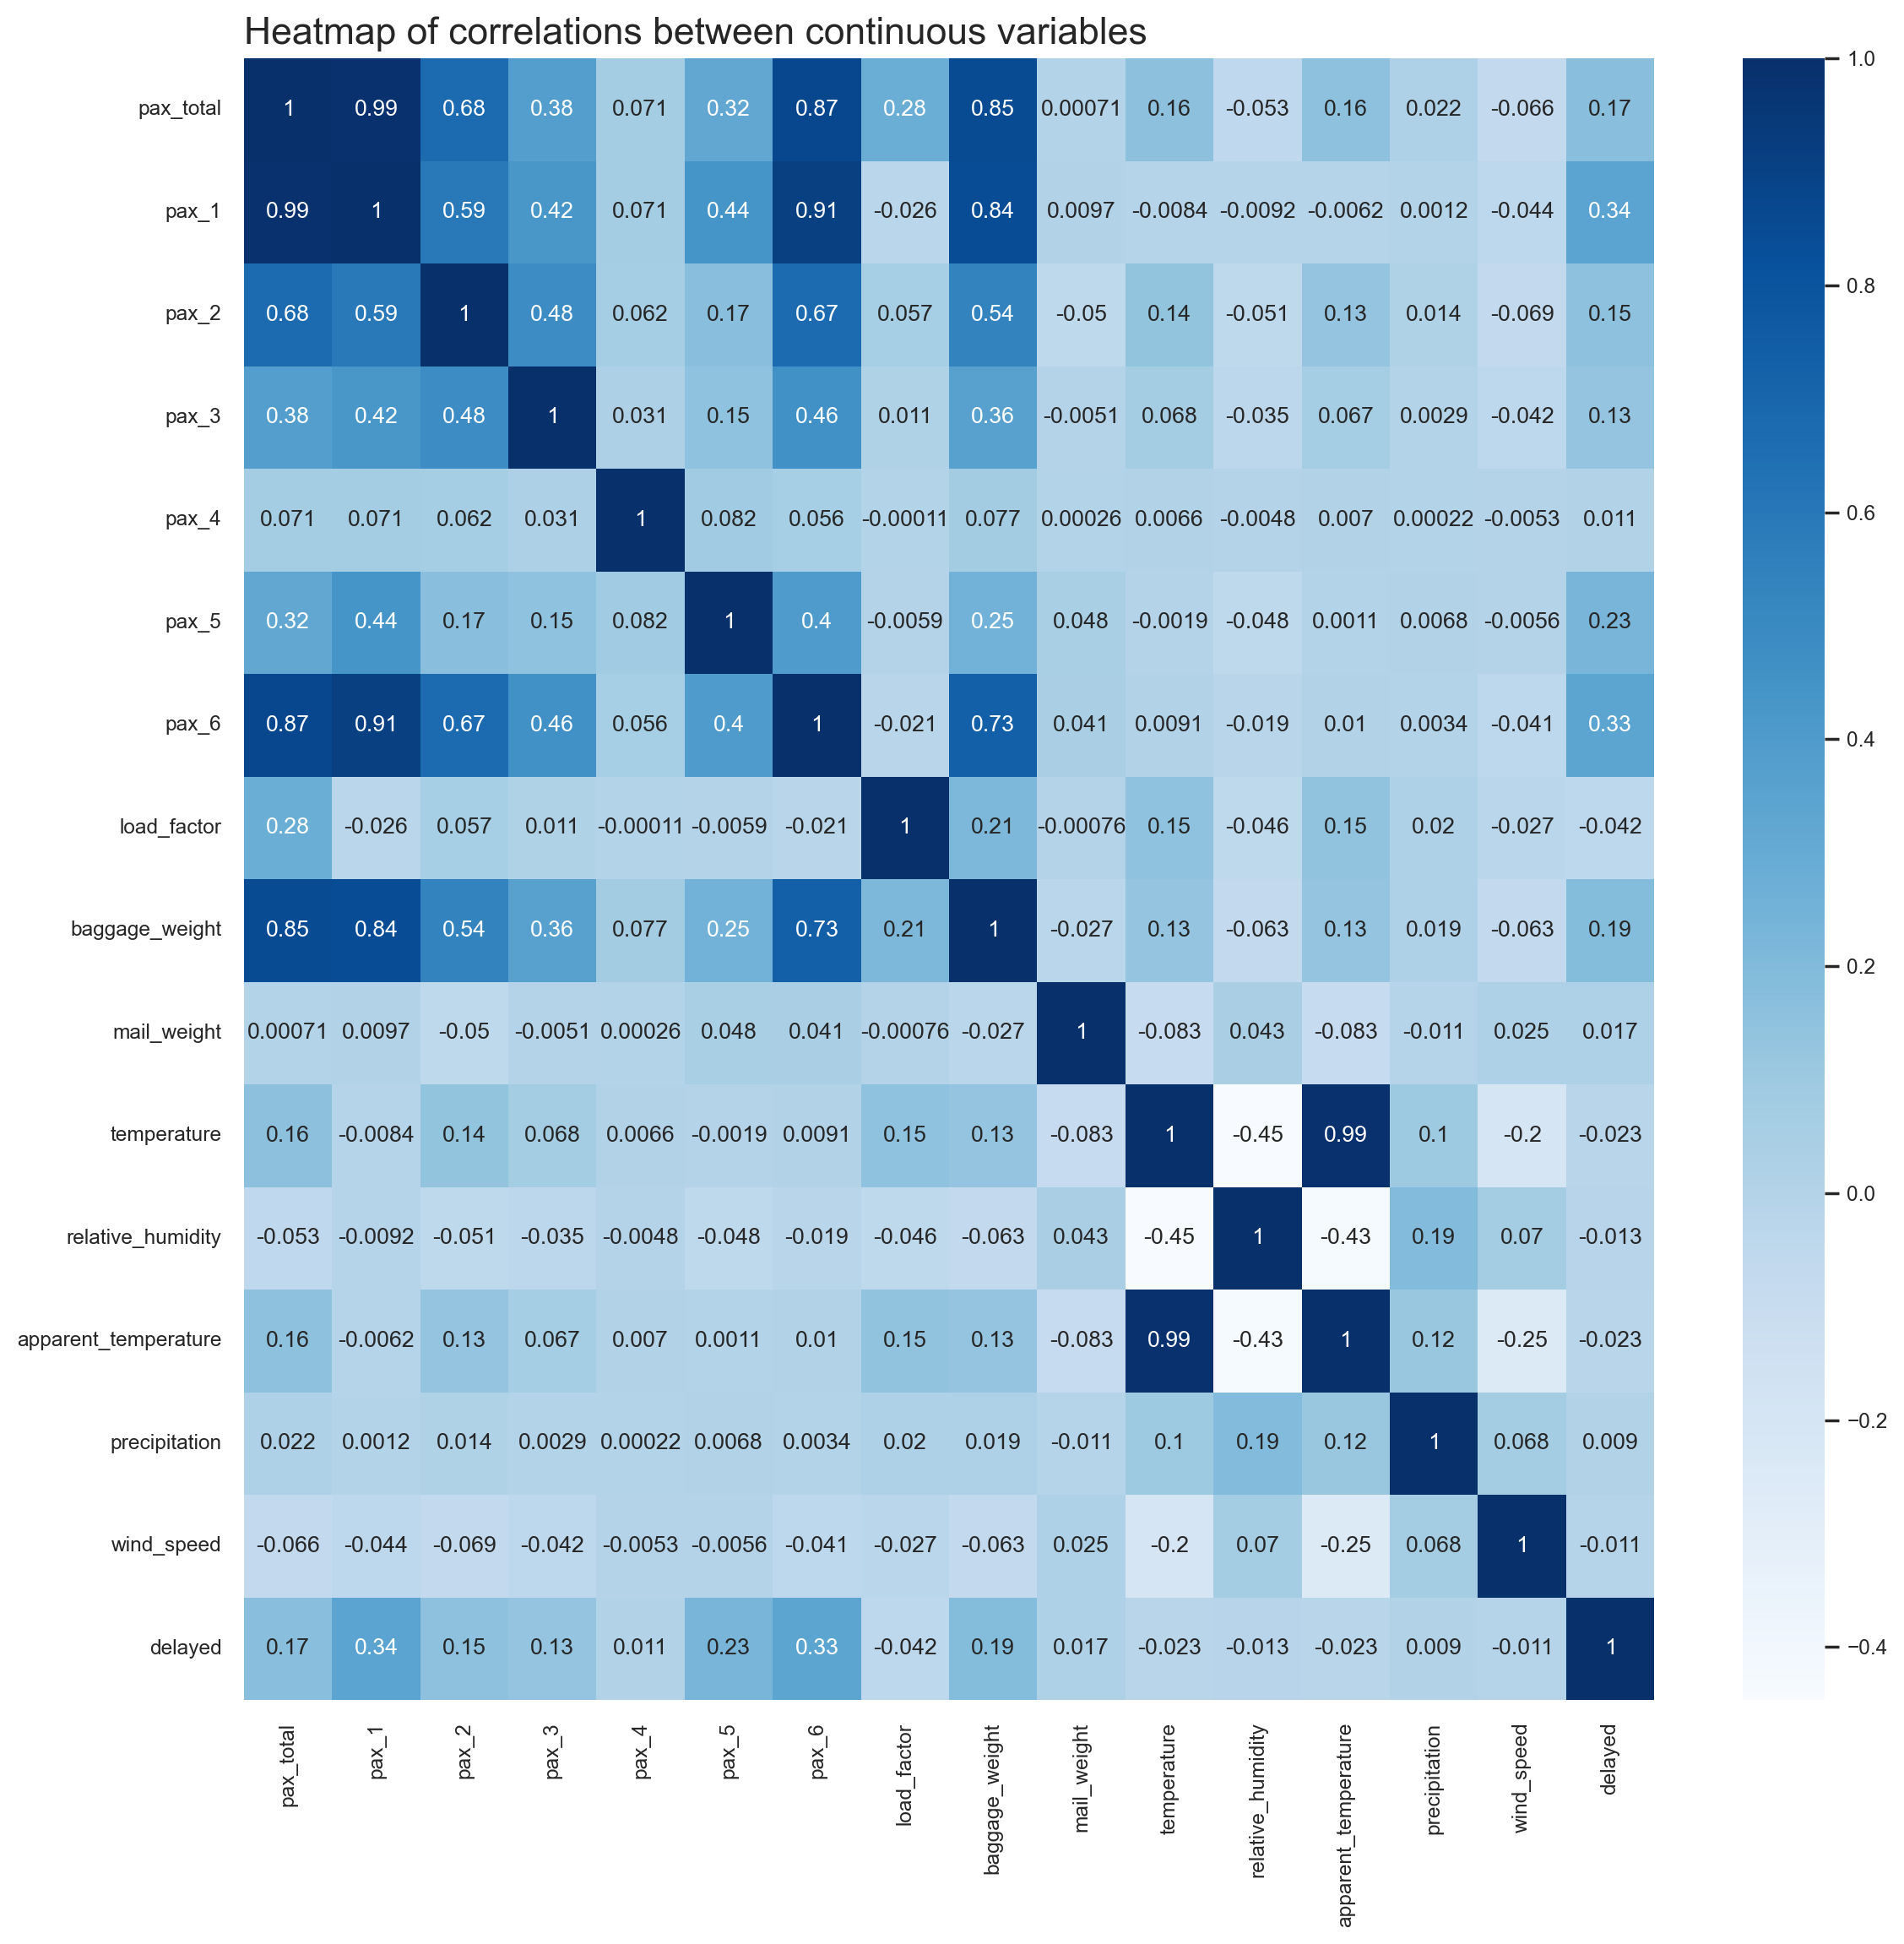

In [10]:
# create heatmap to explore correlations between continuous variables and delay
plt.figure(figsize=(12, 12))
plt.title('Heatmap of correlations between continuous variables', loc='left', fontsize = 16)
sns.heatmap(df[continuous_vars+delay].corr(), cmap='Blues', annot=True)
plt.show()

In [11]:
# define subtypology of variables
cont_vars_sub = ['pax_1', 'pax_6', 'pax_5', 'baggage_weight']

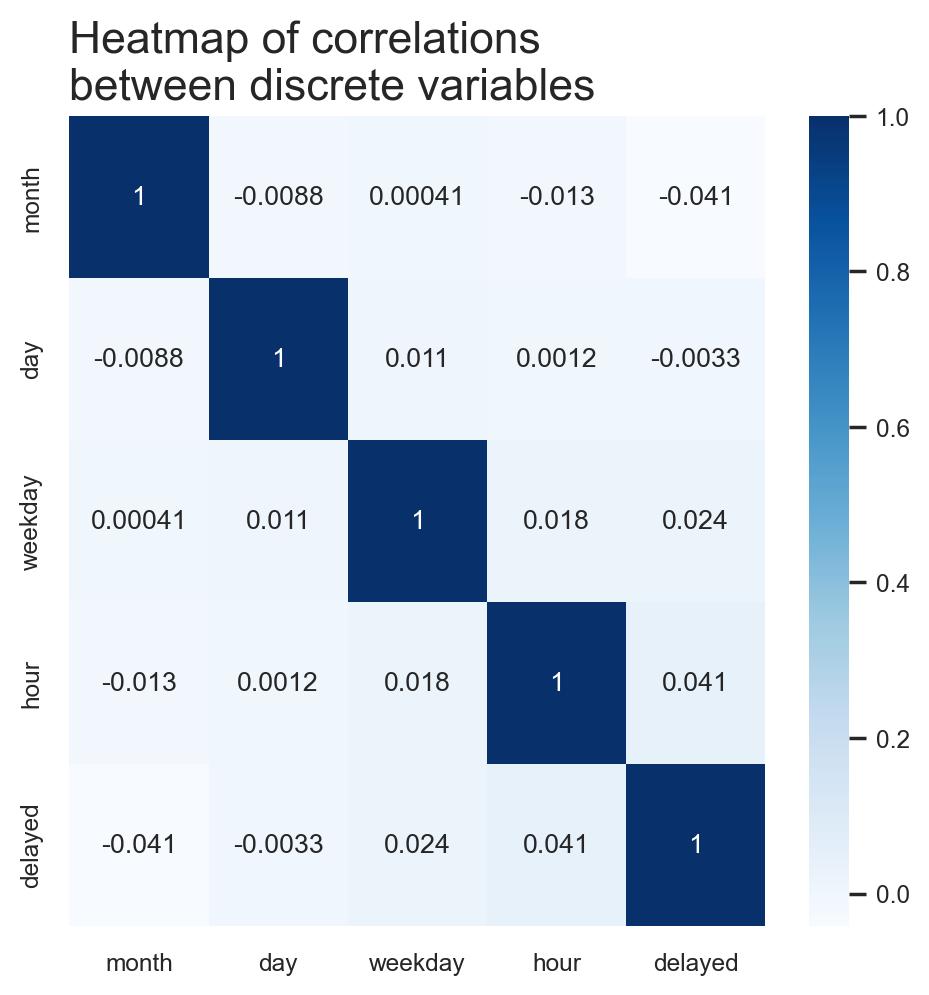

In [12]:
# create heatmap to explore correlations between discrete variables and delay
plt.figure(figsize=(5, 5))
plt.title('Heatmap of correlations \nbetween discrete variables', loc='left', fontsize = 16)
sns.heatmap(df[discrete_vars+delay].corr(), cmap='Blues', annot=True)
plt.show()

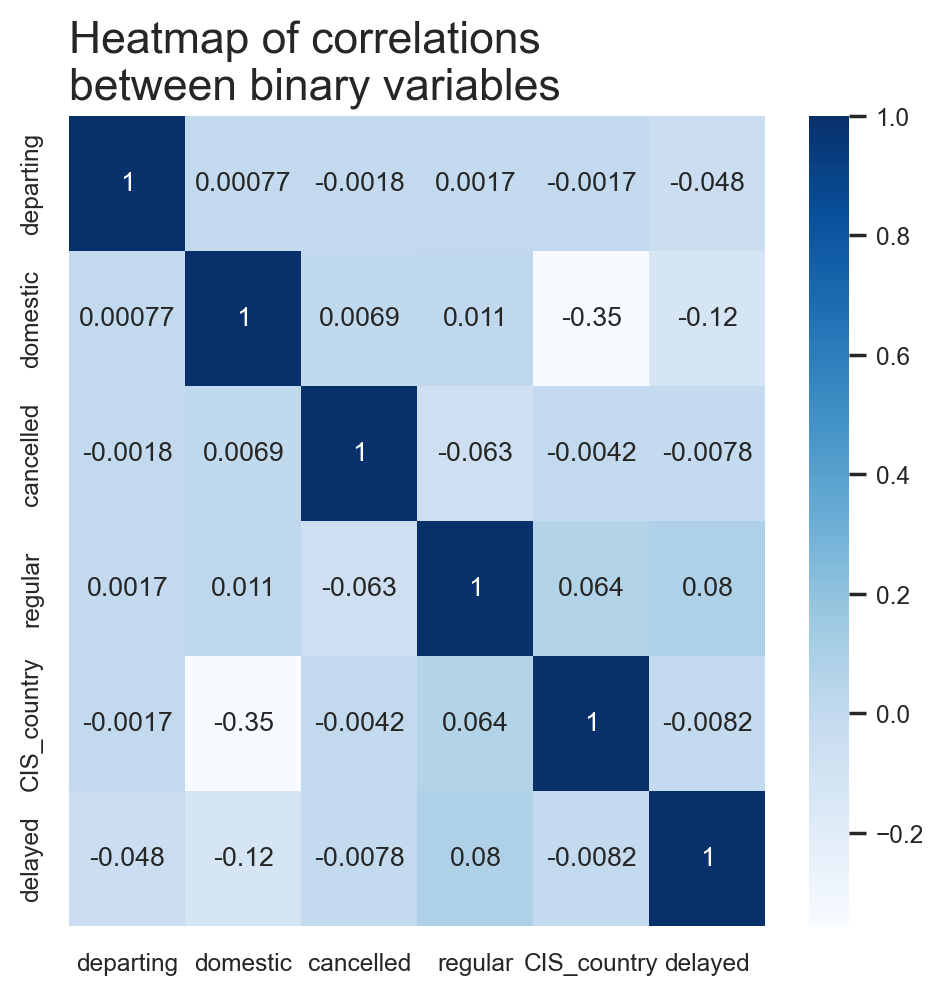

In [13]:
# create heatmap to explore correlations between binary variables and delay
plt.figure(figsize=(5, 5))
plt.title('Heatmap of correlations \nbetween binary variables', loc='left', fontsize = 16)
sns.heatmap(df[binary_vars+delay].corr(), cmap='Blues', annot=True)
plt.show()

There are not meaningful correlations between the different variables and the delay.  
<br/><br/>


In [14]:
# define a function that standardise the variables
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [15]:
# create dataframe with continuous, discrete and binary variables standardised
df_stand = var_standardized(df[continuous_vars+discrete_vars+binary_vars])

In [16]:
df_stand

CIS_country  apparent_temperature  baggage_weight  cancelled date  \
0         -0.344634             -0.798603        2.158511  -0.021353  NaN   
1         -0.344634             -0.798603             NaN  -0.021353  NaN   
2         -0.344634             -0.841876        2.057109  -0.021353  NaN   
3         -0.344634             -0.876495             NaN  -0.021353  NaN   
4         -0.344634             -0.902459       -0.876649  -0.021353  NaN   
...             ...                   ...             ...        ...  ...   
195288    -0.344634             -0.833222       -0.909137  -0.021353  NaN   
195289    -0.344634             -0.833222       -0.767371  -0.021353  NaN   
195290    -0.344634             -0.833222        0.895420  -0.021353  NaN   
195291    -0.344634             -0.833222       -0.788045  -0.021353  NaN   
195292    -0.344634             -0.841876             NaN  -0.021353  NaN   

             day  departing  domestic      hour  load_factor  ...    pax_4  \
0      -1.713973  -1.004005 -1.208768 -1.688836    -0.328926  ... -0.04032   
1      -1.713973  -1.004005 -1.208768 -1.688836          NaN  ... -0.04032   
2      -1.713973   0.996006 -1.208768 -1.364384     0.327136  ... -0.04032   
3      -1.713973   0.996006 -1.208768 -1.202158          NaN  ... -0.04032   
4      -1.713973  -1.004005 -1.208768 -1.039932    -1.766758  ... -0.04032   
...          ...        ...       ...       ...          ...  ...      ...   
195288  1.708358  -1.004005  0.827284  1.393459    -1.126419  ... -0.04032   
195289  1.708358  -1.004005  0.827284  1.393459    -0.480411  ... -0.04032   
195290  1.708358  -1.004005 -1.208768  1.393459     0.558348  ... -0.04032   
195291  1.708358   0.996006 -1.208768  1.393459    -0.414952  ... -0.04032   
195292  1.708358  -1.004005  0.827284  1.555685     0.456332  ... -0.04032   

           pax_5     pax_6  pax_total  precipitation   regular  \
0      -0.388382 -0.808070   1.413327      -0.267084  0.299684   
1      -0.388382 -0.808070        NaN      -0.267084 -3.336835   
2       0.379055  3.194416   2.762927      -0.267084  0.299684   
3      -0.388382 -0.808070        NaN      -0.267084 -3.336835   
4      -0.388382 -0.607945  -1.377890       0.363119  0.299684   
...          ...       ...        ...            ...       ...   
195288 -0.388382 -0.808070  -1.193853      -0.267084  0.299684   
195289 -0.388382 -0.808070  -0.887126      -0.267084  0.299684   
195290 -0.388382  2.022259   1.444000      -0.267084  0.299684   
195291 -0.388382  0.235436  -0.473045      -0.267084  0.299684   
195292 -0.388382 -0.808070        NaN      -0.267084 -3.336835   

        relative_humidity  temperature   weekday  wind_speed  
0                1.015730    -0.849004 -1.003295    0.185905  
1                1.015730    -0.849004 -1.003295    0.185905  
2                1.015730    -0.849004 -1.003295    0.906245  
3                1.015730    -0.869703 -1.003295    1.104339  
4                1.015730    -0.859354 -1.003295    1.374466  
...                   ...          ...       ...         ...  
195288           0.370876    -0.817956 -1.003295    0.744169  
195289           0.370876    -0.817956 -1.003295    0.744169  
195290           0.370876    -0.817956 -1.003295    0.744169  
195291           0.370876    -0.817956 -1.003295    0.744169  
195292           0.306391    -0.817956 -1.003295    0.744169  

[195293 rows x 25 columns]

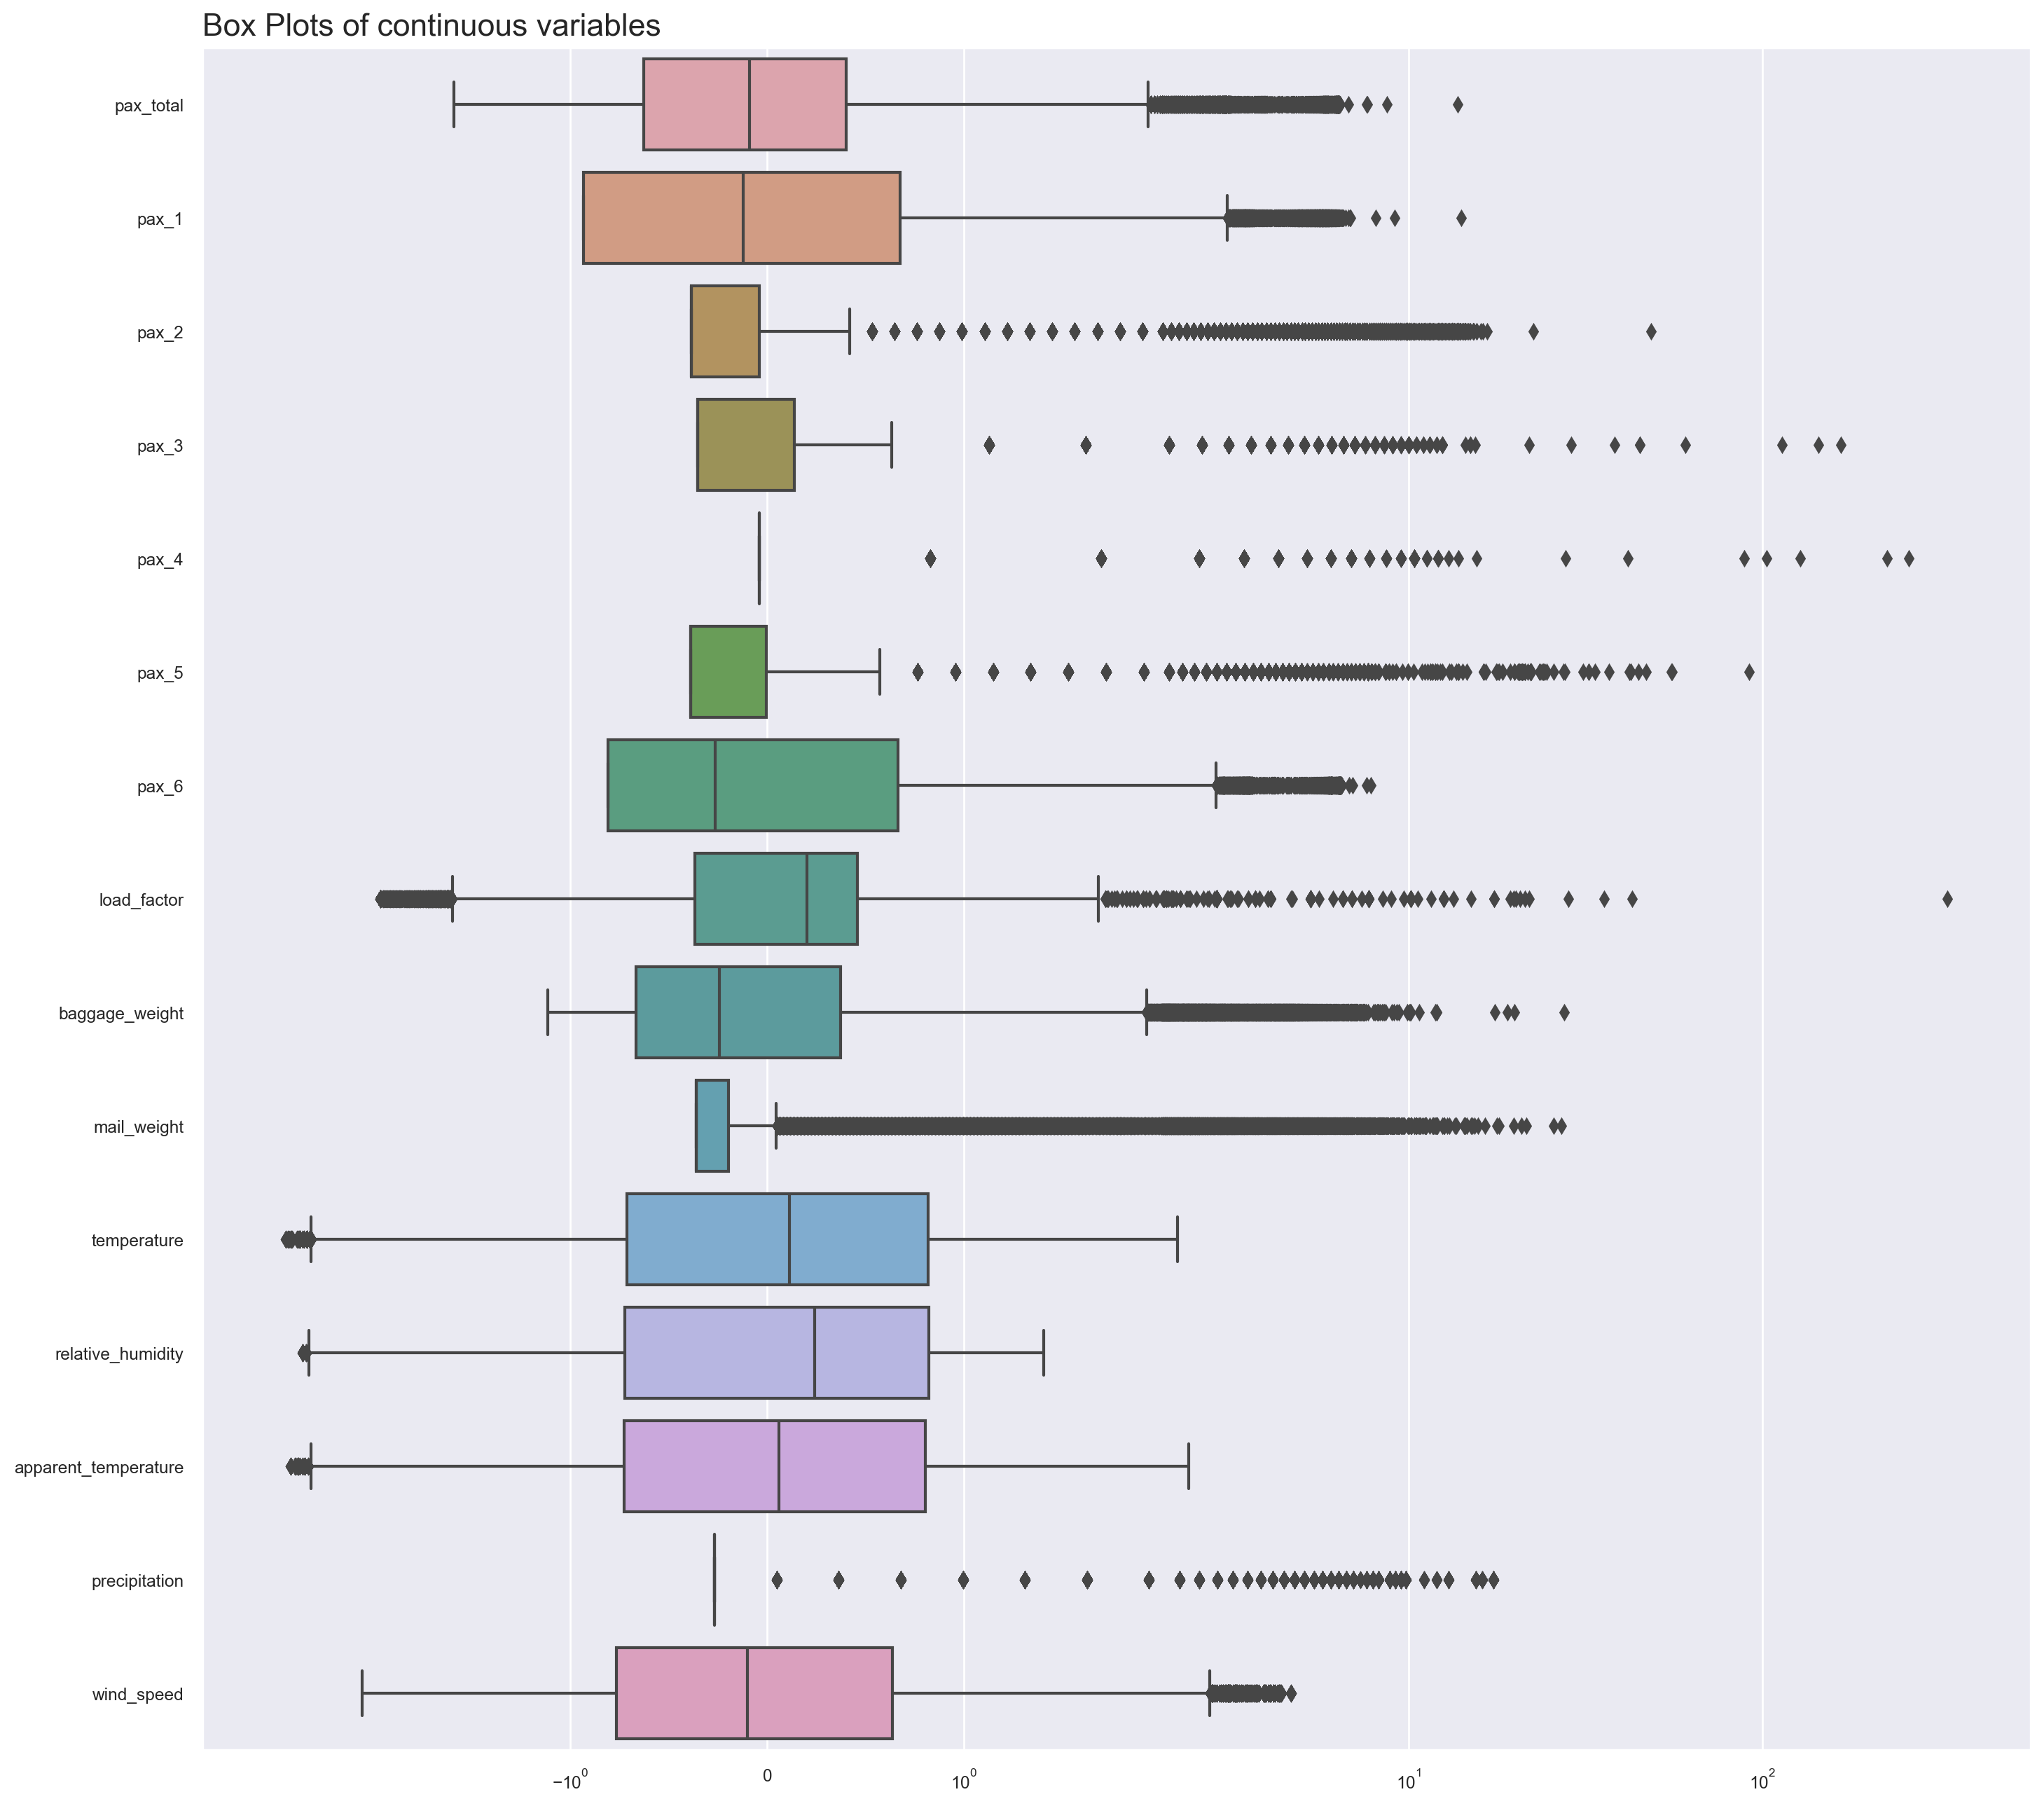

In [17]:
# create box plots of continuous variables to understand the different ranges
fig, ax = plt.subplots(figsize=(15, 15))
plt.title('Box Plots of continuous variables', loc='left', fontsize = 16)
sns.boxplot(data=df_stand[continuous_vars], orient='h', fliersize=5,
            linewidth=1.5, notch=False, saturation=0.5, ax=ax)
plt.xscale('symlog')
plt.autoscale(True)
plt.show()

Some variables show a large amount of **outliers**, I am going to keep them for now.  
<br/><br/>

In [19]:
# create subsets of dataframe using conditions
delay = df[df.delayed == 1]
nodelay = df[df.delayed == 0]

In [20]:
# display the time of the day with most delays in absolute terms
time_abs = delay.groupby('hour').count().sort_values(by='delayed', ascending=False)[['delayed']]
time_abs

delayed
hour         
17       2805
16       2485
18       2259
15       2240
22       1867
21       1835
23       1797
20       1781
14       1683
19       1611
0        1566
13       1466
12       1452
10       1443
11       1121
1        1103
9         962
7         675
2         660
8         654
3         572
4         440
6         438
5         345

In [21]:
# display the time of the day with most delays relatively to the total number of flights
time_rel = time_abs / df.groupby('hour').count()[['delayed']]
time_rel.sort_values(by='delayed', ascending=False)

delayed
hour          
3     0.345411
1     0.273223
2     0.259434
4     0.258368
17    0.239498
23    0.230385
0     0.220222
16    0.200597
18    0.198541
15    0.196992
21    0.190788
20    0.182032
22    0.176783
19    0.174540
14    0.172386
12    0.169745
13    0.165109
11    0.126509
5     0.124190
10    0.122164
9     0.095380
8     0.085546
7     0.081374
6     0.056684

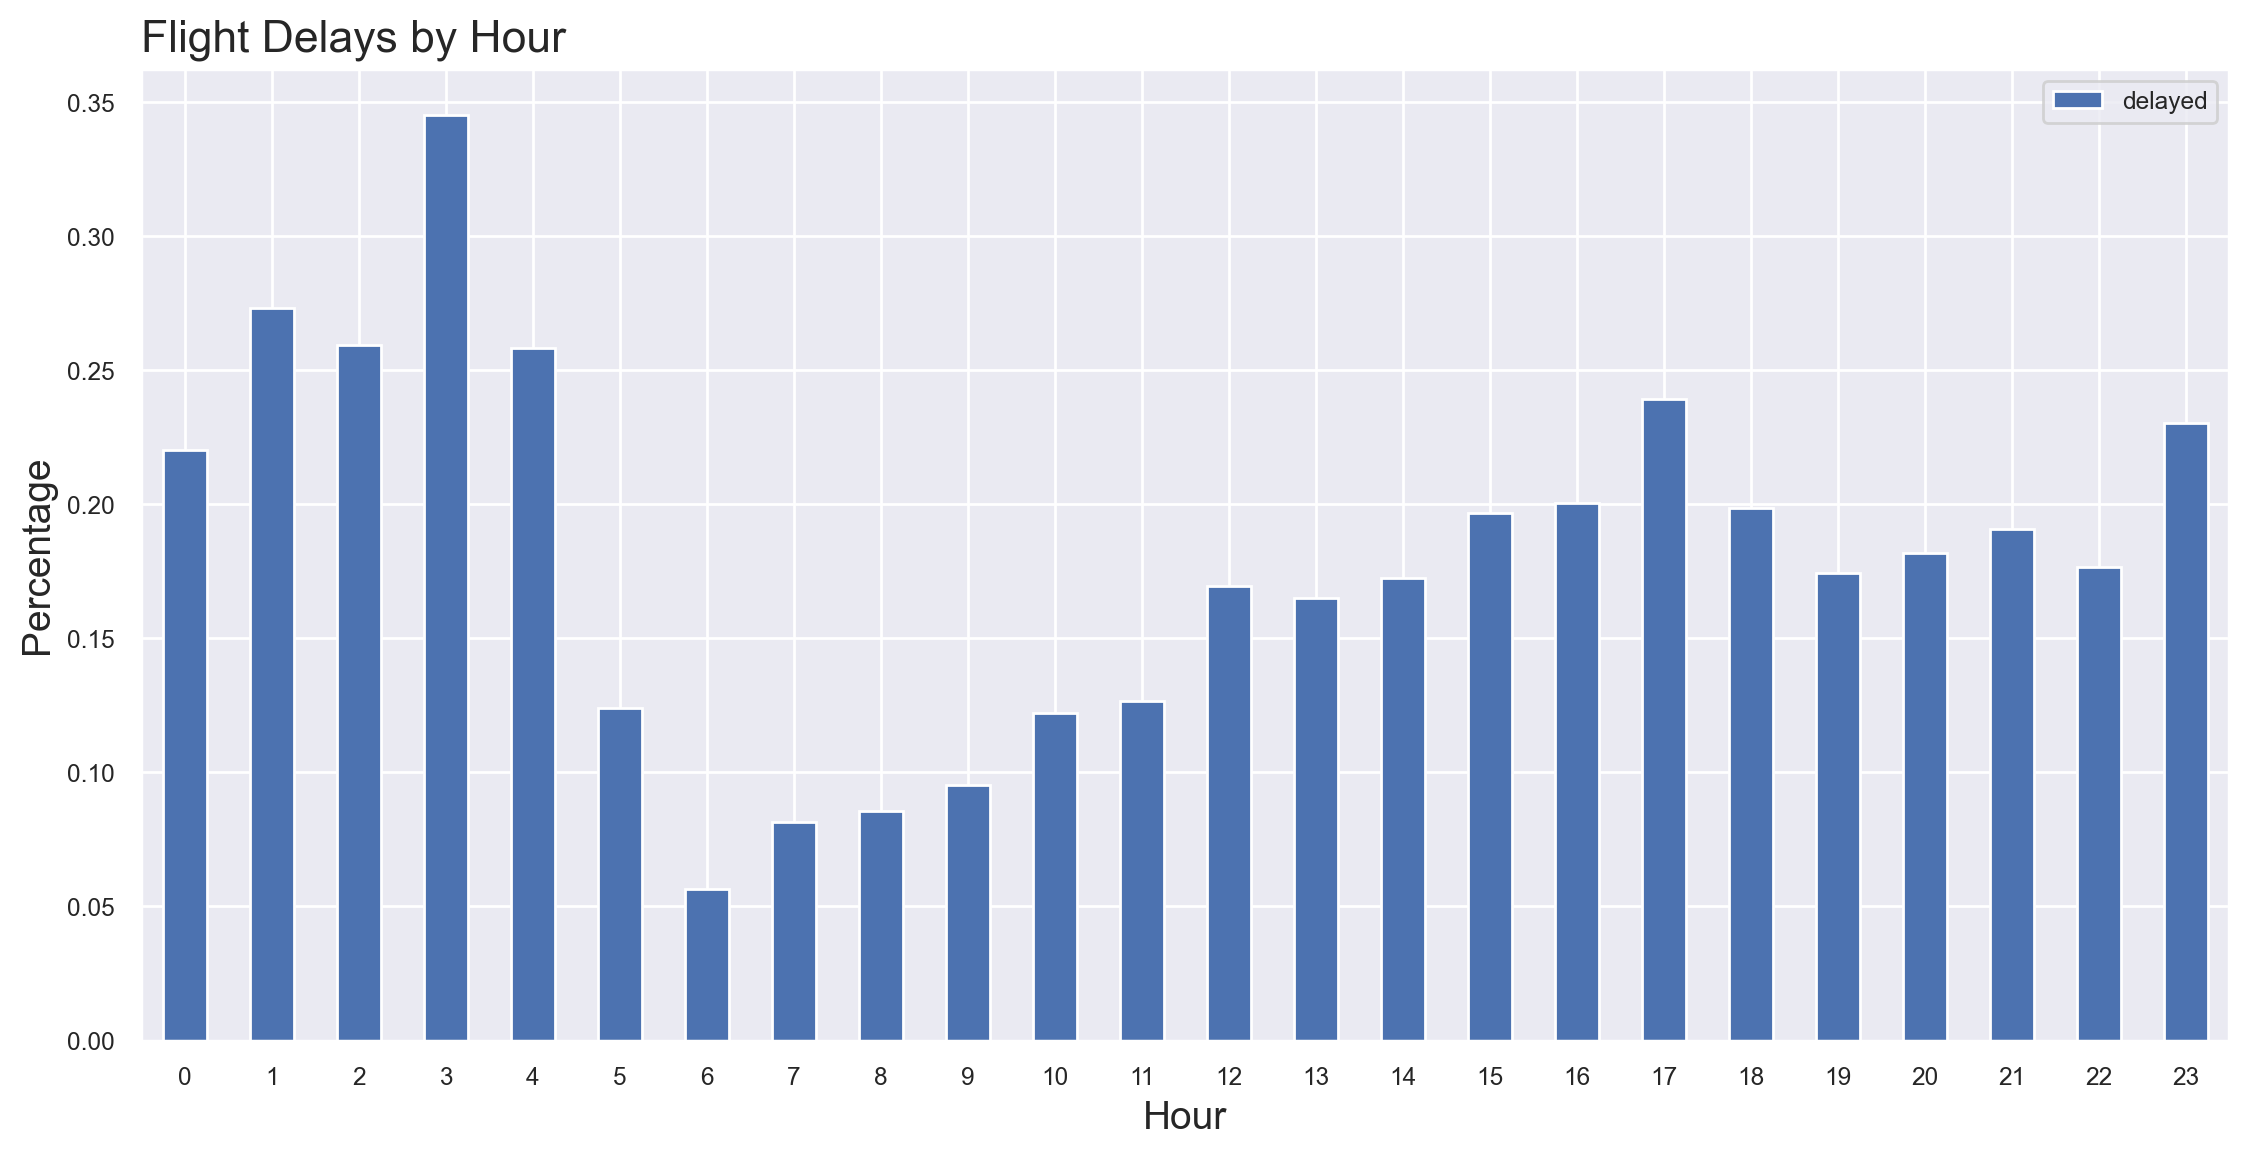

In [22]:
# create bar plot showing relative flight delays by hour
time_rel.plot(kind='bar', rot=0, figsize=(12,6))
plt.title('Flight Delays by Hour', loc='left', fontsize = 16)
plt.ylabel('Percentage', fontsize = 14)
plt.xlabel('Hour', fontsize = 14)
plt.show()

The graph above shows that **3am** has relatively the most delays during the day, while **6am** has the least.  
I assume that at 3am most flights are arriving, so this does not represent an internal operational issue.  
<br/><br/>

In [23]:
# display the day of the week with most delays in absolute terms (0 is for Monday)
day_abs = delay.groupby('weekday').count().sort_values(by='delayed', ascending=False)[['delayed']]
day_abs

delayed
weekday         
4           5569
5           5111
6           4926
0           4783
2           4633
3           4348
1           3890

In [24]:
# display the day of the week with most delays relatively to the total number of flights
day_rel = day_abs / df.groupby('weekday').count()[['delayed']]
day_rel.sort_values(by='delayed', ascending=False)

delayed
weekday          
5        0.189402
4        0.188180
6        0.174057
0        0.167525
2        0.166361
3        0.158437
1        0.146406

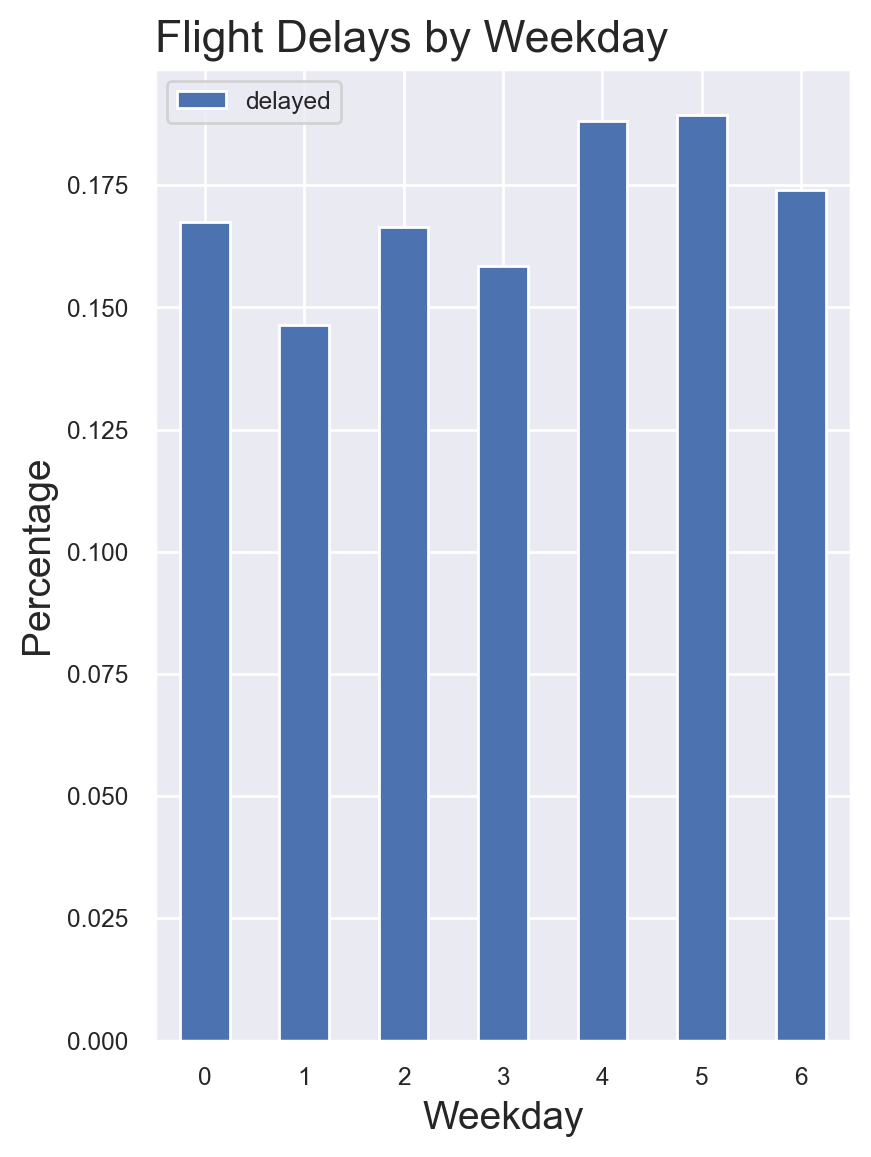

In [152]:
# create bar plot showing relative flight delays by weekday
day_rel.plot(kind='bar', rot=0, figsize=(4,6))
plt.title('Flight Delays by Weekday', loc='left', fontsize = 16)
plt.ylabel('Percentage', fontsize = 14)
plt.xlabel('Weekday', fontsize = 14)
plt.show()

The graph above shows that **Saturday** has relatively the most delays during the week, while **Tuesday** has the least.  
<br/><br/>

In [25]:
# display the month of the year with most delays in absolute terms
month_abs = delay.groupby('month').count().sort_values(by='delayed', ascending=False)[['delayed']]
month_abs

delayed
month         
6         3799
7         3646
9         3599
8         3576
12        3114
10        2820
5         2444
11        2185
3         2158
4         2138
1         2054
2         1727

In [26]:
# display the month of the year with most delays relatively to the total number of flights
month_rel = month_abs / df.groupby('month').count()[['delayed']]
month_rel.sort_values(by='delayed', ascending=False)

delayed
month          
1      0.233462
3      0.228336
2      0.218028
9      0.186728
6      0.183642
12     0.177770
7      0.171625
8      0.160582
4      0.157160
10     0.144853
5      0.136720
11     0.127153

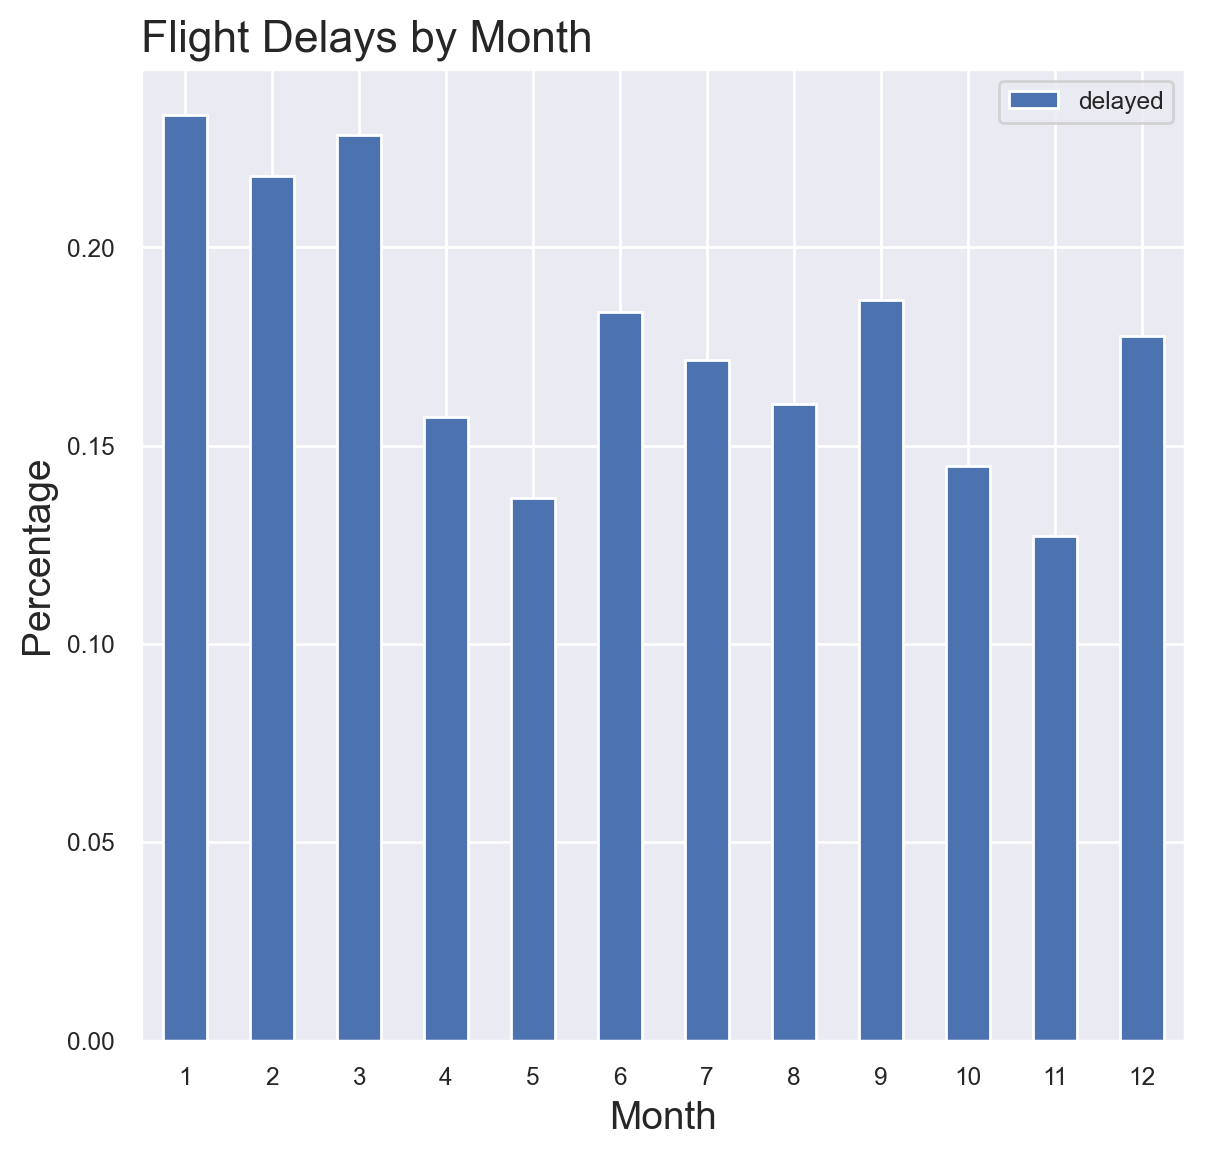

In [27]:
# create bar plot showing relative flight delays by month
month_rel.plot(kind='bar', rot=0, figsize=(6,6))
plt.title('Flight Delays by Month', loc='left', fontsize = 16)
plt.ylabel('Percentage', fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.show()

The graph above shows that **January** has relatively the most delays during the year, while **November** has the least.  
<br/><br/>

In [28]:
# display the airline with most delays in absolute terms
airline_abs = delay.groupby('airline_name').count().sort_values(by='delayed', ascending=False)[['delayed']]
airline_abs

delayed
airline_name              
ROSSIYA AIRLINES      8036
AEROFLOT              4439
TRANSAERO             2745
LUFTHANSA             2139
S7 AIRLINES            896
...                    ...
KOSMOS AIRLINES          1
NIKI                     1
PROAIR AVIATION          1
RUSSIAN AIR FORCE        1
IRAERO                   1

[123 rows x 1 columns]

In [29]:
# display the airline with most delays relatively to the total number of flights
airline_rel = airline_abs / df.groupby('airline_name').count()[['delayed']]
airline_rel.sort_values(by='delayed', ascending=False)

delayed
airline_name                           
ATLASJET                       1.000000
TULPAR AIR                     1.000000
AEROSVIT - UKRAINIAN AIRLINES  0.846154
PEGAS FLY                      0.800000
KLM-ROYAL DUTCH AIRLINES       0.670330
...                                 ...
TRAVEL SERVICE                      NaN
VISTA JET                           NaN
VOSTOK AIRLINES                     NaN
WINGS OF SAMOTLOR                   NaN
XCLUSIVE JET CHARTER                NaN

[206 rows x 1 columns]

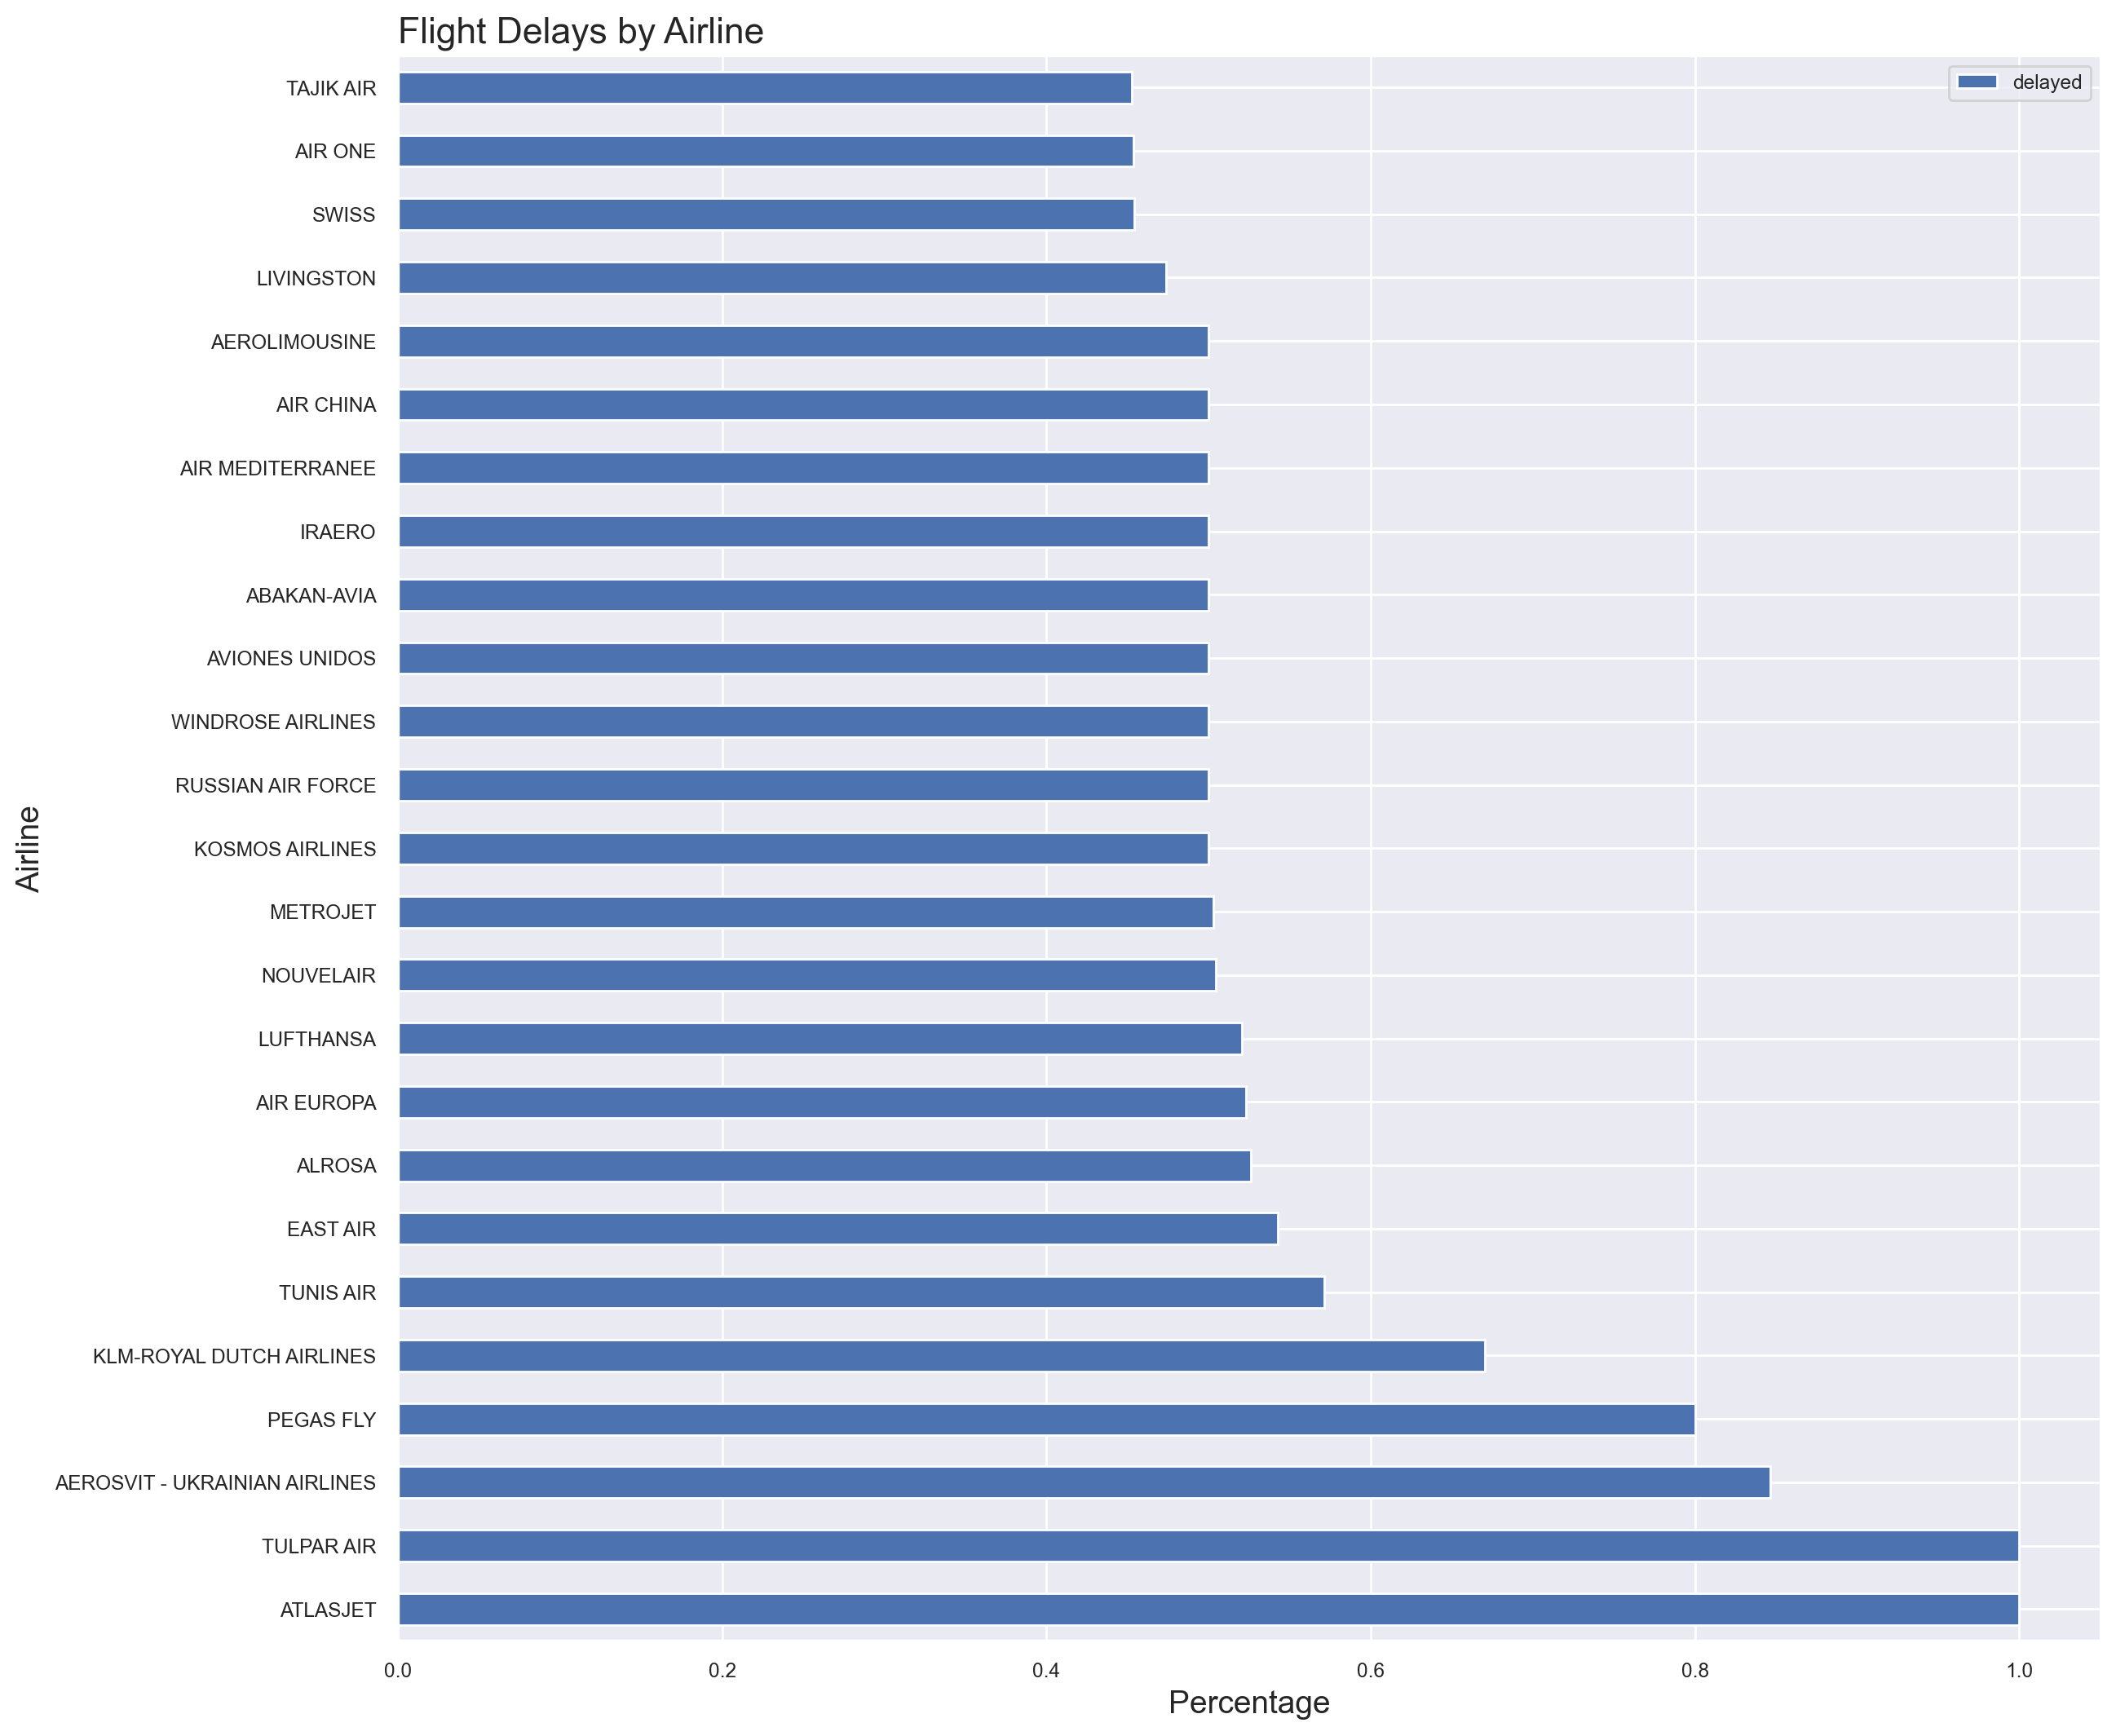

In [30]:
# create horizontal bar plot showing relative flight delays by airline
airline_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Airline', loc='left', fontsize = 16)
plt.ylabel('Airline', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that **ATLASJET** and **TULPAR AIR** have relatively the most delays among the airlines.  
<br/><br/>

In [31]:
# display the aircraft type with most delays in absolute terms
aircraft_abs = delay.groupby(['aircraft_type_name','aircraft_type_code']).count().sort_values(by='delayed',
               ascending=False)[['delayed']]
aircraft_abs

delayed
aircraft_type_name   aircraft_type_code         
AIRBUS               320                    6449
                     32S                    6079
                     321                    3513
                     319                    2489
BOEING               735                    2028
...                                          ...
LEARJET              LR5                       1
                     LR3                       1
                     LJ5                       1
GULFSTREAM AEROSPACE GRJ                       1
PIAGGIO              P18                       1

[122 rows x 1 columns]

In [32]:
# display the aircraft type with most delays relatively to the total number of flights
aircraft_rel = aircraft_abs / df.groupby(['aircraft_type_name','aircraft_type_code']).count()[['delayed']]
aircraft_rel.sort_values(by='delayed', ascending=False)

delayed
aircraft_type_name  aircraft_type_code          
AEROSPATIALE/ALENIA AT4                 1.000000
TUPOLEV             T24                 0.653846
AIRBUS              313                 0.647727
BOEING              739                 0.557562
                    73H                 0.545455
...                                          ...
ROBINSON            R66                      NaN
ROCKWELL            SBR1                     NaN
SOCATA              TB7                      NaN
TRANSAL             C16                      NaN
VIRUS               PIVI                     NaN

[174 rows x 1 columns]

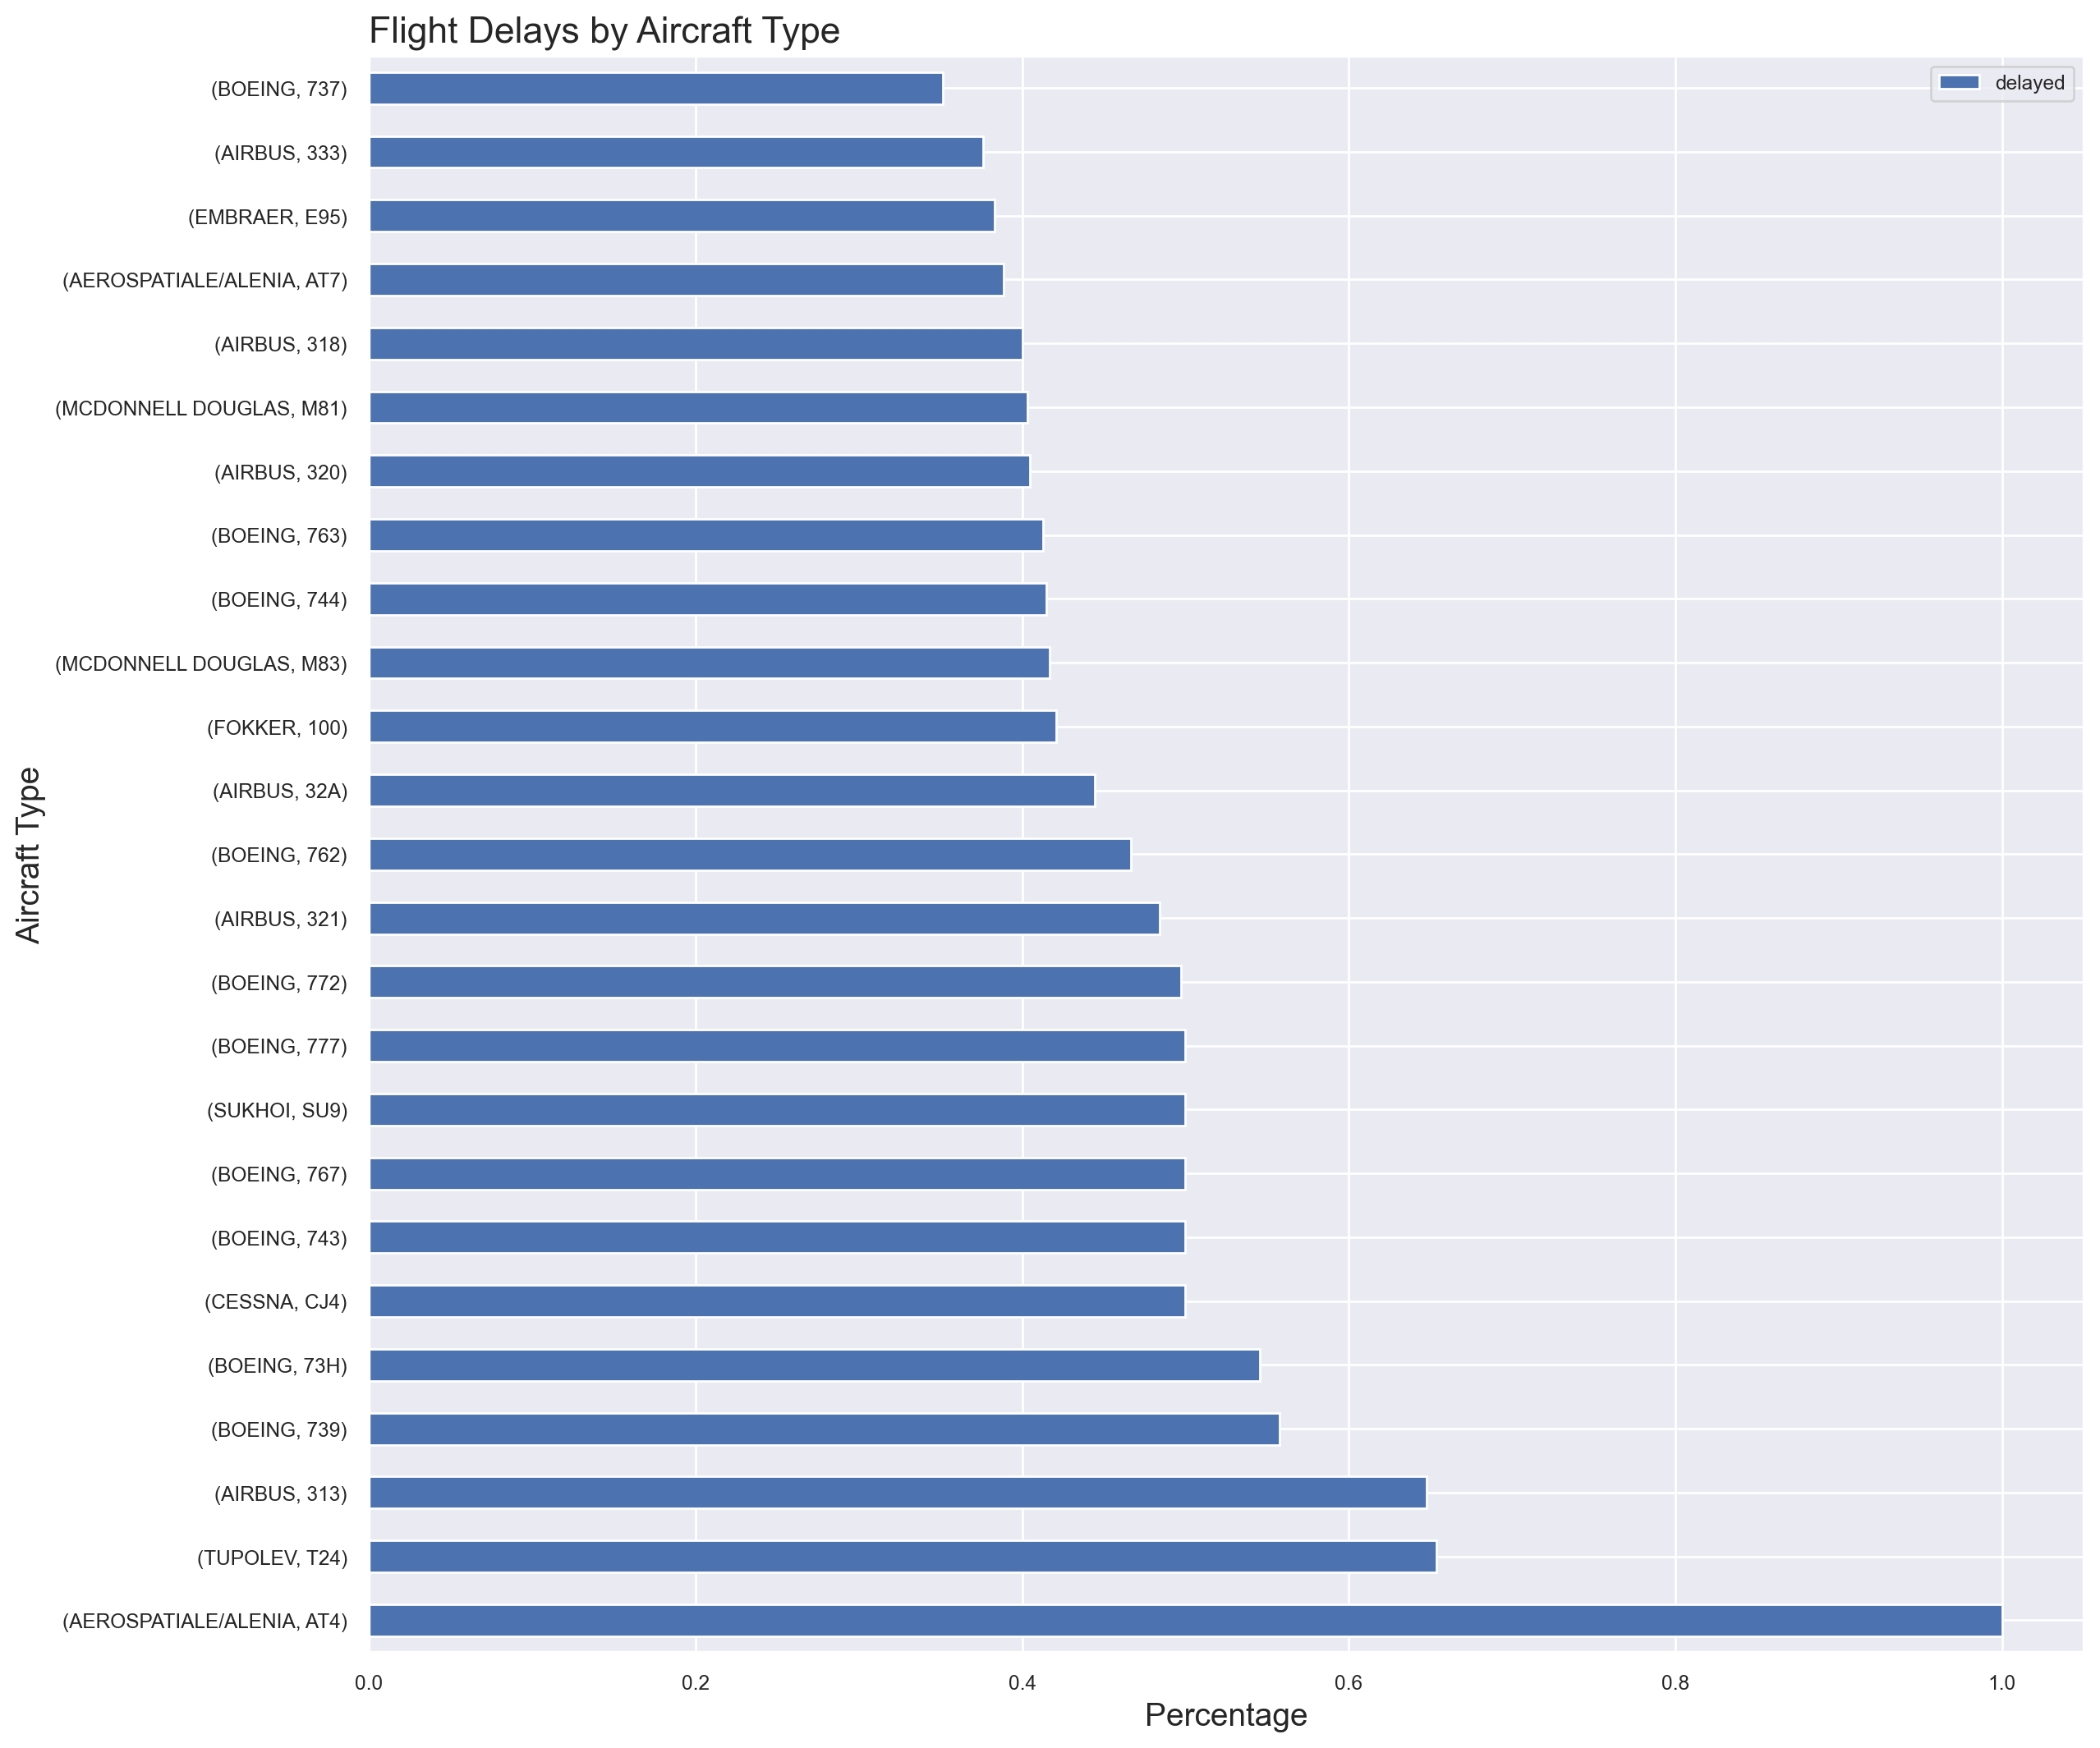

In [33]:
# create a horizontal bar plot showing relative flight delays by aircraft type
aircraft_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Aircraft Type', loc='left', fontsize = 16)
plt.ylabel('Aircraft Type', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that **AEROSPATIALE/ALENIA AT4** has relatively the most delays among the aircraft types.  
<br/><br/>

In [34]:
# display the service type with most delays in absolute terms
service_abs = delay.groupby('service_type').count().sort_values(by='delayed', ascending=False)[['delayed']]
service_abs

delayed
service_type                                               
Normal Service (Sheduled, Passenger)                  29469
Passenger Only (Charter, Passenger)                    2556
Business Aviation/Air Taxi (Others, Not Specific)       760
Non-revenue (Positioning/Ferry/Delivery/Demo; N...      142
Normal Service (Additional Flights, Passenger)          103
Cargo and/or Mail (Charter, Cargo/Mai)                   86
General Aviation (Others, Not specific)                  40
Loose loaded cargo and/or preloaded devices(She...       31
Government of the Russian Federation (VIP)               29
Technical Test (Others, Not specific)                    16
State Order                                               9
Helicopters (All flights)                                 7
Government of the Russian Federation (Governmen...        5
Special (FAA/Government; Others, Not specific)            3
Military (Others, Not specific)                           2
Passenger and Cargo and/or Mail (Charter)                 1
State/Diplomatic/Air Ambulance (Others, Not spe...        1

In [35]:
# display the service type with most delays relatively to the total number of flights
service_rel = service_abs / df.groupby('service_type').count()[['delayed']]
service_rel.sort_values(by='delayed', ascending=False)

delayed
service_type                                                
Passenger Only (Charter, Passenger)                 0.340256
Passenger and Cargo and/or Mail (Charter)           0.333333
Military (Others, Not specific)                     0.333333
Non-revenue (Positioning/Ferry/Delivery/Demo; N...  0.185137
Special (FAA/Government; Others, Not specific)      0.176471
Loose loaded cargo and/or preloaded devices(She...  0.176136
Normal Service (Additional Flights, Passenger)      0.175768
Normal Service (Sheduled, Passenger)                0.172239
State Order                                         0.155172
Cargo and/or Mail (Charter, Cargo/Mai)              0.146010
Technical Test (Others, Not specific)               0.125984
Business Aviation/Air Taxi (Others, Not Specific)   0.082591
Government of the Russian Federation (Governmen...  0.047619
General Aviation (Others, Not specific)             0.034813
Government of the Russian Federation (VIP)          0.032621
State/Diplomatic/Air Ambulance (Others, Not spe...  0.028571
Helicopters (All flights)                           0.002375
Cargo/Mail (Additional Flights, Cargo/Mail)              NaN
Charter requiring special handling                       NaN
Mail only (Sheduled, Cargo/Mail)                         NaN
Passenger/Cargo in cabin (Sheduled, Passenger/C...       NaN
Service operated by surface vehicle (Sheduled, ...       NaN
Shuttle Mode (Additional Flights, Passenger)             NaN
Technical Stop (Others, Not specific)                    NaN
Training/School/Crew check (Others, Not specific)        NaN

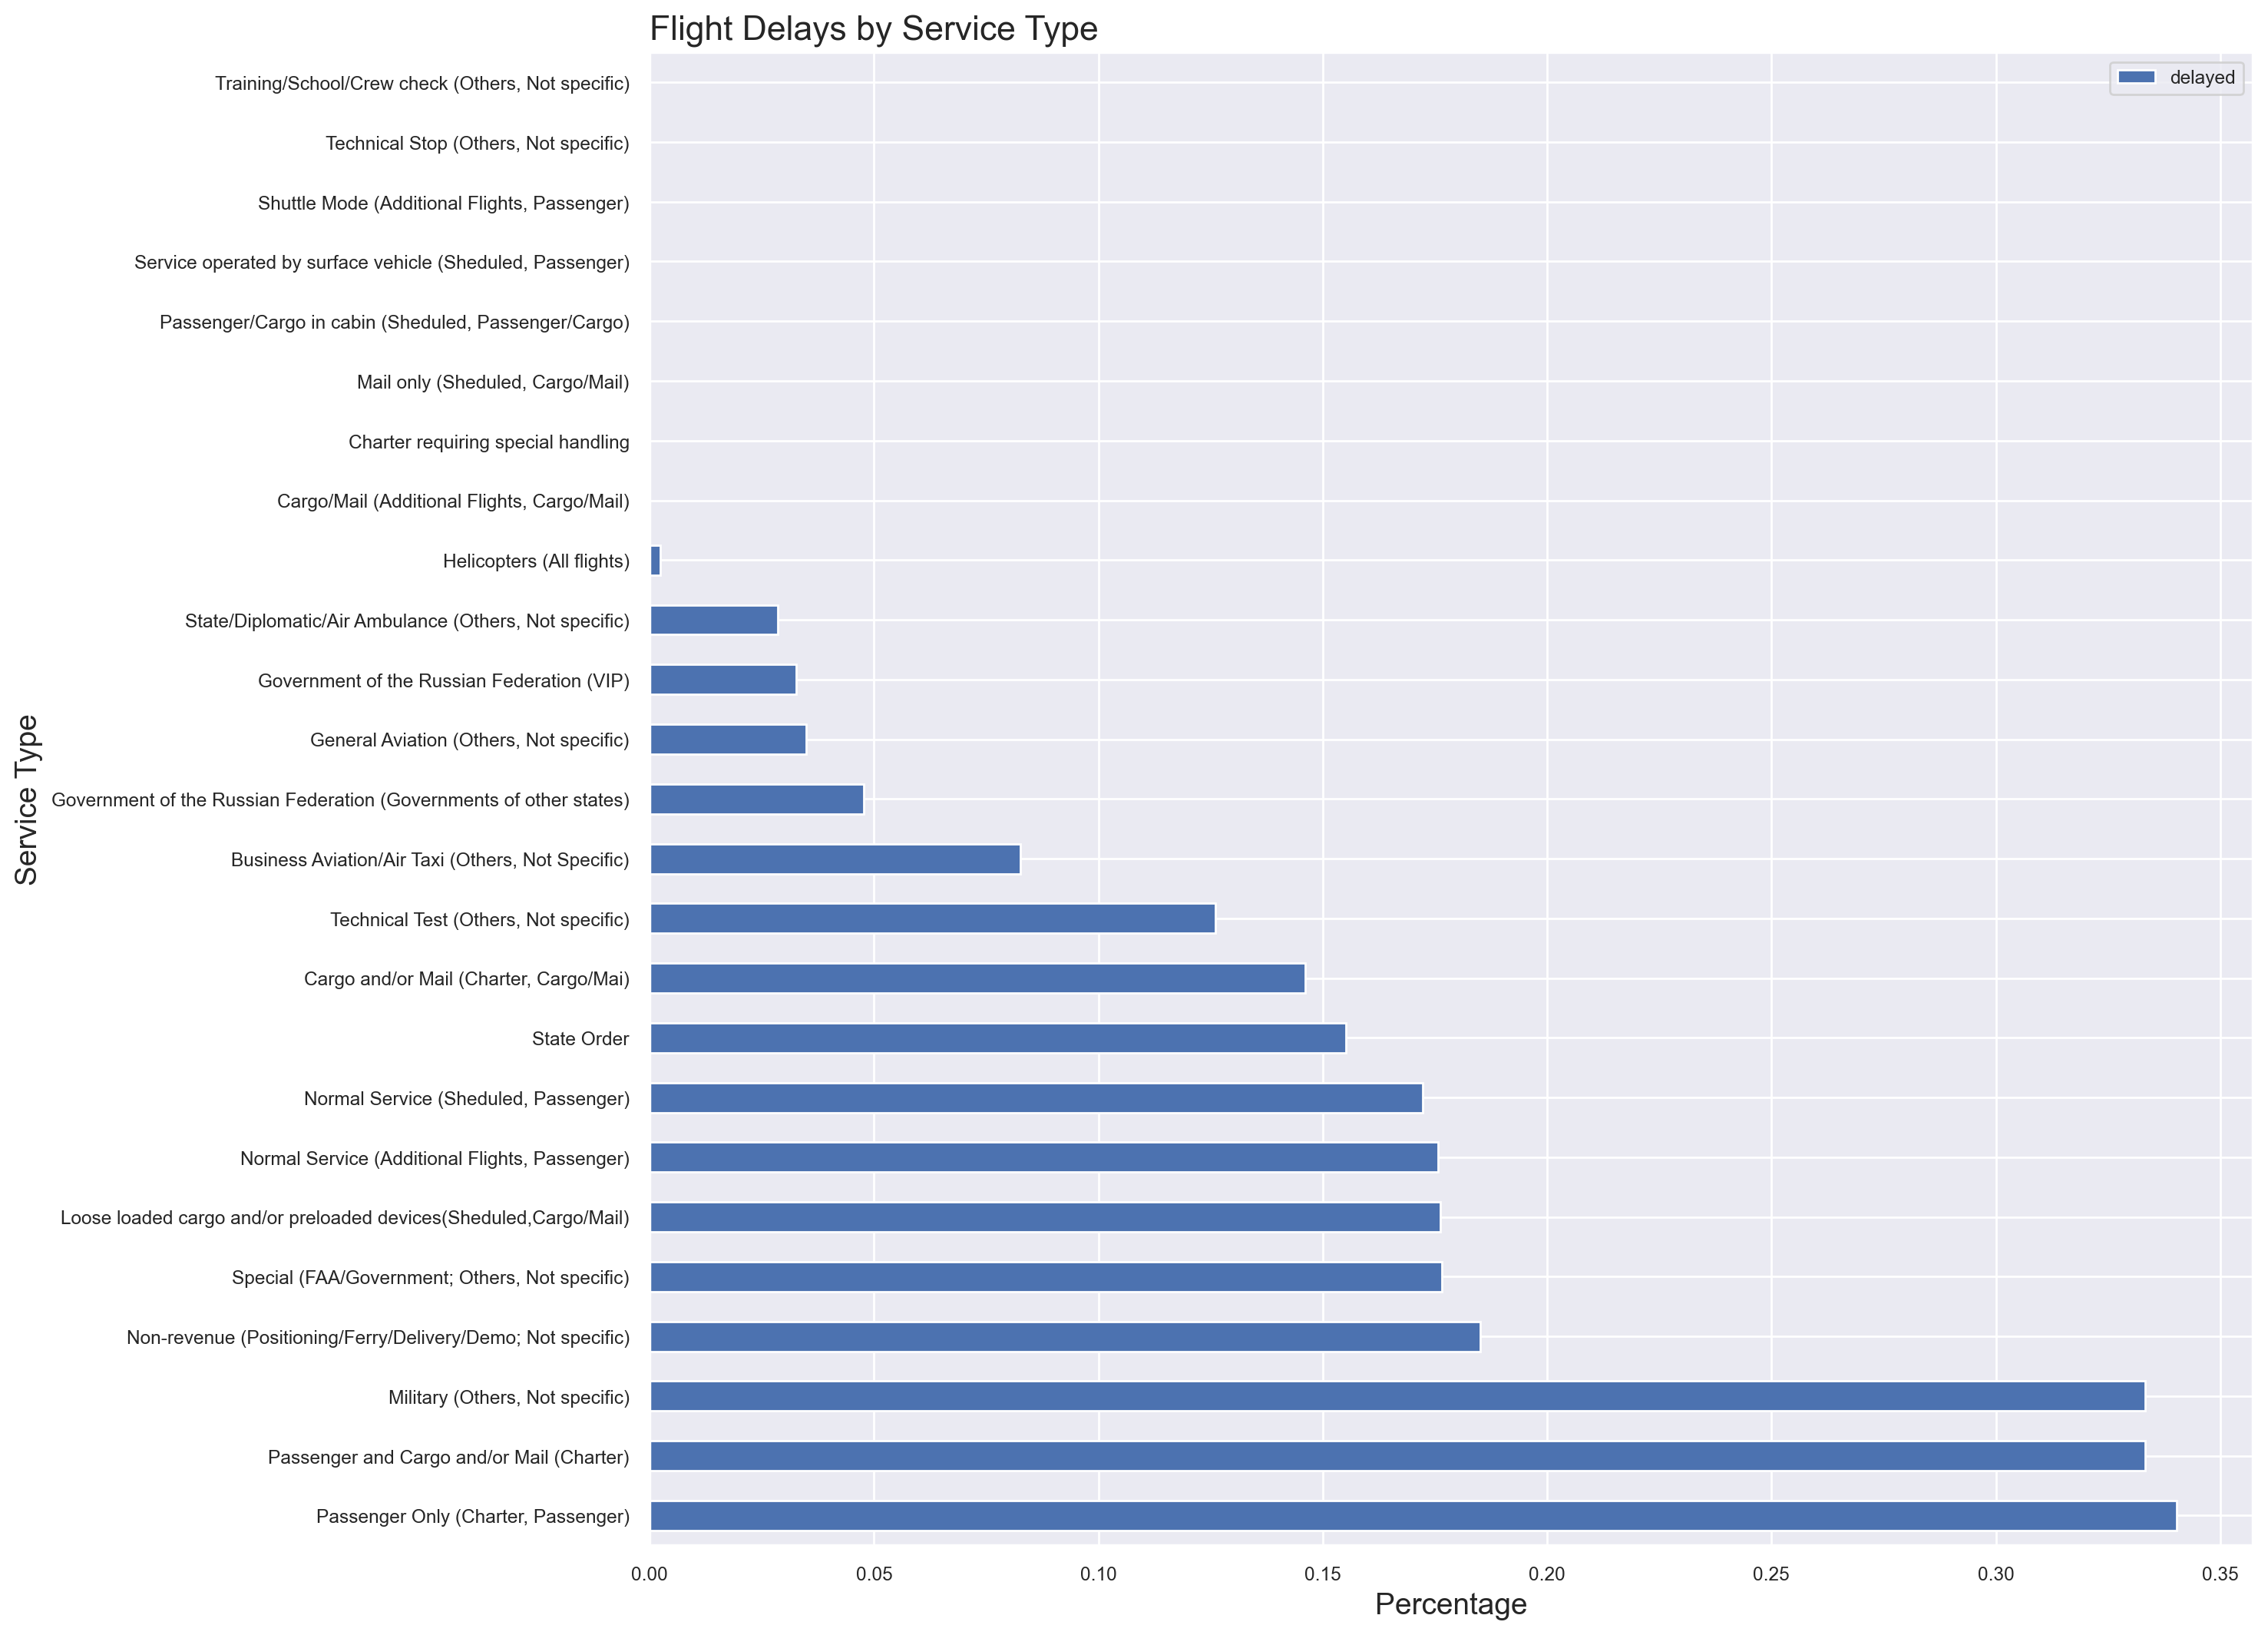

In [36]:
# create a horizontal bar plot showing relative flight delays by service type
service_rel.sort_values(by='delayed', ascending=False).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Service Type', loc='left', fontsize = 16)
plt.ylabel('Service Type', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that **Passenger Only - Charter** has relatively the most delays among the service types, while some categories have no delay at all.  
<br/><br/>

In [37]:
# display the country to which the flight is directed with most delays in absolute terms
country_dep_abs = df[(df.delayed == 1) & (df.departing == 1)].groupby('country_name').count().sort_values(by='delayed',
                  ascending=False)[['delayed']]
country_dep_abs

delayed
country_name                              
RUSSIAN FEDERATION                    6138
RUSSIA EAST OF THE URAL MOUNTAINS     1068
UZBEKISTAN                             766
GERMANY                                620
TURKEY                                 411
FRANCE                                 397
UKRAINE                                374
GREECE                                 350
EGYPT                                  334
TAJIKISTAN                             329
ITALY                                  299
CZECH REPUBLIC                         266
SPAIN                                  229
DOMINICAN REPUBLIC                     225
TUNISIA                                213
SWITZERLAND                            192
FINLAND                                191
KAZAKHSTAN                             183
AUSTRIA                                164
BULGARIA                               161
CYPRUS                                 157
BELARUS                                157
NETHERLANDS                            154
ISRAEL                                 148
AZERBAIJAN                             140
LATVIA                                 130
SWEDEN                                 130
KYRGYZSTAN                             106
POLAND                                  95
DENMARK                                 92
ARMENIA                                 70
THAILAND                                69
UNITED ARAB EMIRATES                    63
UNITED KINGDOM                          60
MONTENEGRO                              56
CHINA                                   54
MOLDOVA, REPUBLIC OF                    53
ESTONIA                                 50
TURKMENISTAN                            39
KOREA, REPUBLIC OF                      33
NORWAY                                  31
MALTA                                   20
MEXICO                                  19
PORTUGAL                                13
CROATIA                                 12
CUBA                                    12
HUNGARY                                 11
MOROCCO                                 10
INDIA                                    7
VIET NAM                                 7
LITHUANIA                                5
IRAN, ISLAMIC REPUBLIC OF                3
GEORGIA                                  2
ICELAND                                  2
SLOVAKIA                                 2
SERBIA                                   1

In [38]:
# display the country to which the flight is directed with the most delays relatively to the total number of flights
country_dep_rel = country_dep_abs / df[df.departing == 1].groupby('country_name').count()[['delayed']]
country_dep_rel.sort_values(by='delayed', ascending=False)

delayed
country_name                               
GEORGIA                            1.000000
VIET NAM                           0.875000
MEXICO                             0.863636
TUNISIA                            0.560526
THAILAND                           0.475862
...                                     ...
SLOVENIA                                NaN
SRI LANKA                               NaN
SUDAN                                   NaN
UNITED STATES                           NaN
VENEZUELA, BOLIVARIAN REPUBLIC OF       NaN

[81 rows x 1 columns]

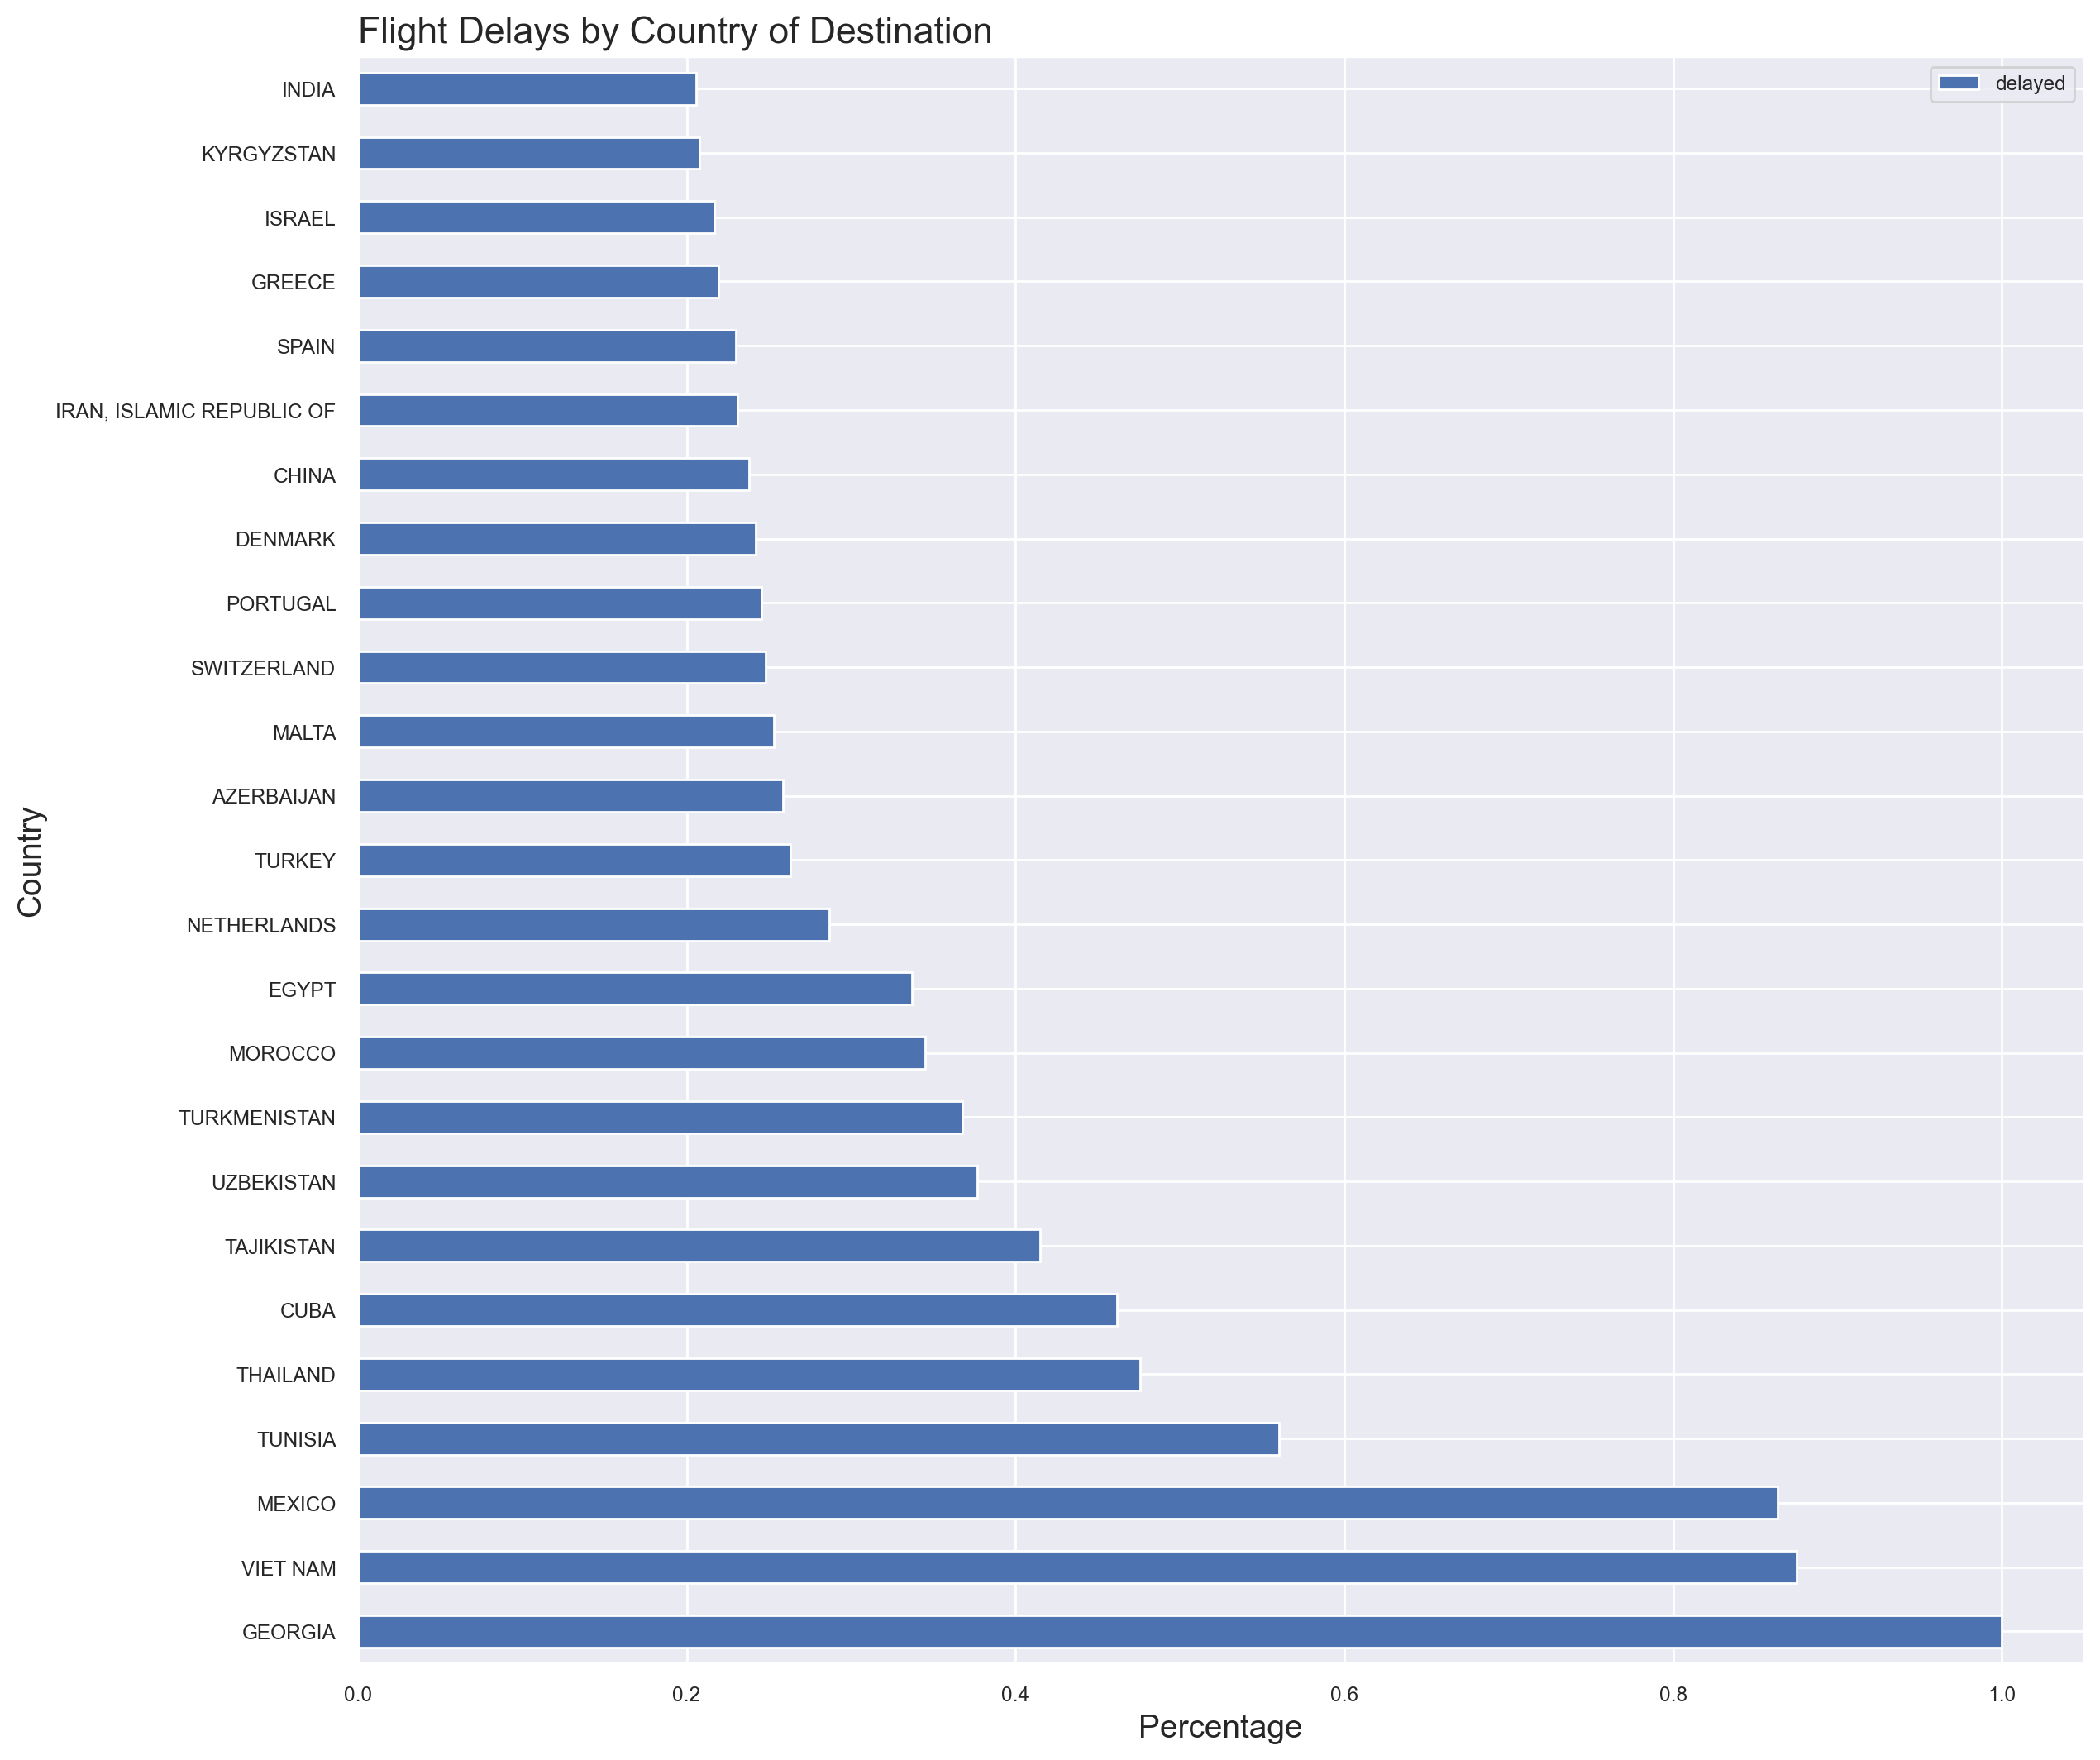

In [39]:
# create a horizontal bar plot showing the relative flight delays by country of destination
country_dep_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Country of Destination', loc='left', fontsize = 16)
plt.ylabel('Country', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that flights departing to **Georgia** have relatively the most delays.  
<br/><br/>

In [117]:
# Which is the country from which the flight arrived with the most delays? Absolute
country_arr_abs = df[(df.delayed == 1) & (df.departing == 0)].groupby('country_name').count().sort_values(by='delayed', ascending=False)[['delayed']]
country_arr_abs


delayed
country_name                      
RUSSIAN FEDERATION            7339
GERMANY                       1649
DOMINICAN REPUBLIC             795
FRANCE                         766
ITALY                          597
...                            ...
PAKISTAN                         1
IRAN, ISLAMIC REPUBLIC OF        1
GEORGIA                          1
UNITED STATES                    1
ALGERIA                          1

[61 rows x 1 columns]

In [118]:
# Which is the country from which the flight arrived with the most delays? Relative
country_arr_rel = country_arr_abs / df[df.departing == 0].groupby('country_name').count()[['delayed']]
country_arr_rel.sort_values(by='delayed', ascending=False)


delayed
country_name                               
NETHERLANDS                        0.631579
DOMINICAN REPUBLIC                 0.563031
HUNGARY                            0.500000
GEORGIA                            0.500000
QATAR                              0.500000
...                                     ...
MAURITIUS                               NaN
ROMANIA                                 NaN
SAUDI ARABIA                            NaN
SUDAN                                   NaN
VENEZUELA, BOLIVARIAN REPUBLIC OF       NaN

[82 rows x 1 columns]

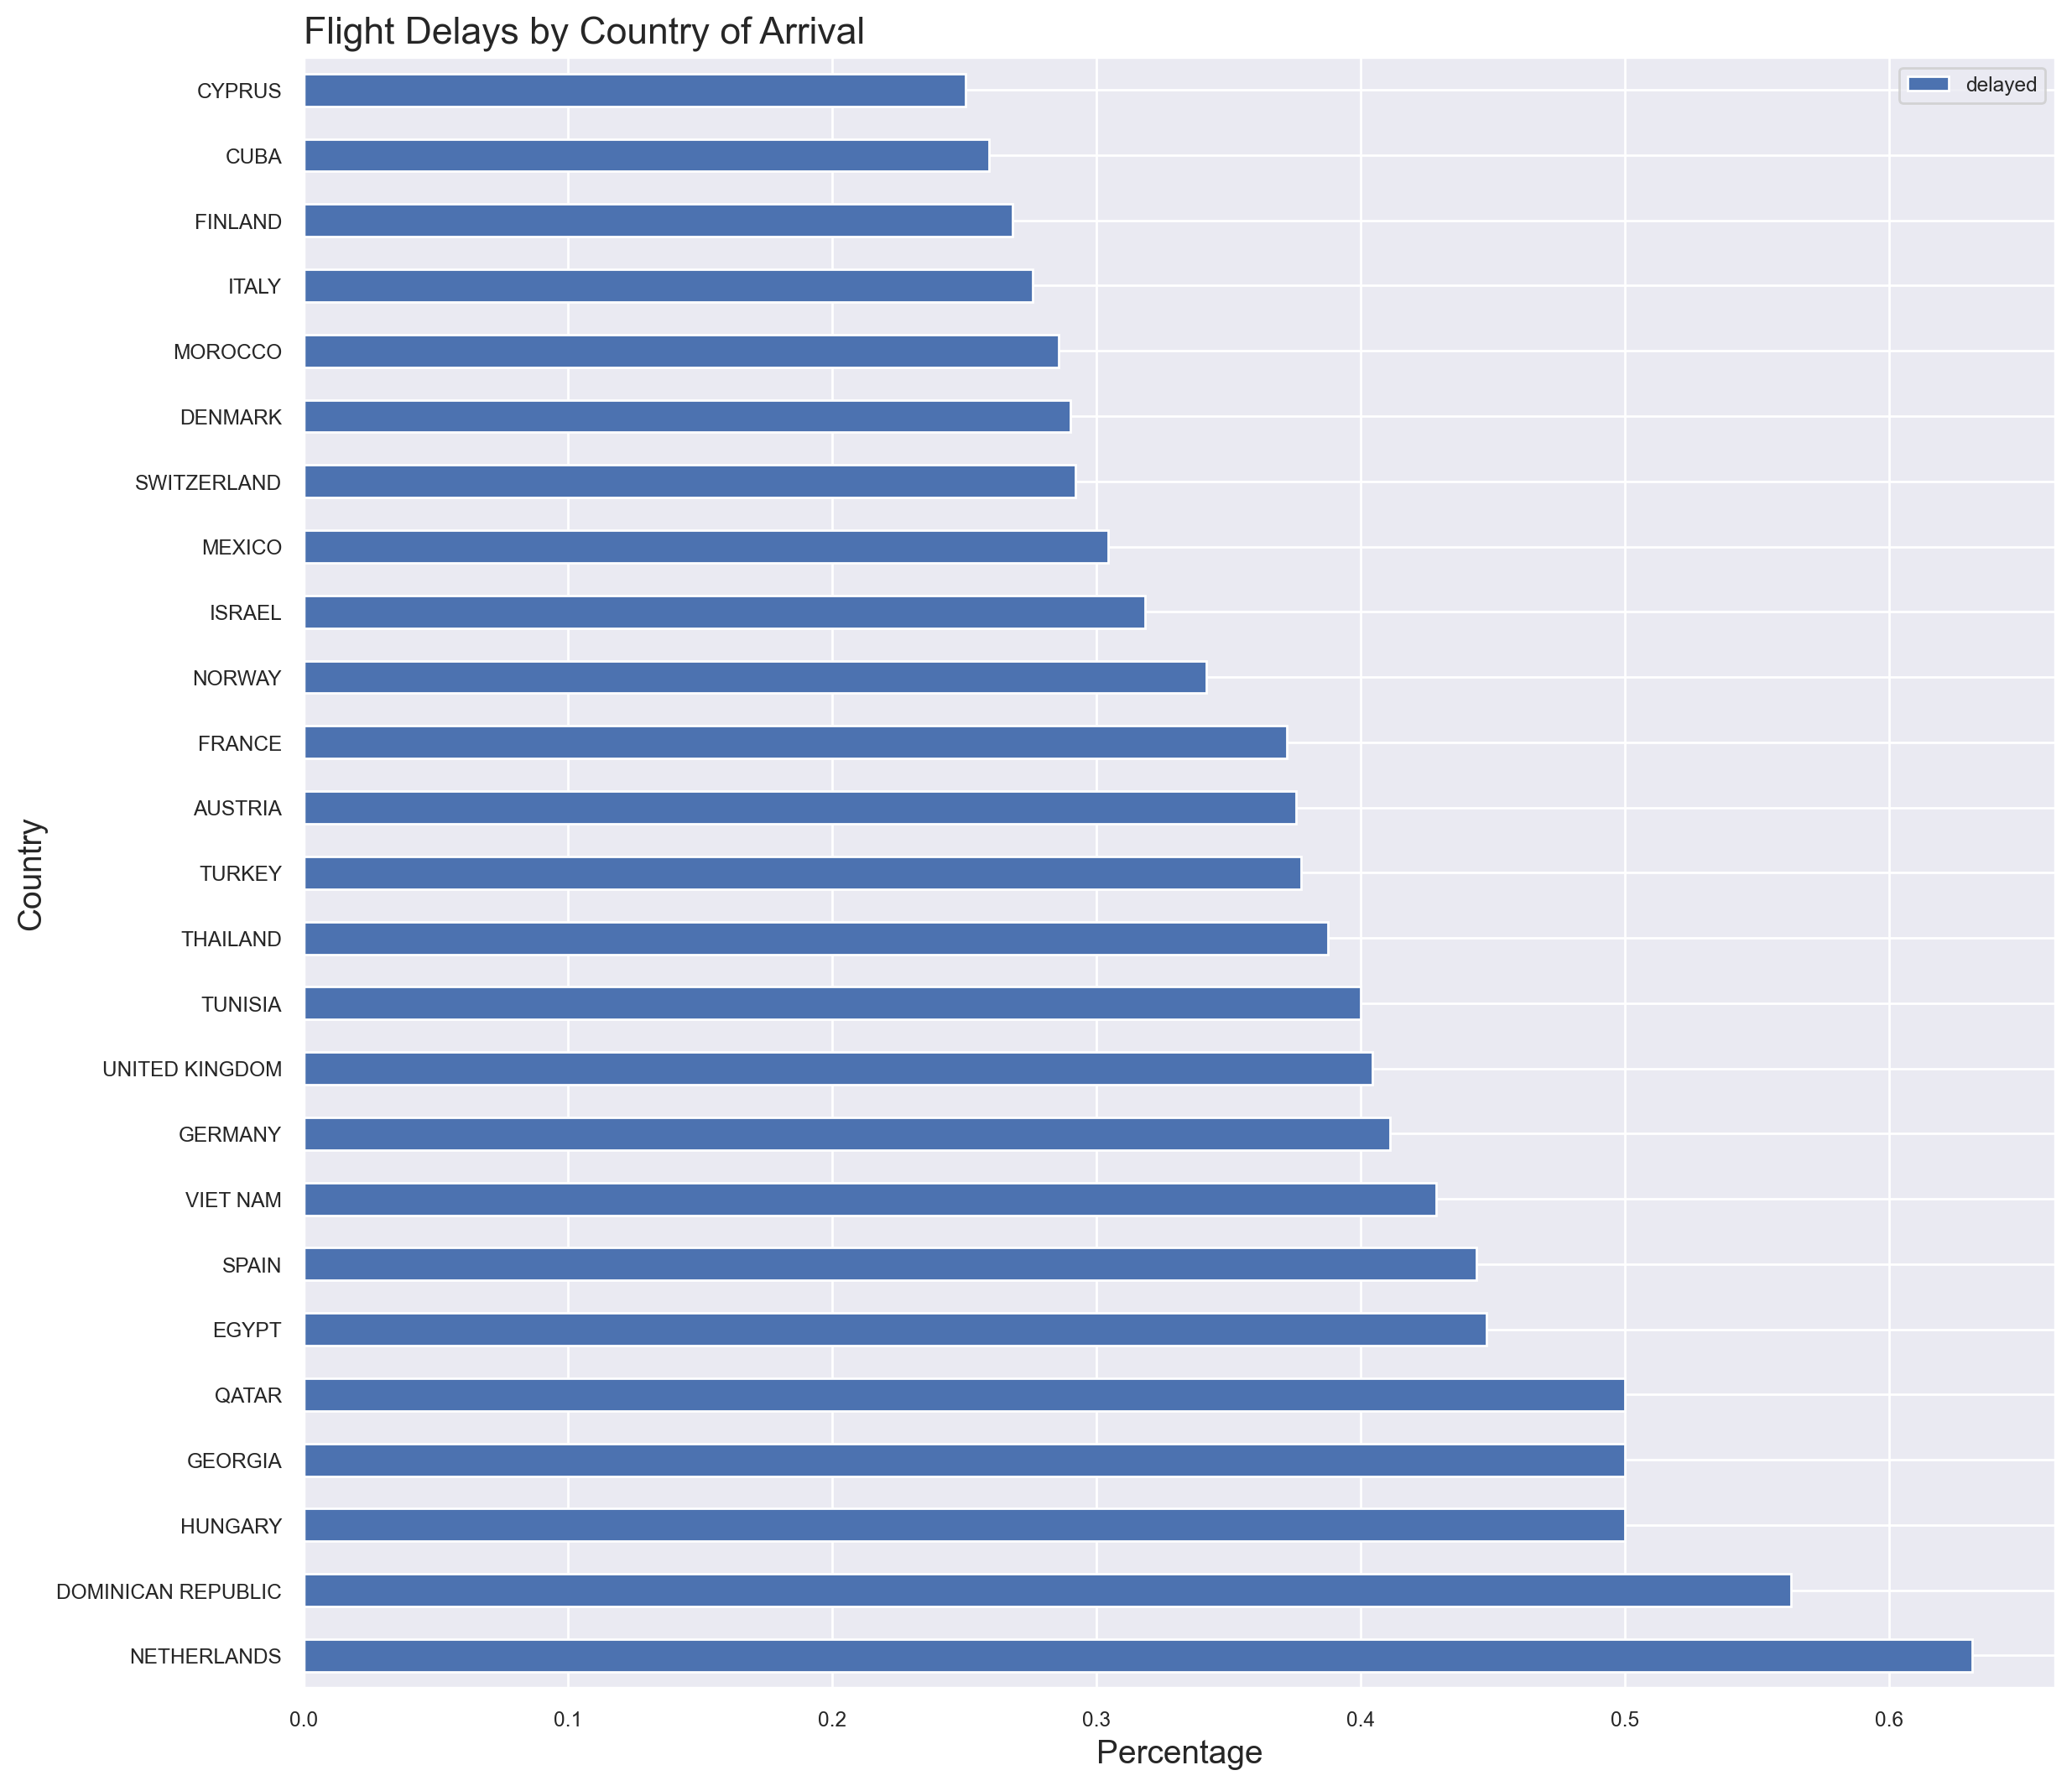

In [119]:
country_arr_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Country of Arrival', loc='left', fontsize = 16)
plt.ylabel('Country', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that flights arriving from **Netherlands** has relatively the most delays.  
  
  ***

In [120]:
# What's the spot number with the most delays? Absolute
spot_abs = delay.groupby('spot_number').count().sort_values(by='delayed', ascending=False)[['delayed']]
spot_abs

delayed
spot_number         
66              1638
65              1599
67              1544
36              1454
70              1288
...              ...
605D               1
606A               1
608C               1
609D               1
415                1

[209 rows x 1 columns]

In [121]:
# What's the spot number with the most delays? Relative
spot_rel = spot_abs / df.groupby('spot_number').count()[['delayed']]
spot_rel.sort_values(by='delayed', ascending=False)

delayed
spot_number          
93           1.000000
397A         0.916667
104          0.625000
35A          0.518519
94           0.500000
...               ...
88B               NaN
89A               NaN
91                NaN
G20-B             NaN
ВПП-1             NaN

[286 rows x 1 columns]

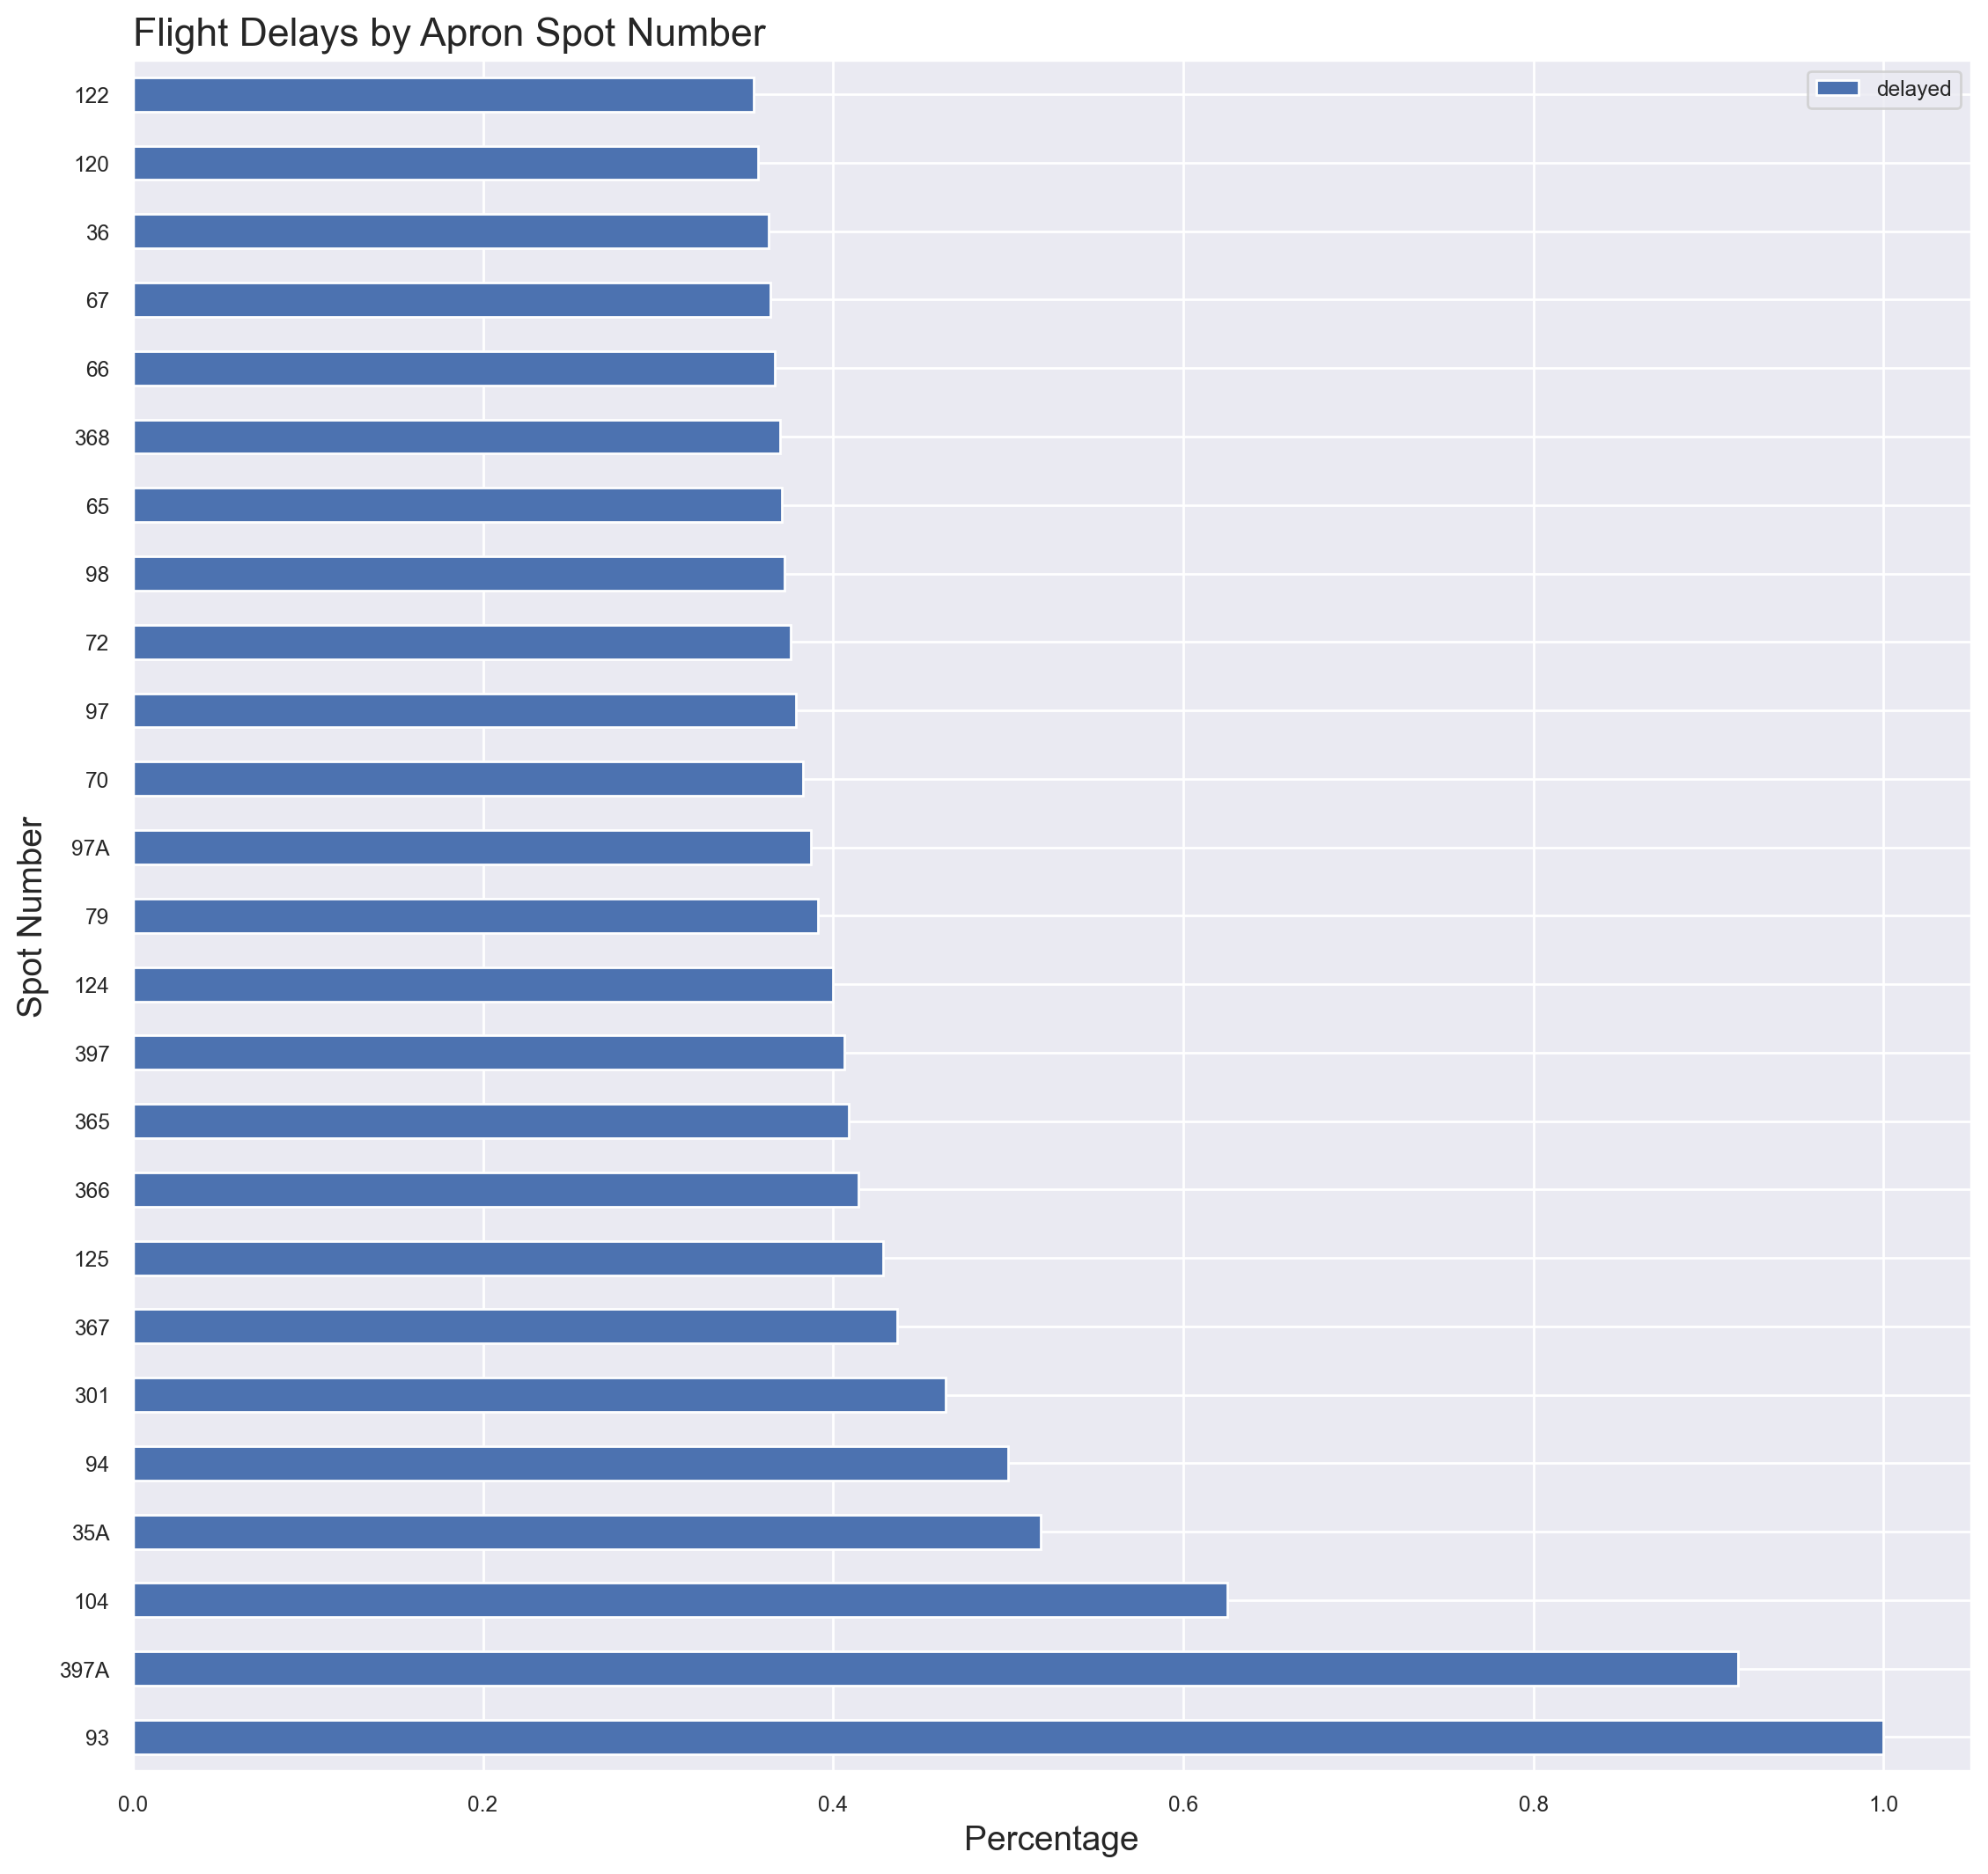

In [122]:
spot_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Apron Spot Number', loc='left', fontsize = 16)
plt.ylabel('Spot Number', fontsize = 14)
plt.xlabel('Percentage', fontsize = 14)
plt.show()

The graph above shows that **93** has relatively the most delays among the apron spot numbers.  
  
  ***

In [123]:
# How many passenger on average has a delayed flight compared to one without delay?
# delay.groupby('pax_total').count().sort_values(by='delayed', ascending=False)[['delayed']]
pax = df.groupby('delayed')[['pax_total']].mean()
pax

pax_total
delayed            
0         97.086911
1        122.903605

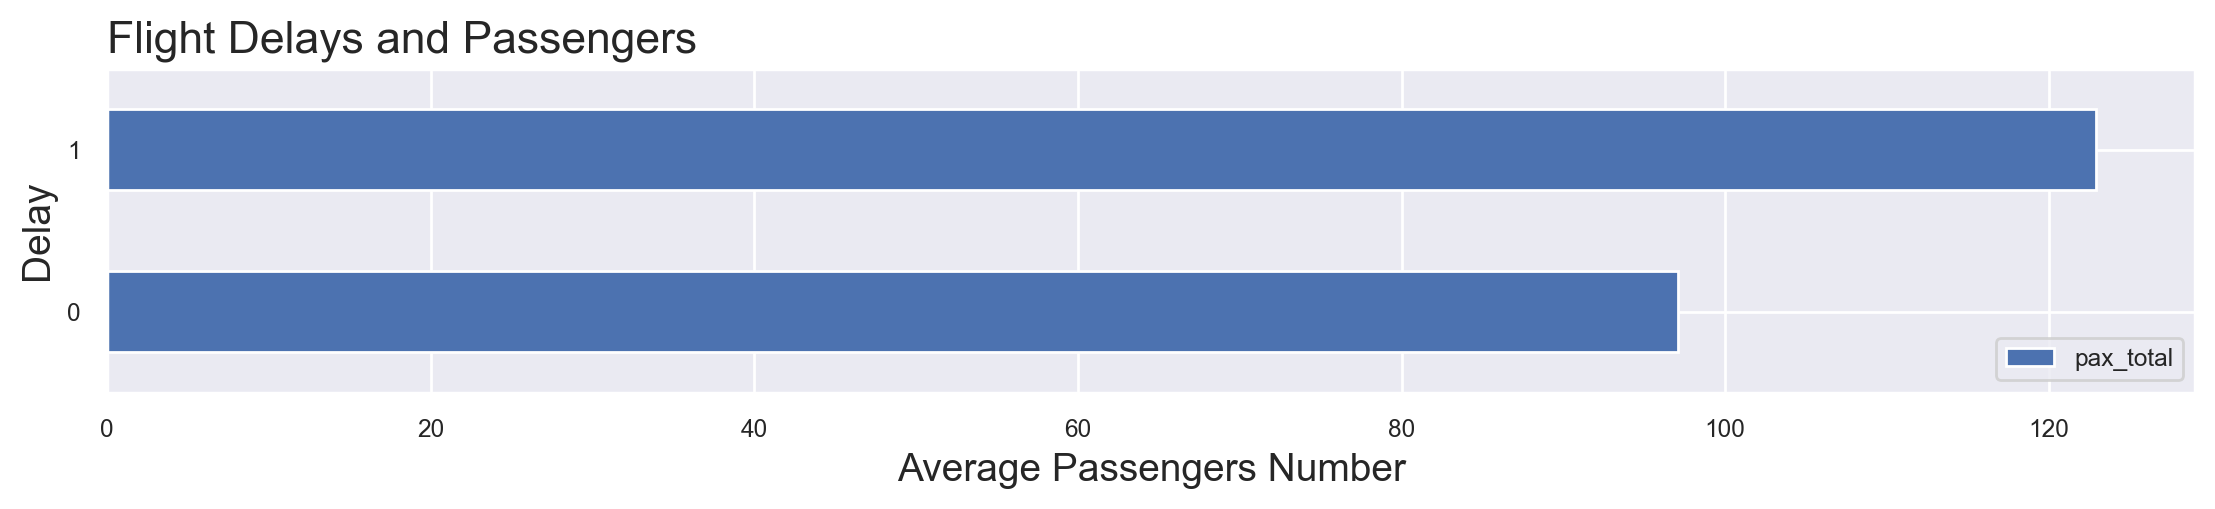

In [125]:
pax.plot(kind='barh', rot=0, figsize=(12,2))
plt.title('Flight Delays and Passengers', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Passengers Number', fontsize = 14)
plt.show()

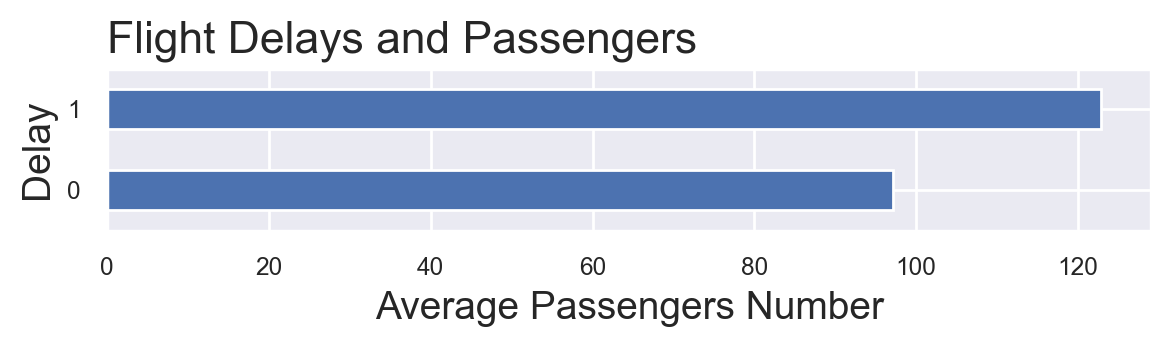

In [159]:
pax.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Passengers', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Passengers Number', fontsize = 14)
plt.legend('', frameon=False)
plt.show()

The graph above shows that **delayed flights** have higher average passenger numbers than non-delayed flights.  
  
  ***

In [126]:
# What's the average load factor of a delayed flight compared to one without delay?
lf = df.groupby('delayed')[['load_factor']].mean()
lf

load_factor
delayed             
0          81.961487
1          77.461711

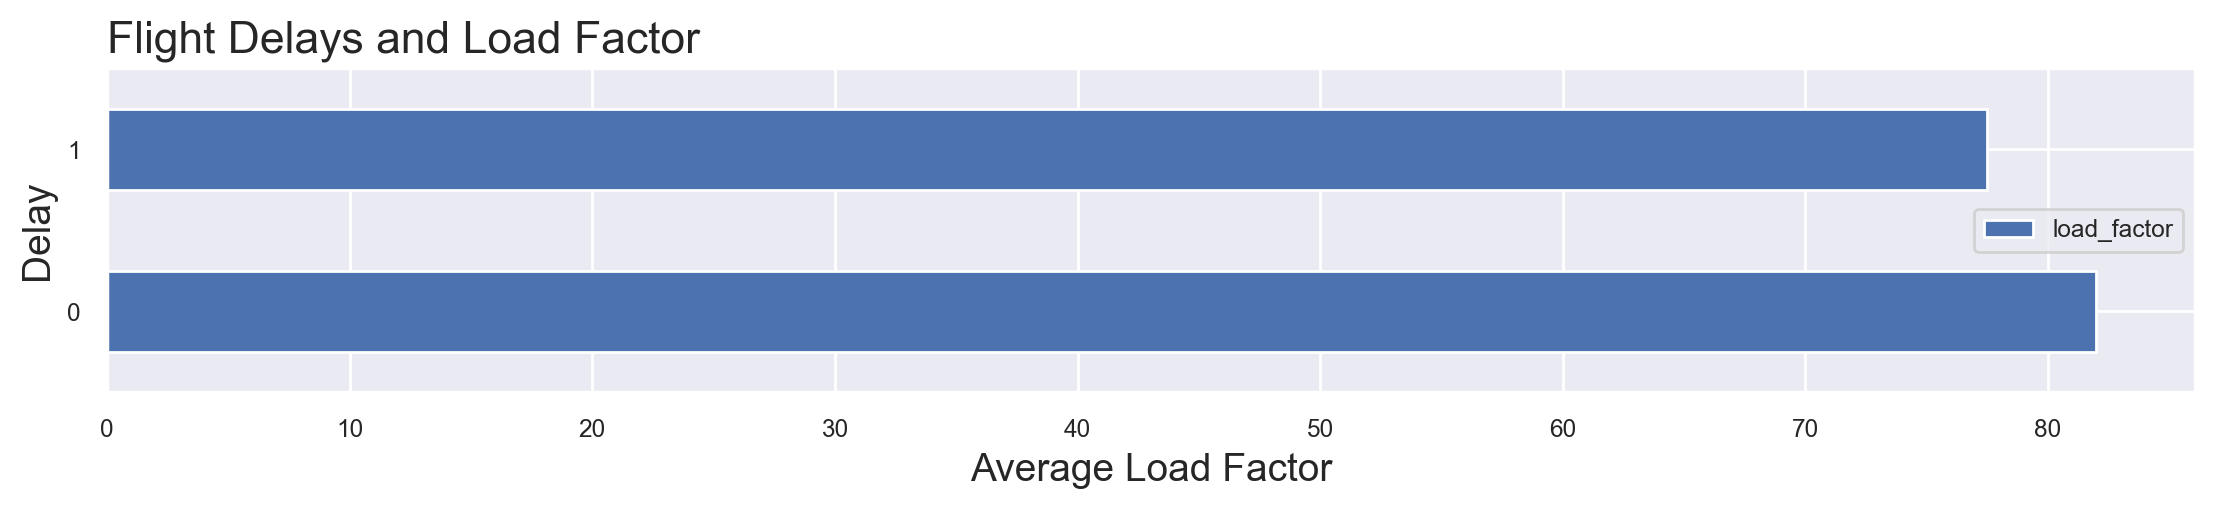

In [127]:
lf.plot(kind='barh', rot=0, figsize=(12,2))
plt.title('Flight Delays and Load Factor', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Load Factor', fontsize = 14)
plt.show()

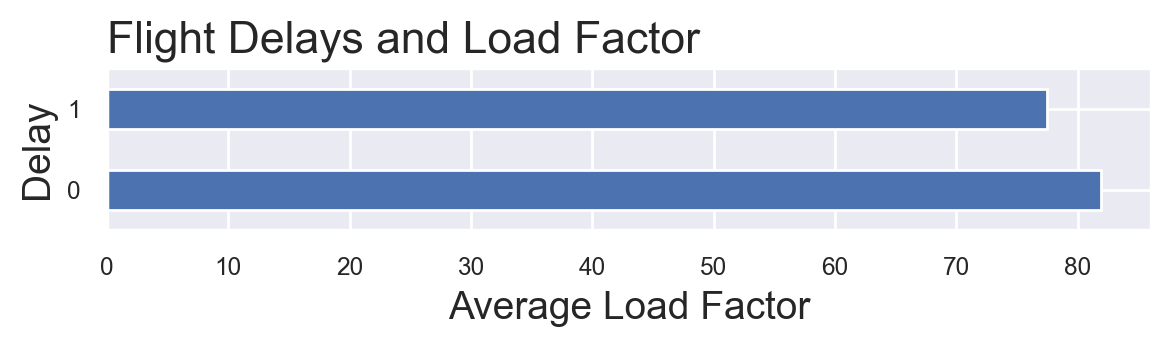

In [160]:
lf.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Load Factor', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Load Factor', fontsize = 14)
plt.legend('', frameon=False)
plt.show()

The graph above shows that **non-delayed flights** have higher average load factor than delayed flights.  
  
  ***

In [128]:
# What's the average baggage weight of a delayed flight compared to one without delay?
bag = df.groupby('delayed')[['baggage_weight']].mean()
bag

baggage_weight
delayed                
0           1019.065780
1           1460.758661

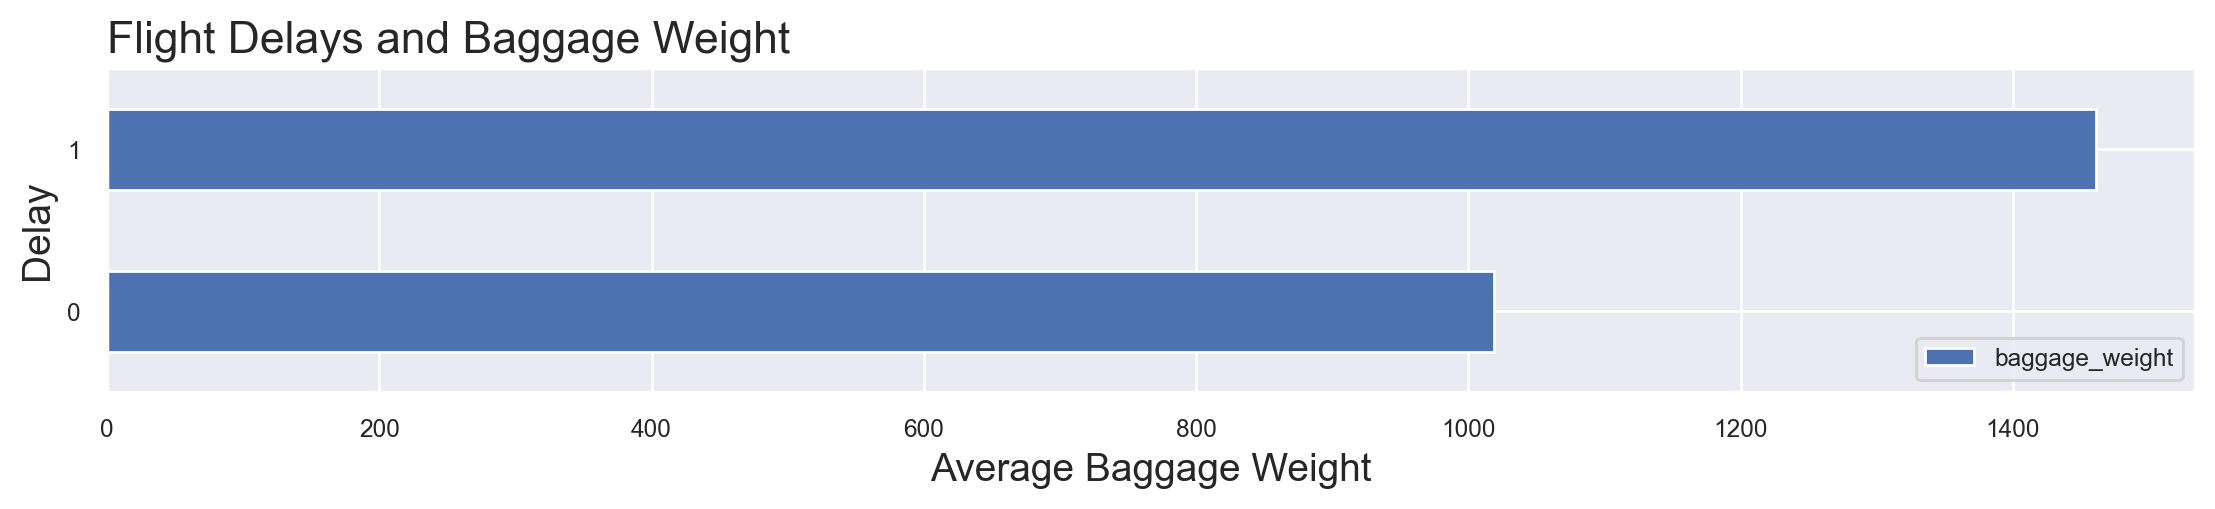

In [131]:
bag.plot(kind='barh', rot=0, figsize=(12,2))
plt.title('Flight Delays and Baggage Weight', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Baggage Weight', fontsize = 14)
plt.show()

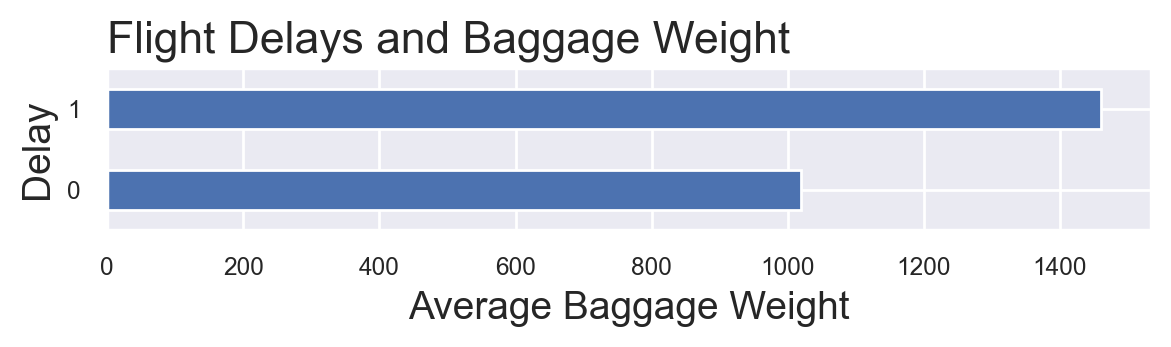

In [162]:
bag.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Baggage Weight', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Baggage Weight', fontsize = 14)
plt.legend('', frameon=False)
plt.show()

The graph above shows that **delayed flights** have significantly higher average baggage weight than non-delayed flights.  
  
  ***

In [132]:
# What's the average precipitation when a flight is delayed compared to an on-time one?
# delay.groupby('precipitation').count().sort_values(by='delayed', ascending=False)[['delayed']]
precip = df.groupby('delayed')[['precipitation']].mean()
precip

precipitation
delayed               
0             0.083463
1             0.091088

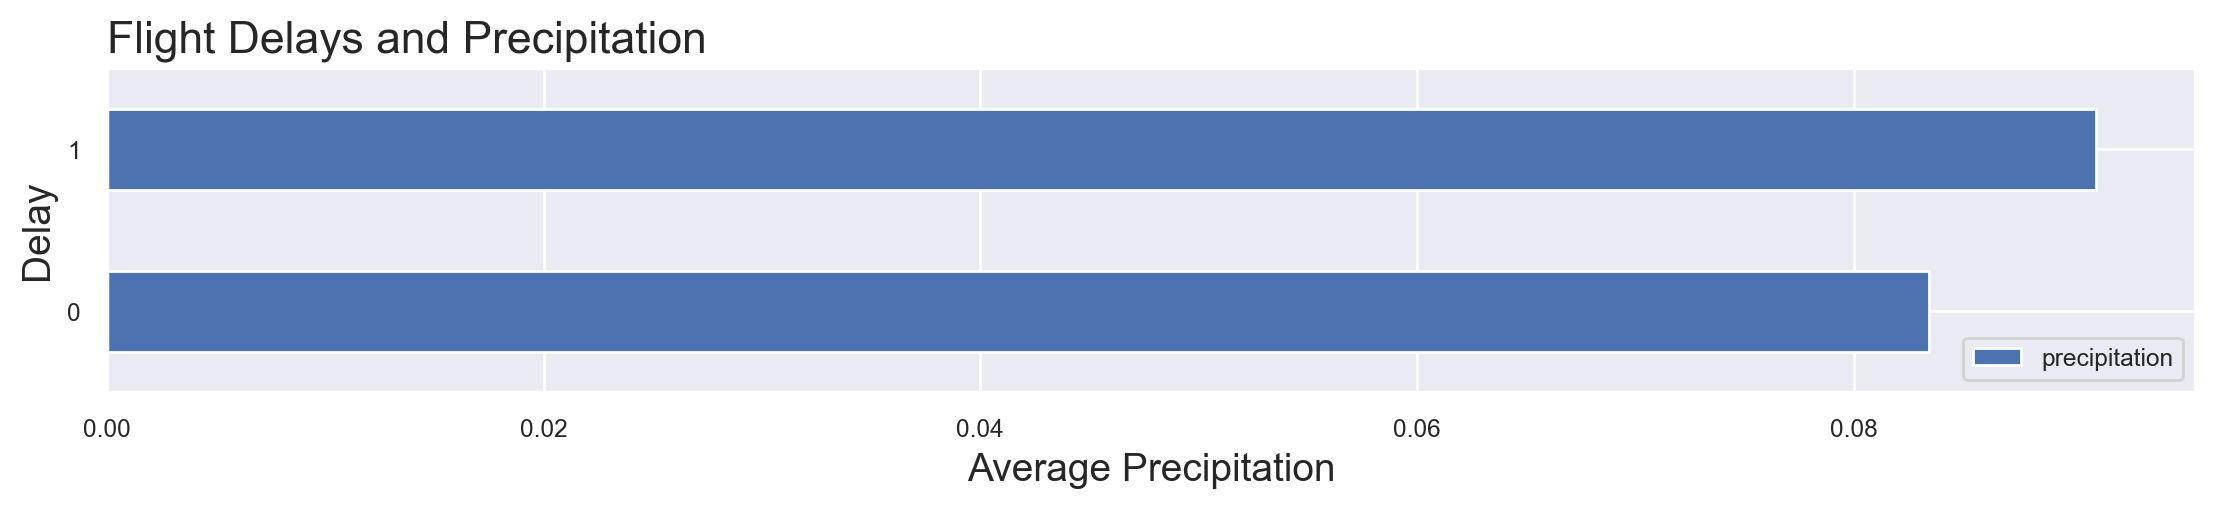

In [133]:
precip.plot(kind='barh', rot=0, figsize=(12,2))
plt.title('Flight Delays and Precipitation', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Precipitation', fontsize = 14)
plt.show()

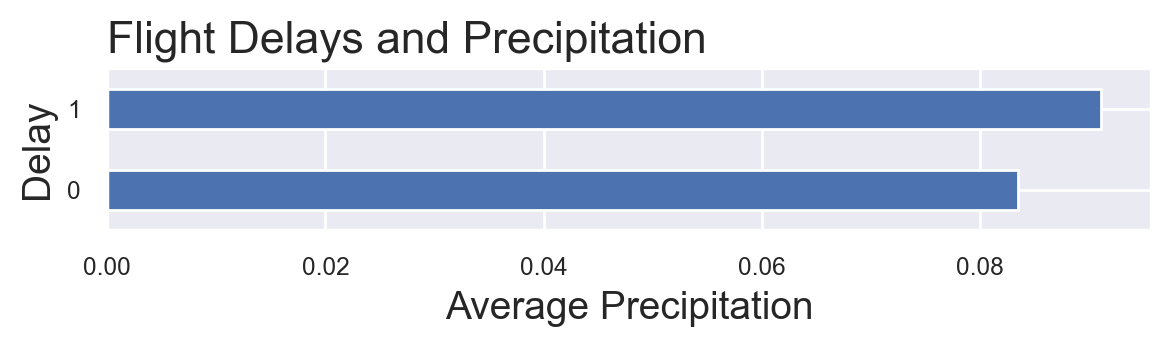

In [163]:
precip.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Precipitation', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Precipitation', fontsize = 14)
plt.legend('', frameon=False)
plt.show()

The graph above shows that **delayed flights** have higher average precipitation than non-delayed flights.  
  
  ***

In [134]:
# What's the most common weather code when a flight is delayed compared to an on-time one?
# delay.groupby('weather_code').count().sort_values(by='delayed', ascending=False)[['delayed']]
wcode = df.groupby(['weather_code', 'delayed'])[['weather_code']].count()
wcode

weather_code
weather_code delayed              
0            0               30543
             1                6248
1            0               32872
             1                6591
2            0               23256
             1                4745
3            0               47197
             1                9424
51           0               14145
             1                2759
53           0                5498
             1                1158
61           0                2054
             1                 499
63           0                 541
             1                 127
71           0                4686
             1                1316
73           0                1241
             1                 393

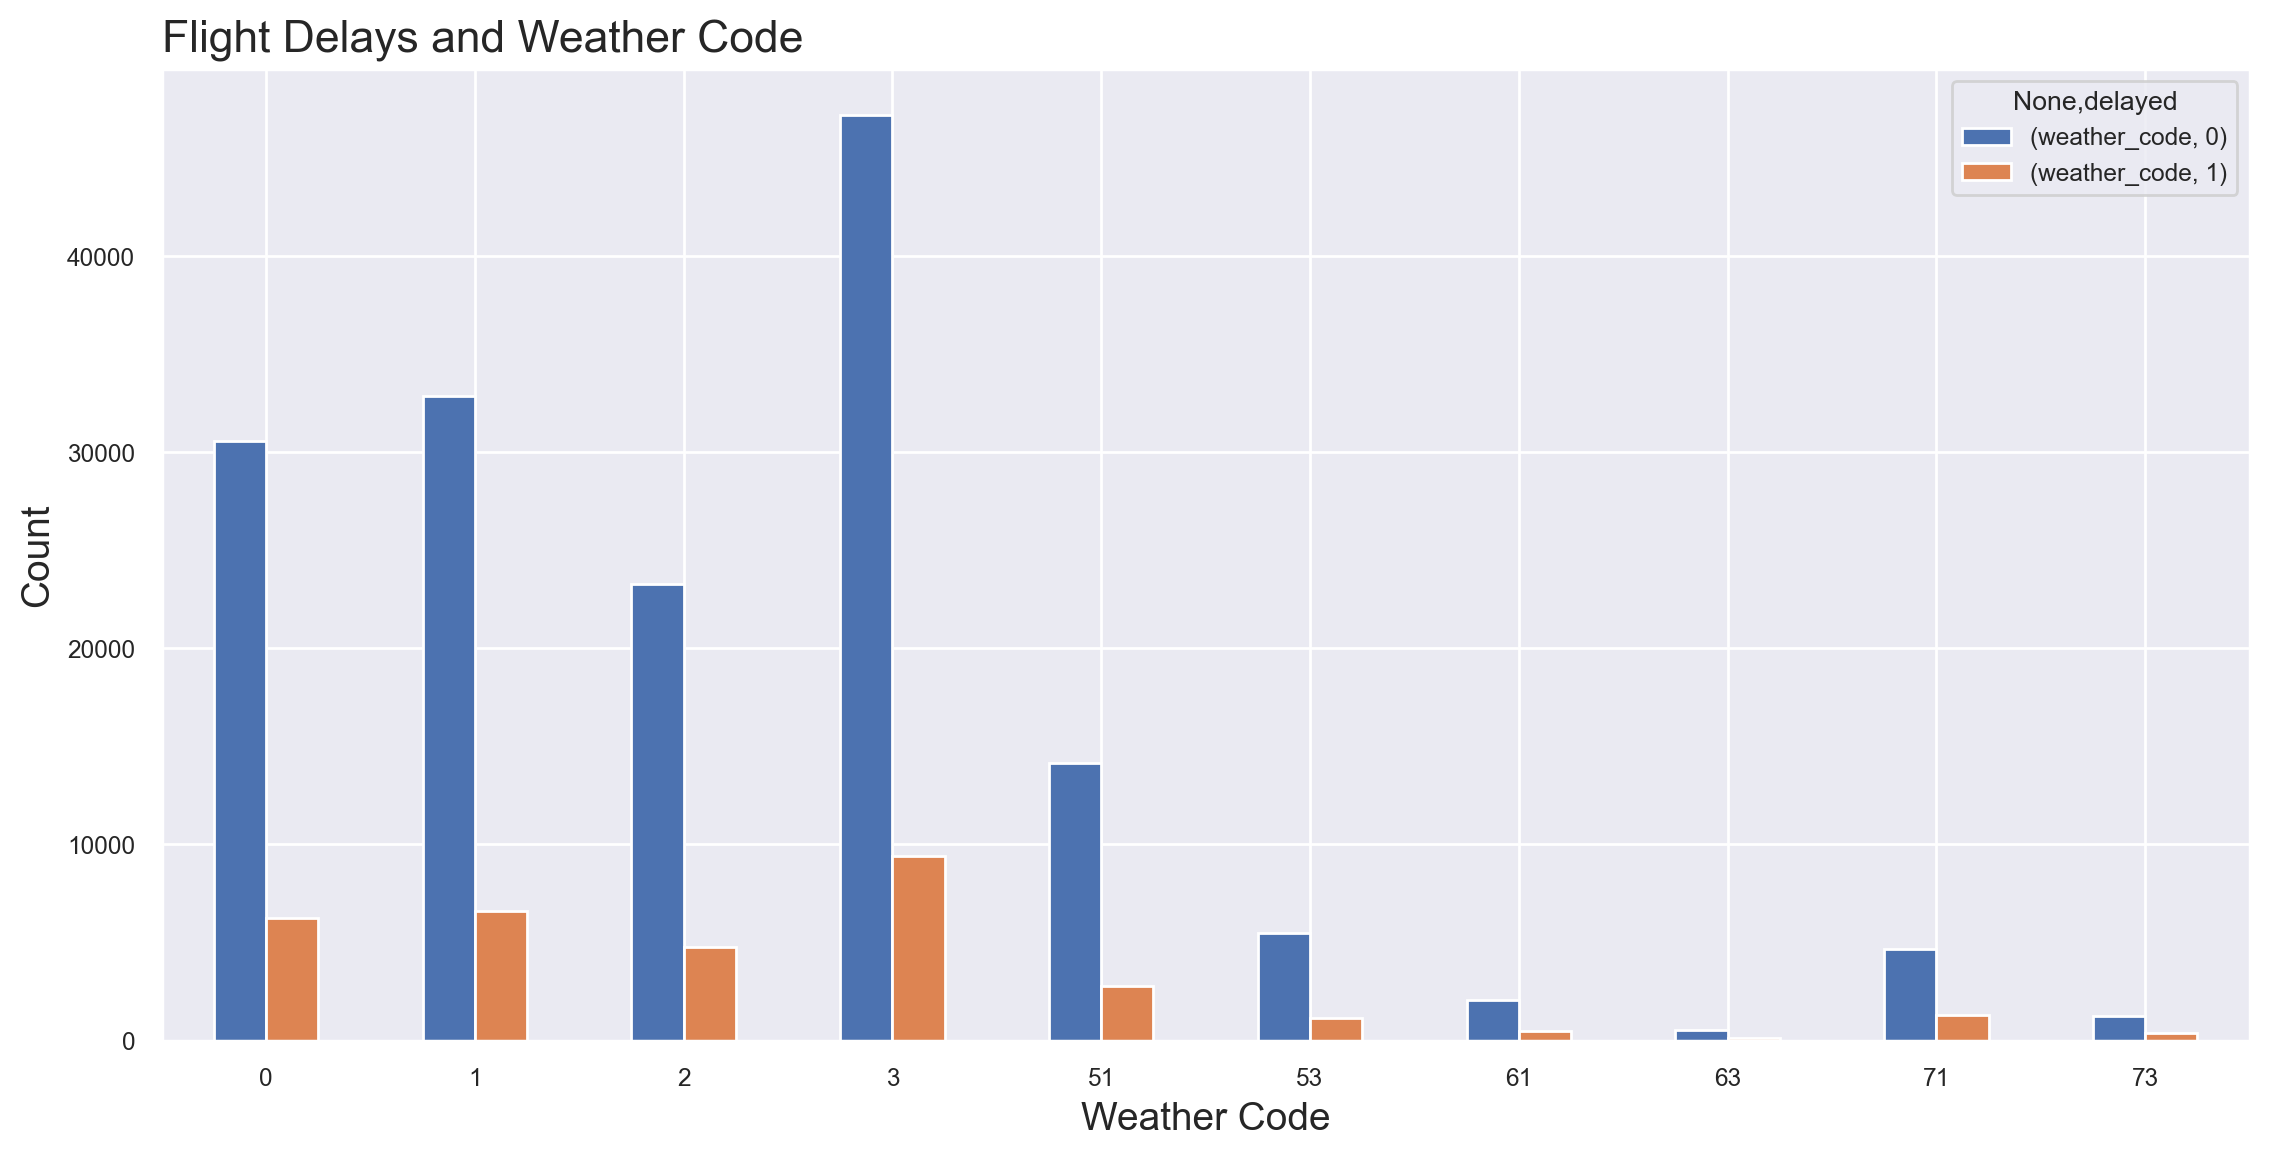

In [135]:
wcode.unstack().plot(kind='bar', rot=0, figsize=(12,6))
plt.title('Flight Delays and Weather Code', loc='left', fontsize = 16)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Weather Code', fontsize = 14)
plt.show()

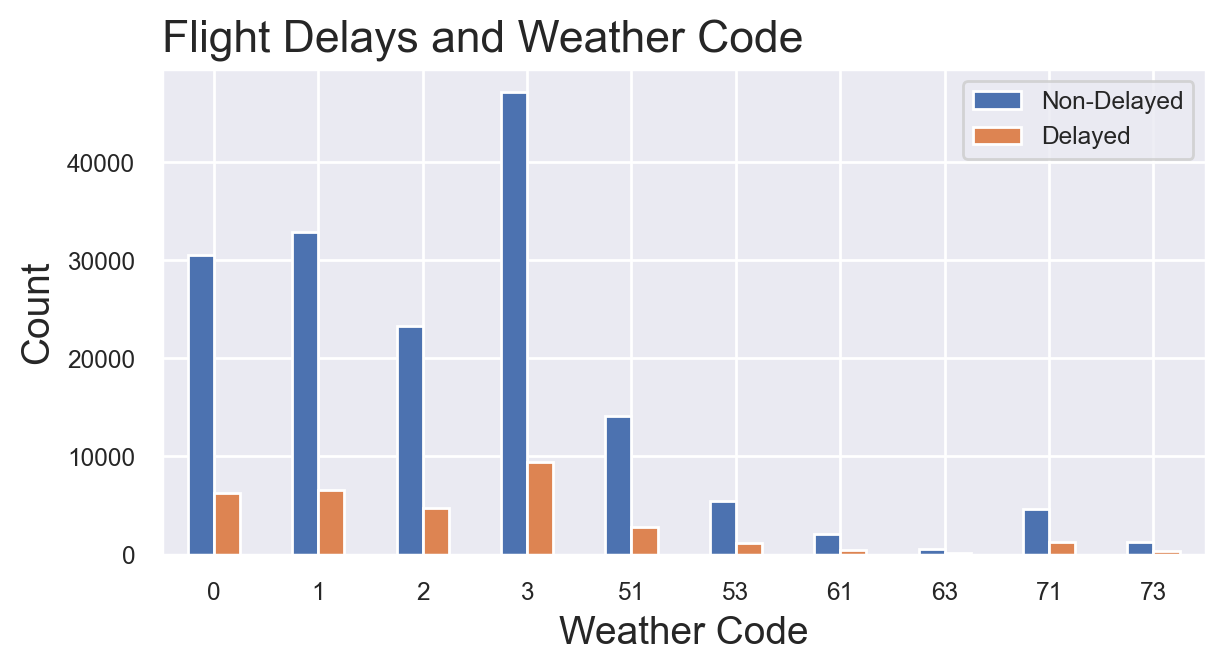

In [169]:
wcode.unstack().plot(kind='bar', rot=0, figsize=(6,3))
plt.title('Flight Delays and Weather Code', loc='left', fontsize = 16)
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Weather Code', fontsize = 14)

legend_labels = ['Non-Delayed', 'Delayed']
plt.legend(labels = legend_labels, loc = 'upper right')

plt.show()

The graph above shows that both delayed and non-delayed flights have **3** as the most common weather code.  
  
  ***

In [136]:
# What's the average wind speed when a flight is delayed compared to an on-time one?
# delay.groupby('wind_speed').count().sort_values(by='delayed', ascending=False)[['delayed']]
wind = df.groupby('delayed')[['wind_speed']].mean()
wind

wind_speed
delayed            
0         11.995676
1         11.831293

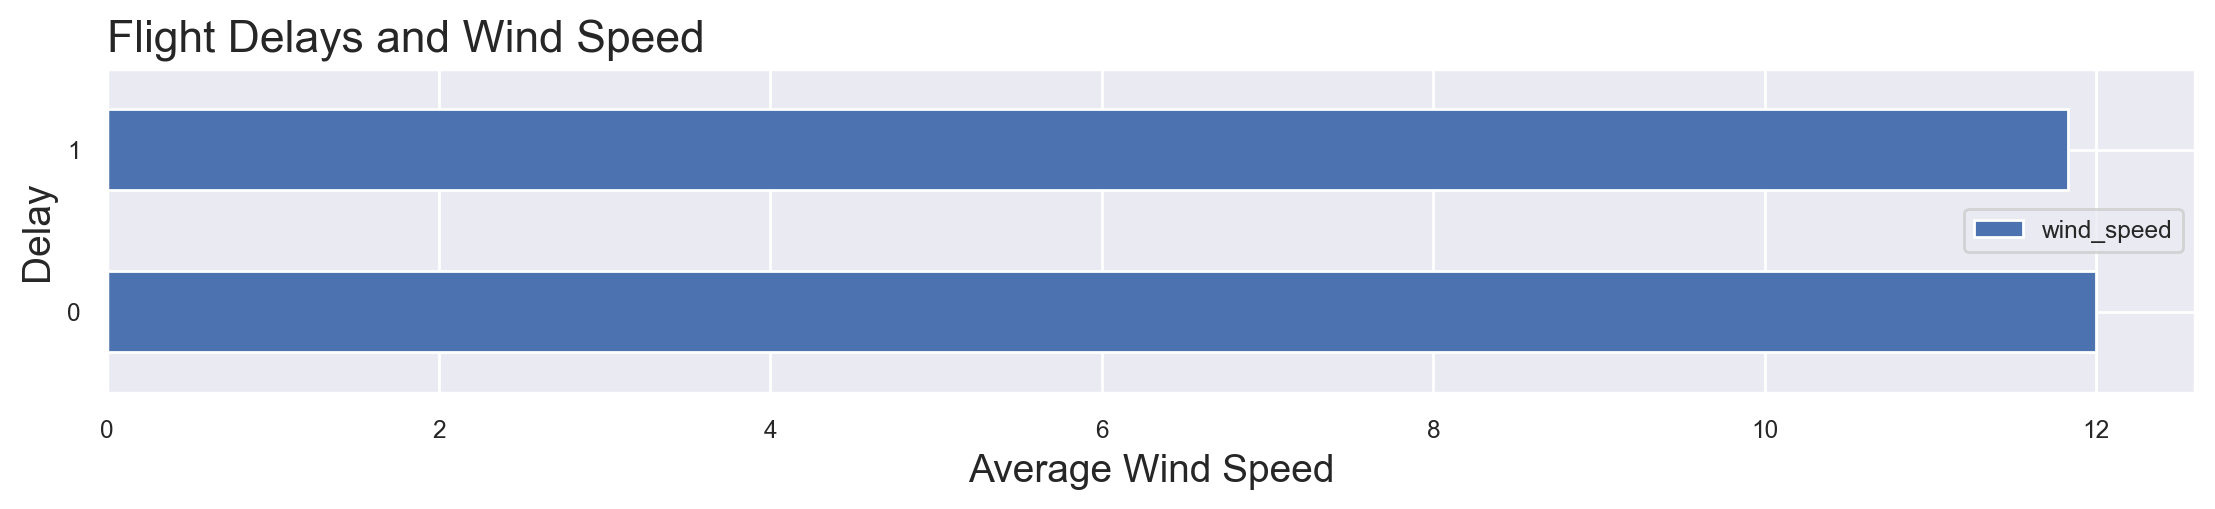

In [137]:
wind.plot(kind='barh', rot=0, figsize=(12,2))
plt.title('Flight Delays and Wind Speed', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Wind Speed', fontsize = 14)
plt.show()

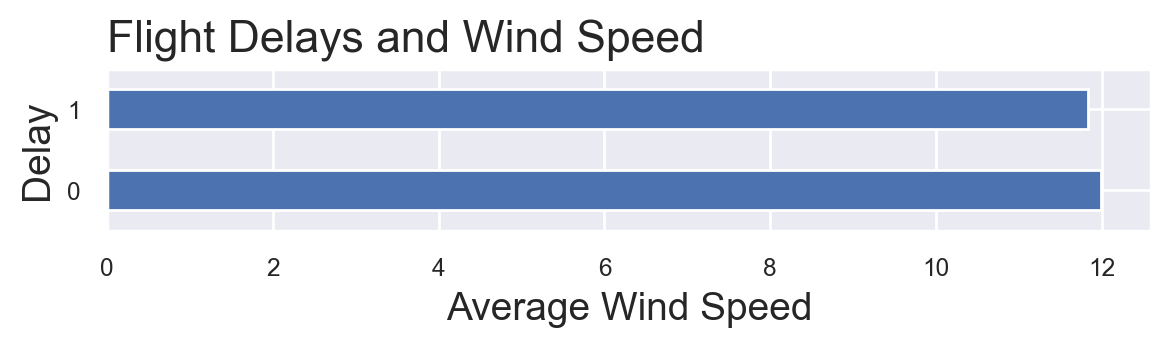

In [167]:
wind.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Wind Speed', loc='left', fontsize = 16)
plt.ylabel('Delay', fontsize = 14)
plt.xlabel('Average Wind Speed', fontsize = 14)
plt.legend('', frameon=False)
plt.show()

The graph above shows that **non-delayed flights** have slightly higher average wind speed than non-delayed flights.  
  
  ***

In [114]:
# where are the missing values?
df[df.isnull().sum(axis=1)>0]

date  year  month  day  hour  departing terminal_num  \
0       2013-01-01 03:00  2013      1    1     3        0.0            2   
1       2013-01-01 03:00  2013      1    1     3        0.0            1   
2       2013-01-01 05:00  2013      1    1     5        1.0            2   
3       2013-01-01 06:00  2013      1    1     6        1.0            1   
4       2013-01-01 07:00  2013      1    1     7        0.0            2   
...                  ...   ...    ...  ...   ...        ...          ...   
195288  2013-12-31 22:00  2013     12   31    22        0.0            1   
195289  2013-12-31 22:00  2013     12   31    22        0.0            1   
195290  2013-12-31 22:00  2013     12   31    22        0.0            1   
195291  2013-12-31 22:00  2013     12   31    22        1.0            2   
195292  2013-12-31 23:00  2013     12   31    23        0.0            3   

       airline_code                  airline_name aircraft_type_code  ...  \
0                N4          ООО "СЕВЕРНЫЙ ВЕТЕР"                763  ...   
1                OZ               ASIANA AIRLINES                74Y  ...   
2                N4          ООО "СЕВЕРНЫЙ ВЕТЕР"                763  ...   
3                OZ               ASIANA AIRLINES                74Y  ...   
4                LY     EL AL ISRAEL AIRLINES LTD                738  ...   
...             ...                           ...                ...  ...   
195288           FV    ОАО "АВИАКОМПАНИЯ "РОССИЯ"                A81  ...   
195289           FV    ОАО "АВИАКОМПАНИЯ "РОССИЯ"                A81  ...   
195290           U6  ОАО АК "УРАЛЬСКИЕ АВИАЛИНИИ"                321  ...   
195291           BT                    AIR BALTIC                735  ...   
195292          NaN                           NaN                D2T  ...   

       load_factor baggage_weight  mail_weight  temperature  \
0           67.586         3327.0          NaN          0.9   
1              NaN            NaN          NaN          0.9   
2           94.667         3224.0          0.0          0.9   
3              NaN            NaN          NaN          0.7   
4            8.235          244.0        173.0          0.8   
...            ...            ...          ...          ...   
195288      34.667          211.0          0.0          1.2   
195289      61.333          355.0          0.0          1.2   
195290     104.211         2044.0          0.0          1.2   
195291      64.035          334.0        637.0          1.2   
195292     100.000            NaN          NaN          1.2   

        relative_humidity  apparent_temperature precipitation weather_code  \
0                      94                  -2.4           0.0            3   
1                      94                  -2.4           0.0            3   
2                      94                  -2.9           0.0            3   
3                      94                  -3.3           0.0            3   
4                      94                  -3.6           0.2           71   
...                   ...                   ...           ...          ...   
195288                 84                  -2.8           0.0            2   
195289                 84                  -2.8           0.0            2   
195290                 84                  -2.8           0.0            2   
195291                 84                  -2.8           0.0            2   
195292                 83                  -2.9           0.0            2   

       wind_speed delayed  
0            13.0       0  
1            13.0       1  
2            17.0       1  
3            18.1       0  
4            19.6       0  
...           ...     ...  
195288       16.1       0  
195289       16.1       0  
195290       16.1       1  
195291       16.1       0  
195292       16.1       0  

[195293 rows x 39 columns]

#### At this stage every row has some null values.
Some columns are going to be dropped entirely, while for some others we are going to remove the rows.

***

## Pre-Modelling
Null values need to be removed for the modelling stage.  
Nominal variables need to be dummified.

***

In [3]:
# Loading the data from CSV for consistency reasons
df = pd.read_csv('datasets/mod/df_01.csv', low_memory=False)

In [7]:
df.isnull().sum()

date                         0
year                         0
month                        0
day                          0
weekday                      0
hour                         0
departing                    0
terminal_num             59862
airline_code             11161
airline_name             11353
aircraft_type_code       57936
aircraft_type_name       57936
service_type                 0
domestic                     0
cancelled                    0
regular                      0
CIS_country                  0
country_name                 0
flight_number                4
main_delay_code         162033
source_delay            180400
runway                  126803
spot_number              57927
pax_total                72275
pax_1                        0
pax_2                        0
pax_3                        0
pax_4                        0
pax_5                        0
pax_6                        0
load_factor              12846
baggage_weight           74207
mail_wei

In [8]:
# Dropping columns and rows.
# 1st round
df.drop(columns=['main_delay_code', 'source_delay', 'runway'], inplace=True)
df.shape

(195293, 37)

In [9]:
df.isnull().sum()

date                         0
year                         0
month                        0
day                          0
weekday                      0
hour                         0
departing                    0
terminal_num             59862
airline_code             11161
airline_name             11353
aircraft_type_code       57936
aircraft_type_name       57936
service_type                 0
domestic                     0
cancelled                    0
regular                      0
CIS_country                  0
country_name                 0
flight_number                4
spot_number              57927
pax_total                72275
pax_1                        0
pax_2                        0
pax_3                        0
pax_4                        0
pax_5                        0
pax_6                        0
load_factor              12846
baggage_weight           74207
mail_weight             112335
temperature                  0
relative_humidity            0
apparent

In [10]:
# Dropping columns and rows.
# 2nd round
df.drop(columns=['date', 'flight_number', 'mail_weight'], inplace=True)
df.shape

(195293, 34)

In [11]:
df.isnull().sum()

year                        0
month                       0
day                         0
weekday                     0
hour                        0
departing                   0
terminal_num            59862
airline_code            11161
airline_name            11353
aircraft_type_code      57936
aircraft_type_name      57936
service_type                0
domestic                    0
cancelled                   0
regular                     0
CIS_country                 0
country_name                0
spot_number             57927
pax_total               72275
pax_1                       0
pax_2                       0
pax_3                       0
pax_4                       0
pax_5                       0
pax_6                       0
load_factor             12846
baggage_weight          74207
temperature                 0
relative_humidity           0
apparent_temperature        0
precipitation               0
weather_code                0
wind_speed                  0
delayed   

In [12]:
df[df.isnull().sum(axis=1)>0]
# The row drop operation seems more feasible now

year  month  day  weekday  hour  departing terminal_num airline_code  \
1       2013      1    1        1     3        0.0            1           OZ   
3       2013      1    1        1     6        1.0            1           OZ   
7       2013      1    1        1     9        1.0            2          NaN   
20      2013      1    1        1    12        0.0            2          NaN   
21      2013      1    1        1    12        0.0            2           AY   
...      ...    ...  ...      ...   ...        ...          ...          ...   
195283  2013     12   31        1    22        1.0          NaN           FV   
195284  2013     12   31        1    22        0.0          NaN           SU   
195285  2013     12   31        1    22        0.0          NaN           SU   
195287  2013     12   31        1    22        0.0            3          NaN   
195292  2013     12   31        1    23        0.0            3          NaN   

                               airline_name aircraft_type_code  ... pax_6  \
1                           ASIANA AIRLINES                74Y  ...     0   
3                           ASIANA AIRLINES                74Y  ...     0   
7                                       NaN                CJ3  ...     0   
20                                      NaN                H80  ...     0   
21                                  FINNAIR                320  ...     0   
...                                     ...                ...  ...   ...   
195283           ОАО "АВИАКОМПАНИЯ "РОССИЯ"                NaN  ...     0   
195284  ОАО "АЭРОФЛОТ-РОССИЙСКИЕ АВИАЛИНИИ"                NaN  ...     0   
195285  ОАО "АЭРОФЛОТ-РОССИЙСКИЕ АВИАЛИНИИ"                NaN  ...     0   
195287                                  NaN                C30  ...     0   
195292                                  NaN                D2T  ...     0   

       load_factor  baggage_weight  temperature  relative_humidity  \
1              NaN             NaN          0.9                 94   
3              NaN             NaN          0.7                 94   
7              NaN             NaN          1.0                 92   
20             NaN             NaN          1.1                 94   
21             0.0             NaN          1.1                 94   
...            ...             ...          ...                ...   
195283       100.0             NaN          1.2                 84   
195284       100.0             NaN          1.2                 84   
195285       100.0             NaN          1.2                 84   
195287         NaN             NaN          1.2                 84   
195292       100.0             NaN          1.2                 83   

        apparent_temperature precipitation weather_code  wind_speed  delayed  
1                       -2.4           0.0            3        13.0        1  
3                       -3.3           0.0            3        18.1        0  
7                       -3.7           0.1           71        21.0        0  
20                      -3.3           0.6           73        19.5        0  
21                      -3.3           0.6           73        19.5        0  
...                      ...           ...          ...         ...      ...  
195283                  -2.8           0.0            2        16.1        0  
195284                  -2.8           0.0            2        16.1        0  
195285                  -2.8           0.0            2        16.1        0  
195287                  -2.8           0.0            2        16.1        0  
195292                  -2.9           0.0            2        16.1        0  

[75680 rows x 34 columns]

In [13]:
df.dropna(axis=0, how='any', inplace=True)
df.shape

(119613, 34)

In [14]:
df.isnull().sum()

year                    0
month                   0
day                     0
weekday                 0
hour                    0
departing               0
terminal_num            0
airline_code            0
airline_name            0
aircraft_type_code      0
aircraft_type_name      0
service_type            0
domestic                0
cancelled               0
regular                 0
CIS_country             0
country_name            0
spot_number             0
pax_total               0
pax_1                   0
pax_2                   0
pax_3                   0
pax_4                   0
pax_5                   0
pax_6                   0
load_factor             0
baggage_weight          0
temperature             0
relative_humidity       0
apparent_temperature    0
precipitation           0
weather_code            0
wind_speed              0
delayed                 0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119613 entries, 0 to 195291
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  119613 non-null  int64  
 1   month                 119613 non-null  int64  
 2   day                   119613 non-null  int64  
 3   weekday               119613 non-null  int64  
 4   hour                  119613 non-null  int64  
 5   departing             119613 non-null  float64
 6   terminal_num          119613 non-null  object 
 7   airline_code          119613 non-null  object 
 8   airline_name          119613 non-null  object 
 9   aircraft_type_code    119613 non-null  object 
 10  aircraft_type_name    119613 non-null  object 
 11  service_type          119613 non-null  object 
 12  domestic              119613 non-null  float64
 13  cancelled             119613 non-null  float64
 14  regular               119613 non-null  float64
 15  

#### Dummification
Nominal variables need to be dummified for the modelling stage.

***

In [16]:
# Dummifyng nominal variables
df_dum = pd.get_dummies(df, drop_first=True)
df_dum

year  month  day  weekday  hour  departing  domestic  cancelled  \
0       2013      1    1        1     3        0.0       0.0        0.0   
2       2013      1    1        1     5        1.0       0.0        0.0   
4       2013      1    1        1     7        0.0       0.0        0.0   
5       2013      1    1        1     9        1.0       0.0        0.0   
6       2013      1    1        1     9        1.0       0.0        0.0   
...      ...    ...  ...      ...   ...        ...       ...        ...   
195286  2013     12   31        1    22        0.0       1.0        0.0   
195288  2013     12   31        1    22        0.0       1.0        0.0   
195289  2013     12   31        1    22        0.0       1.0        0.0   
195290  2013     12   31        1    22        0.0       0.0        0.0   
195291  2013     12   31        1    22        1.0       0.0        0.0   

        regular  CIS_country  ...  spot_number_9  spot_number_93  \
0           1.0          0.0  ...              0               0   
2           1.0          0.0  ...              0               0   
4           1.0          0.0  ...              0               0   
5           1.0          0.0  ...              0               0   
6           1.0          0.0  ...              0               0   
...         ...          ...  ...            ...             ...   
195286      1.0          0.0  ...              0               0   
195288      1.0          0.0  ...              0               0   
195289      1.0          0.0  ...              0               0   
195290      1.0          0.0  ...              0               0   
195291      1.0          0.0  ...              0               0   

        spot_number_94  spot_number_97  spot_number_97A  spot_number_98  \
0                    0               0                0               0   
2                    0               0                0               0   
4                    0               0                0               0   
5                    0               0                0               0   
6                    0               0                0               0   
...                ...             ...              ...             ...   
195286               0               0                0               0   
195288               0               0                0               0   
195289               0               0                0               0   
195290               0               0                0               0   
195291               0               0                0               0   

        spot_number_99  spot_number_G20-A  spot_number_АНГ  spot_number_ЗАВ  
0                    0                  0                0                0  
2                    0                  0                0                0  
4                    0                  0                0                0  
5                    0                  0                0                0  
6                    0                  0                0                0  
...                ...                ...              ...              ...  
195286               0                  0                0                0  
195288               0                  0                0                0  
195289               0                  0                0                0  
195290               0                  0                0                0  
195291               0                  0                0                0  

[119613 rows x 693 columns]

In [17]:
# Saving the modified dataframe as CSV
df_dum.to_csv('datasets/mod/df_dum.csv', encoding='utf-8', index=False)

## Modelling Push
Quick modelling exercise performed on Friday morning, performed on 20/01/2023

***

In [4]:
# Loading the data from CSV for consistency reasons
df_dum = pd.read_csv('datasets/mod/df_dum.csv', low_memory=False)

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import export_graphviz


In [6]:
# Defining target and predictors
y = df_dum.pop('delayed')
X = df_dum

#### Baseline accuracy

In [7]:
# Determining baseline accuracy
print('Baseline accuracy:', y.value_counts(normalize=True).max())

Baseline accuracy: 0.7375452500982335


In [8]:
# Splitting the data into a train and a hold-out test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [9]:
# Instantiating a standar scaler, fitting on the train set, and transforming both the train and 
# test sets. I fit only on the train set, so that the test set remains 'unseen' data.

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns) 
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Model Testing 
As my target is categorical, I need to fit a classification model.  
Below I test six different classification models using `sklearn`:

    1. A basic Logistic Regression model  
    2. A K-Nearest Neighbors Classifier  
    3. A Decision Tree Classifier  
    4. A Random Forest Classifier  
    5. An Extra Trees Classifier  
    6. A Support Vector Machine Classifier



In [10]:
# Setting up a function to test different models 
def test_models(models, names, x_train, x_test, y_train, y_test): 
    
    """
    Print test and cross-validated train scores for different models 
    Arguments:
    models: List of models to test
    names: List of model names as strings
    x_train, x_test: x values to train and test the model on
    y_train, y_test: y values to train and test the model on
    """
    
    for model, name in list(zip(models, names)): 
        m = model
        m.fit(x_train, y_train)
        print(name)
        print('Test score:                 ', m.score(x_test, y_test))
        print('Cross validated scores mean:', cross_val_score(m, x_test, y_test, cv=5).mean())
        print('Cross validated scores:     ', cross_val_score(m, x_test, y_test, cv=5))
        print('-'*47)
        print()

In [11]:
models = [LogisticRegression(max_iter=5000), 
          KNeighborsClassifier(n_neighbors=5), 
          DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1), 
          RandomForestClassifier(max_depth=3, random_state=1),
          ExtraTreesClassifier(n_estimators=100, random_state=1),
          SVC(kernel='rbf', gamma='scale', random_state=1)]

names = ['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier',
         'Extra Trees Classifier', 'SVM Classifier']

In [26]:
test_models(models, names, X_train, X_test, y_train, y_test)

Logistic Regression
Test score:                  0.7641182125987543
Cross validated scores mean: 0.7619031830238726
Cross validated scores:      [0.76071055 0.75799373 0.75715778 0.7652592  0.76839465]
-----------------------------------------------

KNN Classifier
Test score:                  0.7527902018977553
Cross validated scores mean: 0.7388708967194724
Cross validated scores:      [0.73709509 0.73563218 0.7354232  0.74101171 0.74519231]
-----------------------------------------------

Decision Tree Classifier
Test score:                  0.7520795886803494
Cross validated scores mean: 0.7514948207714325
Cross validated scores:      [0.7460815  0.7523511  0.74545455 0.76045151 0.75313545]
-----------------------------------------------

Random Forest Classifier
Test score:                  0.7375329181122768
Cross validated scores mean: 0.7375329206026359
Cross validated scores:      [0.73751306 0.73751306 0.73751306 0.73766722 0.73745819]
----------------------------------------

#### Best performing model
The best performing model is the **Extra Trees Classifier**.   
We are going to investigate this model further using `GridSearchCV`.
  
  ***

In [12]:
# define hyperparemeters
etc_params = {'n_estimators': [100, 150, 200, 300],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 3, 7],
              'max_features': [10, 50, 'sqrt']}

# define the model 
etc = ExtraTreesClassifier()

# instantiate the grid search 
etc_gridsearch = GridSearchCV(etc,etc_params, n_jobs=10,cv=5, verbose=1, return_train_score=True)

# find the fit in the gridsearch 
etc_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [10, 50, 'sqrt'],
                         'min_samples_leaf': [1, 3, 7],
                         'n_estimators': [100, 150, 200, 300]},
             return_train_score=True, verbose=1)

In [13]:
etc_gridsearch.param_grid

{'n_estimators': [100, 150, 200, 300],
 'criterion': ['gini', 'entropy'],
 'min_samples_leaf': [1, 3, 7],
 'max_features': [10, 50, 'sqrt']}

In [14]:
etc_gridsearch.best_score_

0.7892360748249556

**Best estimator**

In [15]:
etc_gridsearch.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_features=50, n_estimators=200)

In [16]:
etc_gridsearch.best_params_

{'criterion': 'entropy',
 'max_features': 50,
 'min_samples_leaf': 1,
 'n_estimators': 200}

#### Final Model
We assign the best fit model (`best_estimator_`) to a variable and score it on the train and test data.  

***

In [17]:
model = etc_gridsearch.best_estimator_

print('Extra Trees Classifier')
print('Test score:                 ', model.score(X_test, y_test))
print('Cross validated scores mean:', cross_val_score(model, X_test, y_test, cv=5).mean())
print('Cross validated scores:     ', cross_val_score(model, X_test, y_test, cv=5))

Extra Trees Classifier
Test score:                  0.7922501358525269
Cross validated scores mean: 0.7764076266062773
Cross validated scores:      [0.77805643 0.77638454 0.77617555 0.77403846 0.77926421]


The final test score is **0.79** while the cross validated score is slightly lower at **0.77**.

***

#### Features importance  
One way to understand the model is checking the score given to the different features, where this score represent the importance of each one.  
A higher score means that the specific feature will have a larger effect on the model when predicting a certain variable.  

***

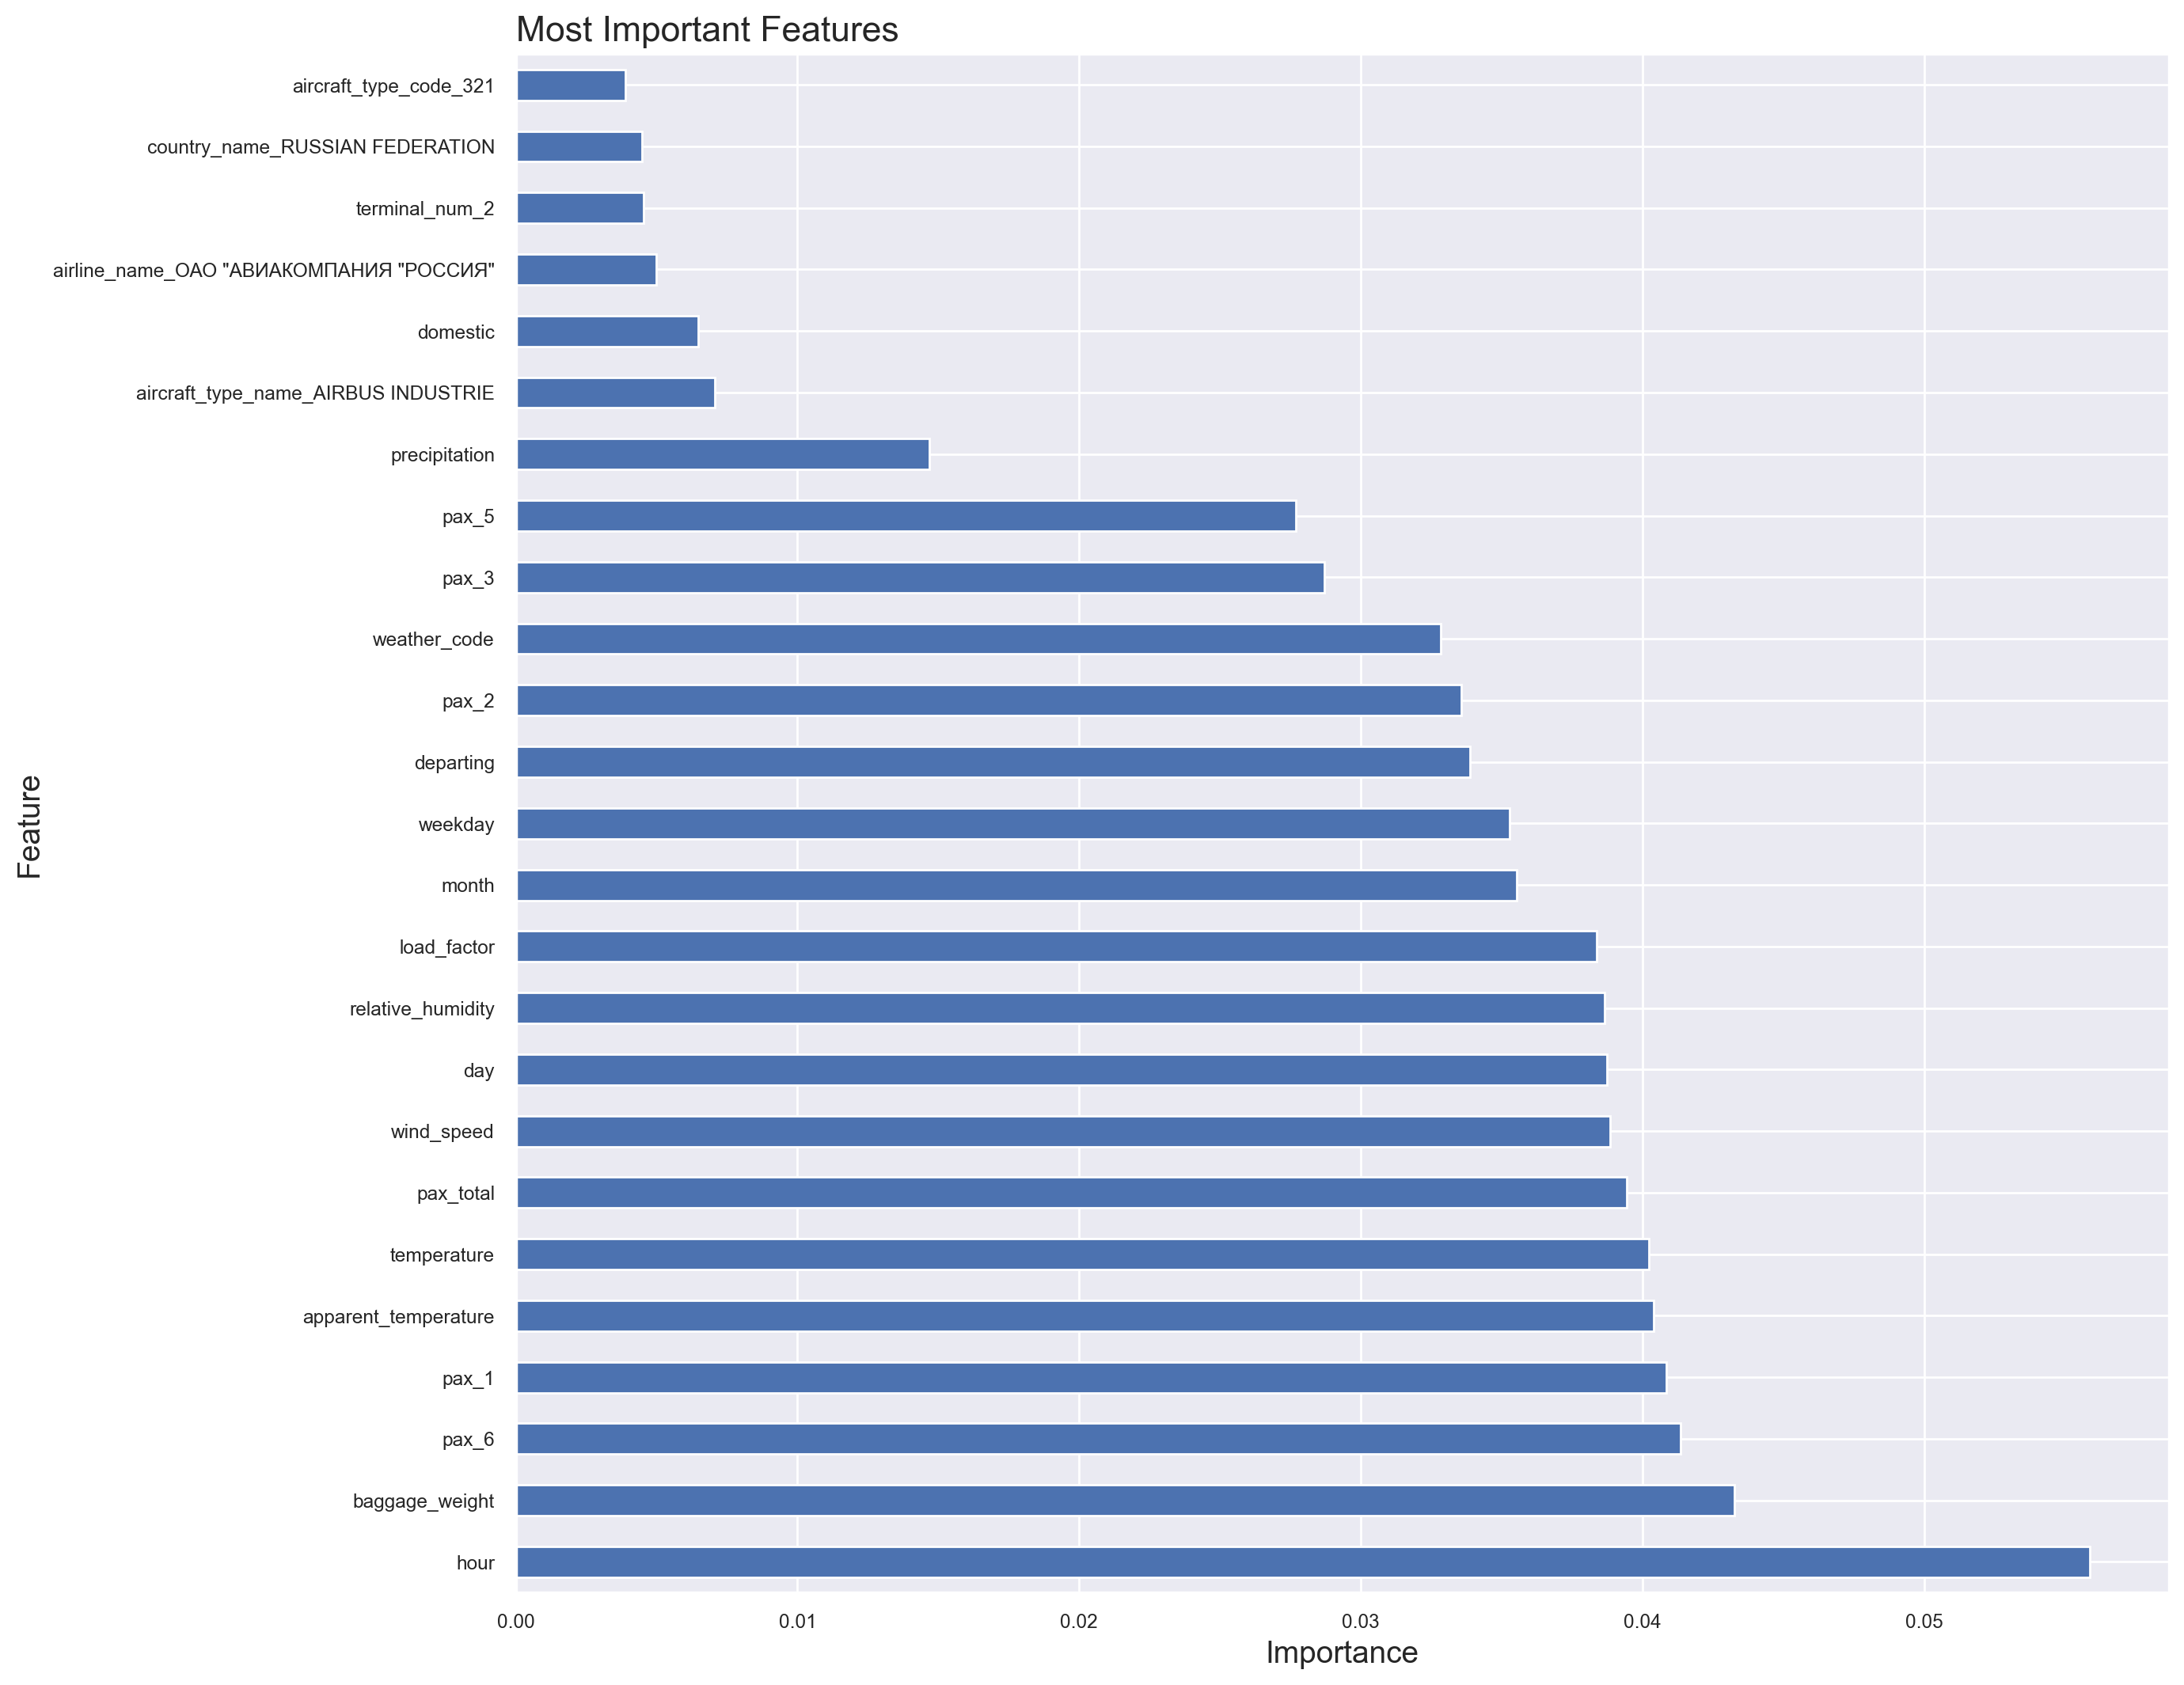

In [170]:
plt.title('Most Important Features', loc='left', fontsize = 16)
plt.ylabel('Feature', fontsize = 14)
plt.xlabel('Importance', fontsize = 14)
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(25)
   .plot(kind='barh', figsize=(12,12)));

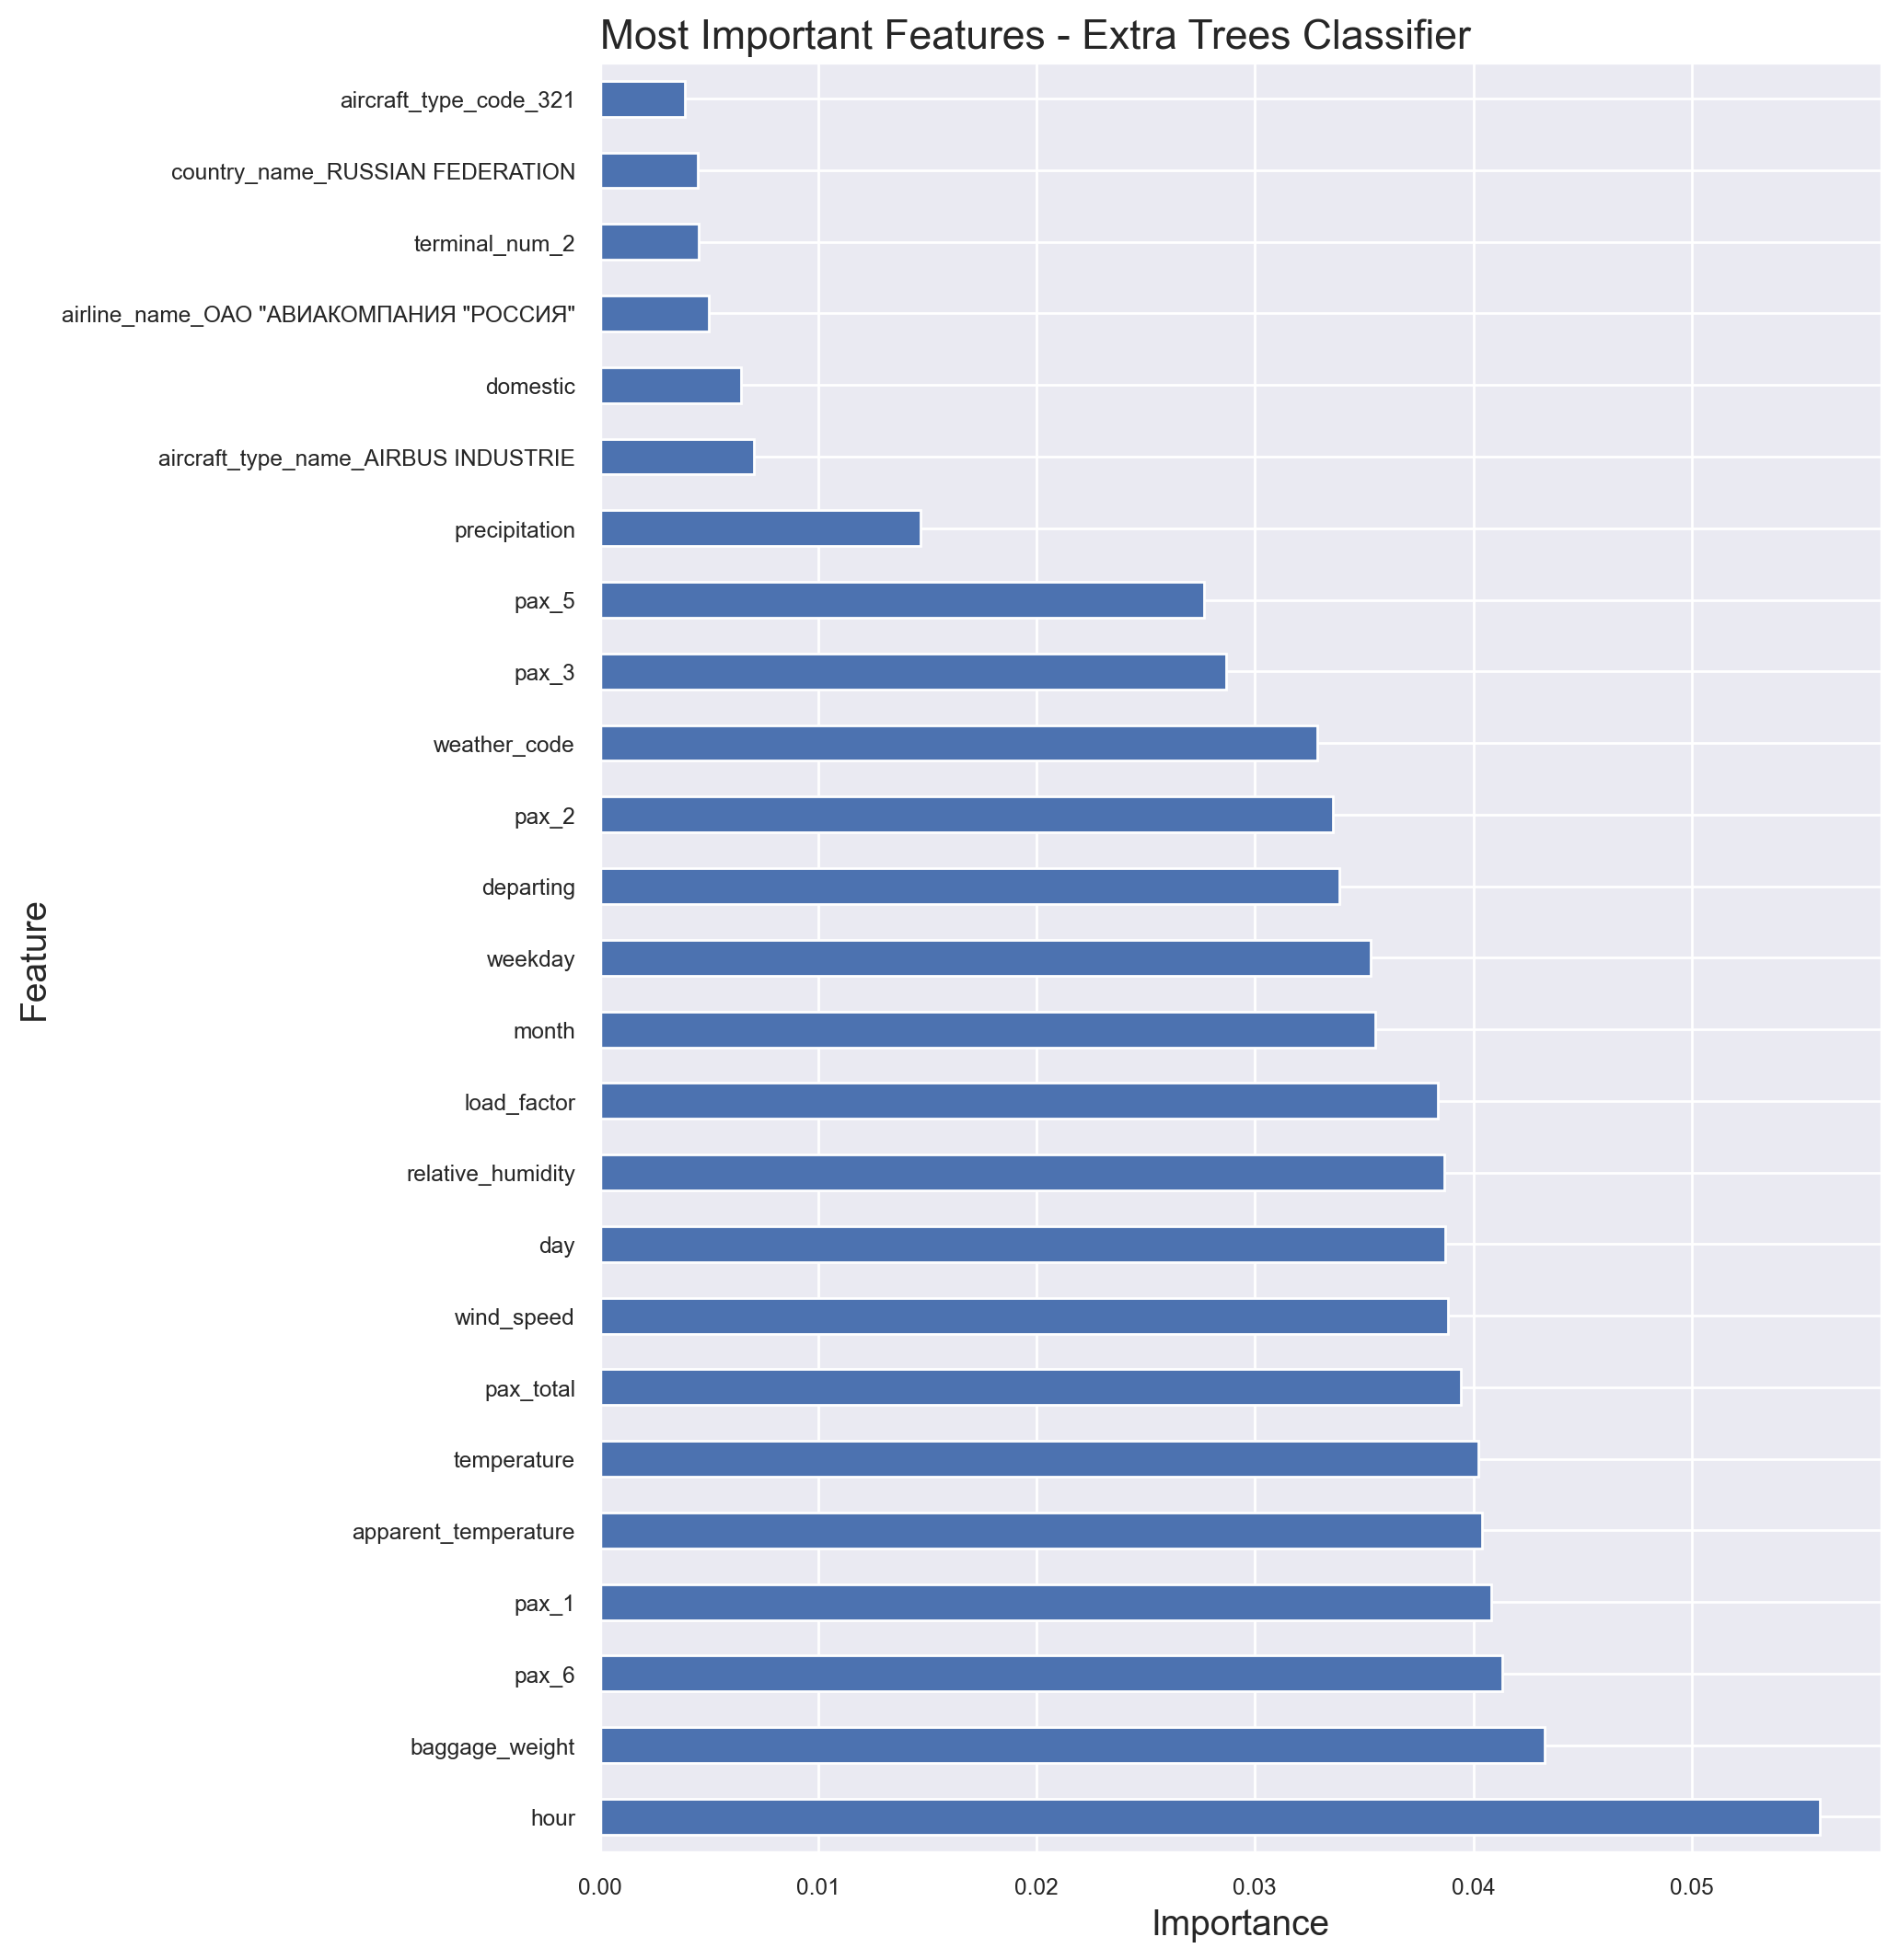

In [192]:
plt.title('Most Important Features - Extra Trees Classifier', loc='left', fontsize = 16)
plt.ylabel('Feature', fontsize = 14)
plt.xlabel('Importance', fontsize = 14)
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(25)
   .plot(kind='barh', figsize=(8,12)));

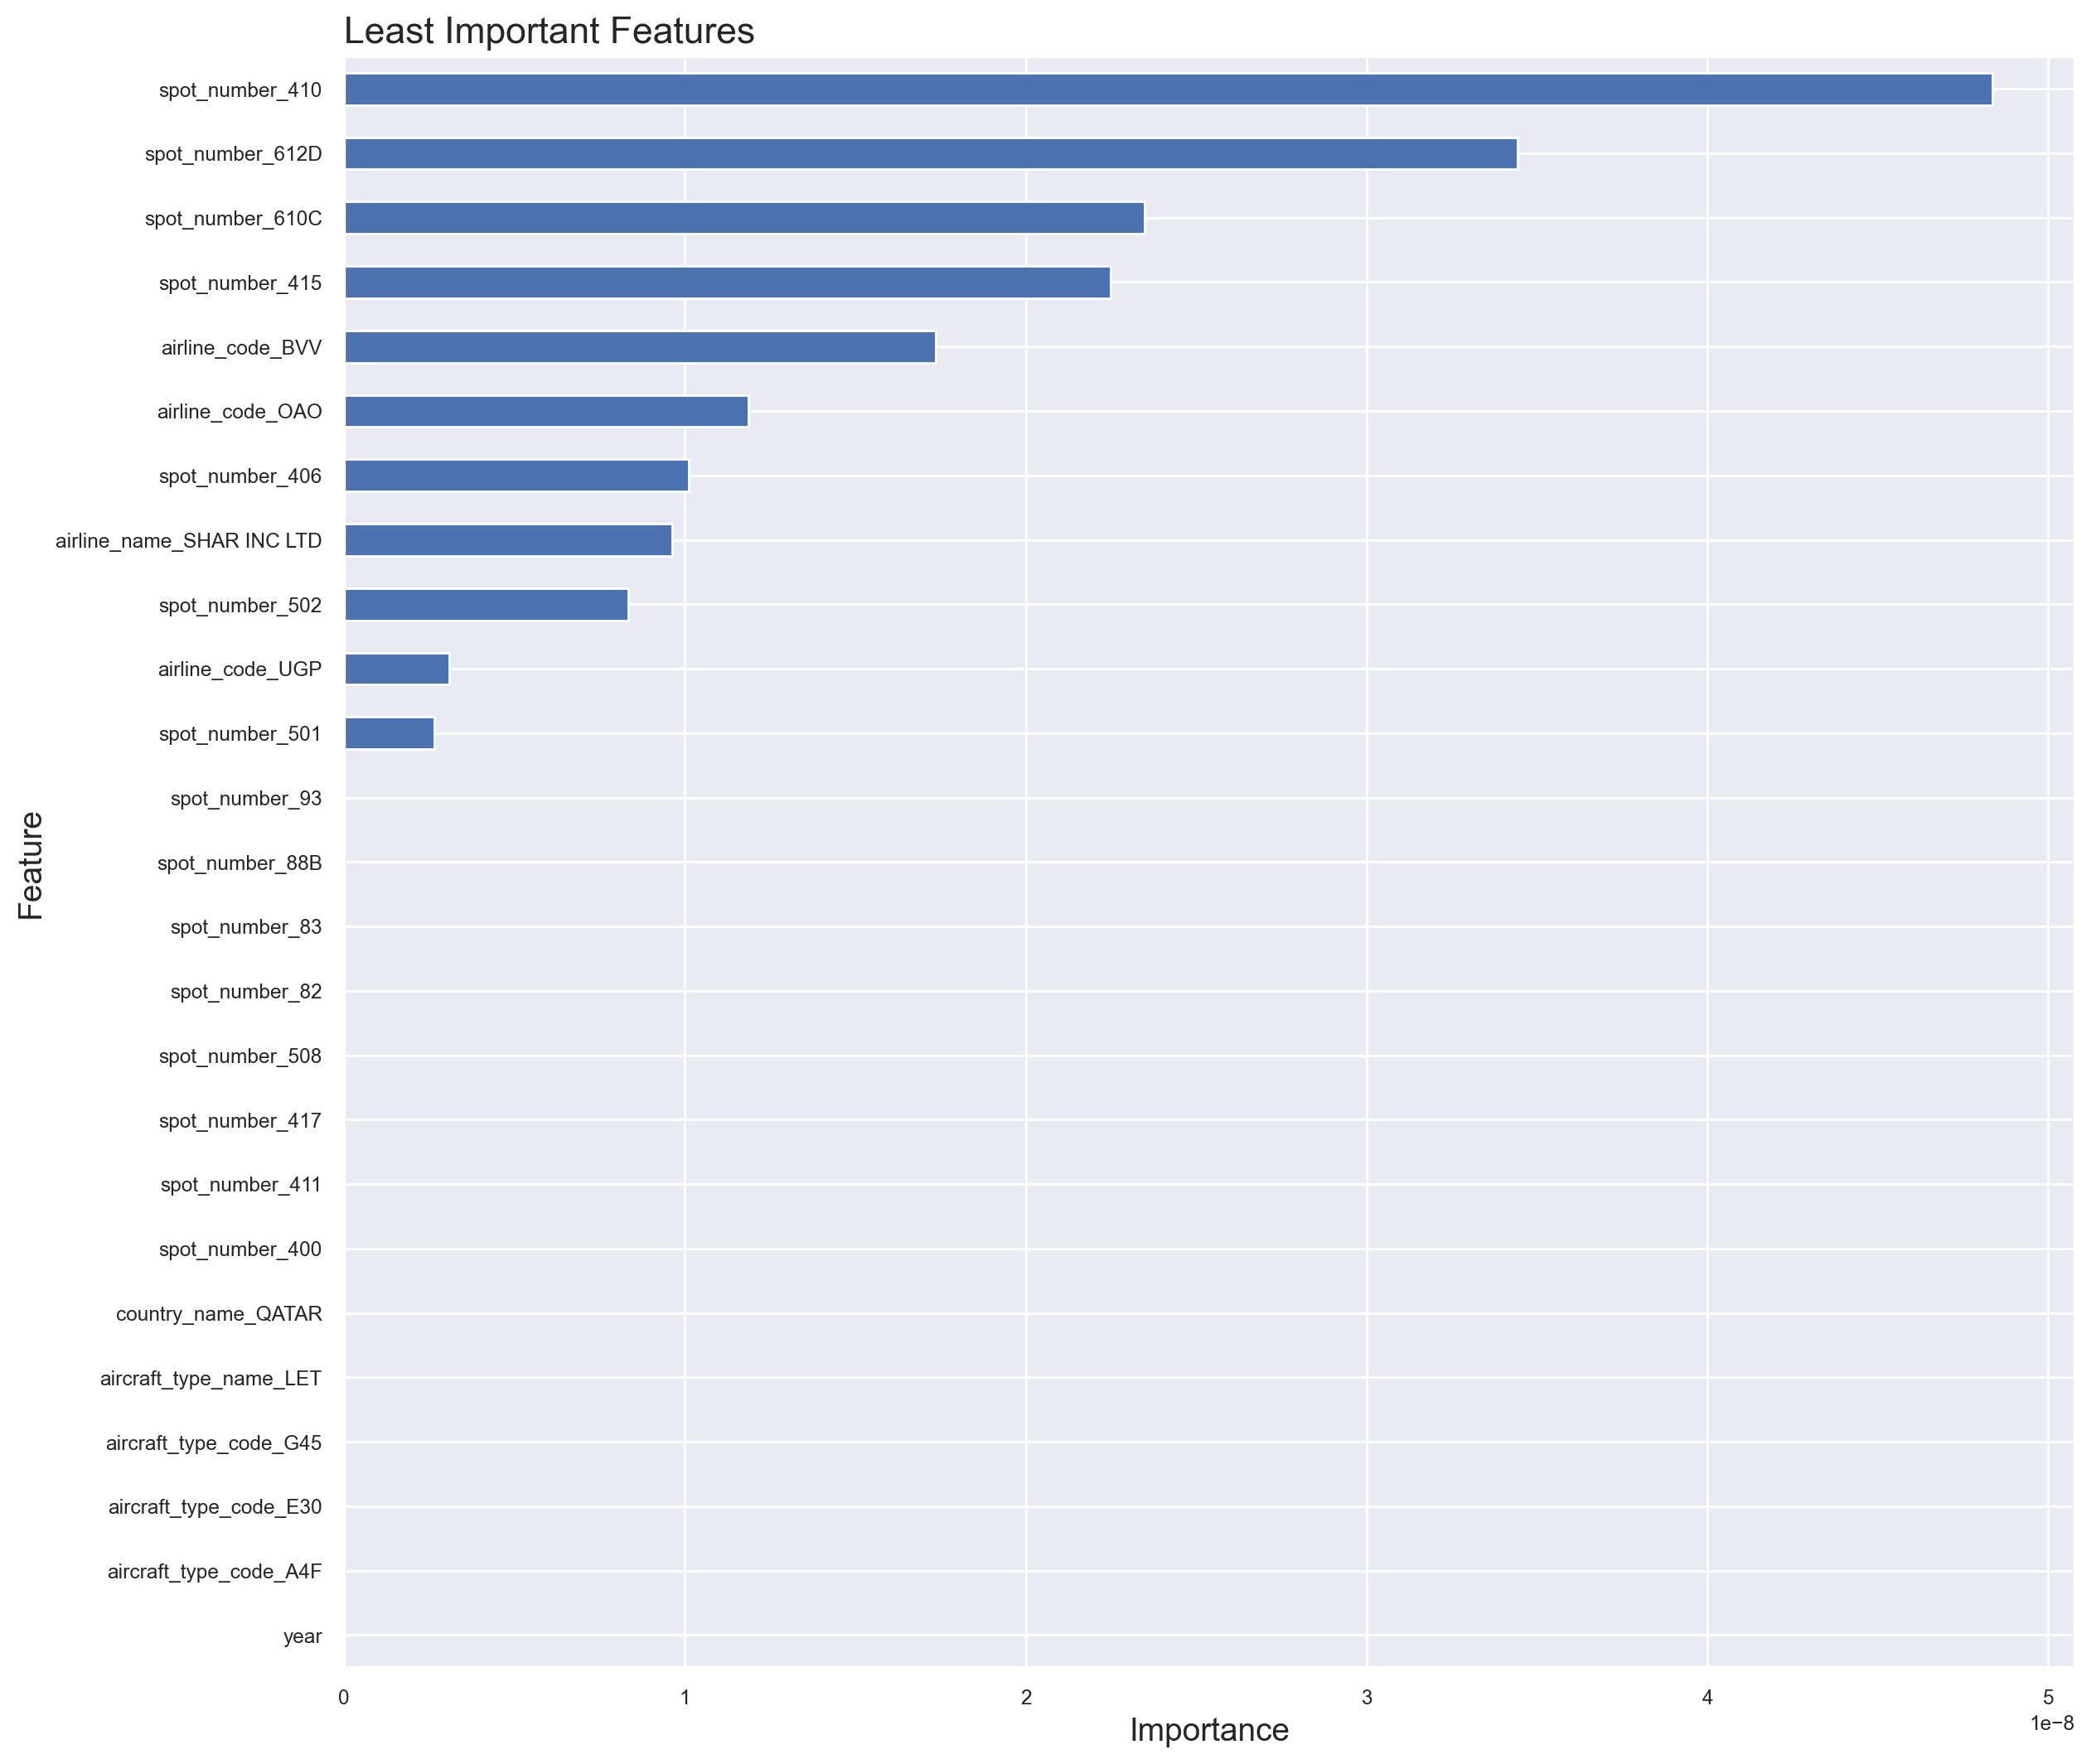

In [171]:
plt.title('Least Important Features', loc='left', fontsize = 16)
plt.ylabel('Feature', fontsize = 14)
plt.xlabel('Importance', fontsize = 14)
(pd.Series(model.feature_importances_, index=X.columns)
   .nsmallest(25)
   .plot(kind='barh', figsize=(12,12)));

The most important feature is **hour**, followed by **baggage_weight** and **pax_6**: in general, the most important features are original predictors, rather than dummified ones.
  
  On the other side, the least important feature seems to be **year** (that should have been removed from the predictors because it has always the same value), followed by a few **aircraft_type_code**: we need to consider that we are working with really small numbers here so the difference is probably not meaningful.  
  
  ***

## Model Evaluation

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve


In [19]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

#### Confusion Matrix

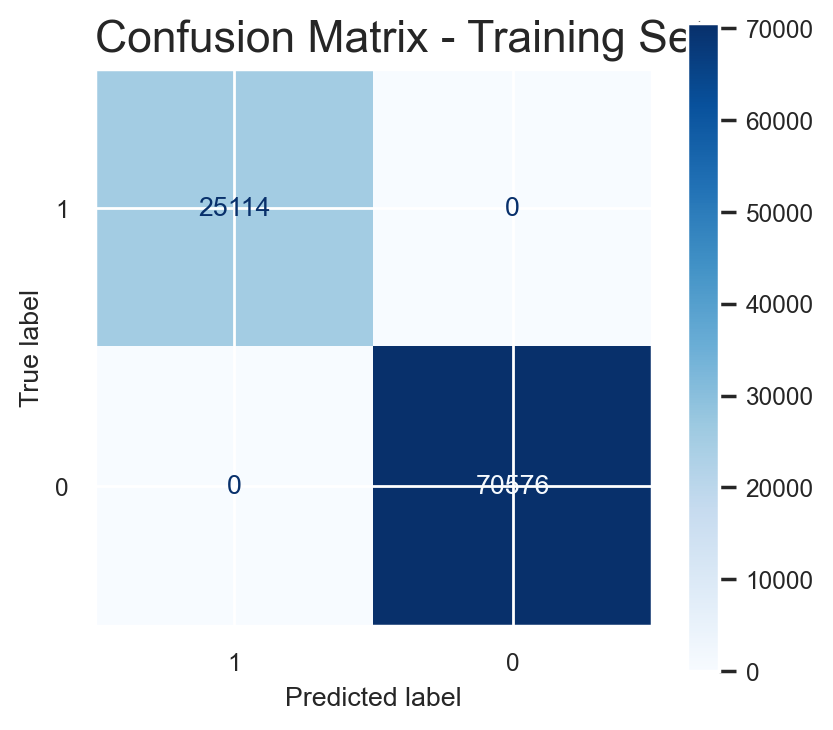

In [174]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(model, X_train, y_train, cmap='Blues', labels=[1, 0], ax=ax)
plt.title('Confusion Matrix - Training Set', loc='left', fontsize = 16)
plt.show()

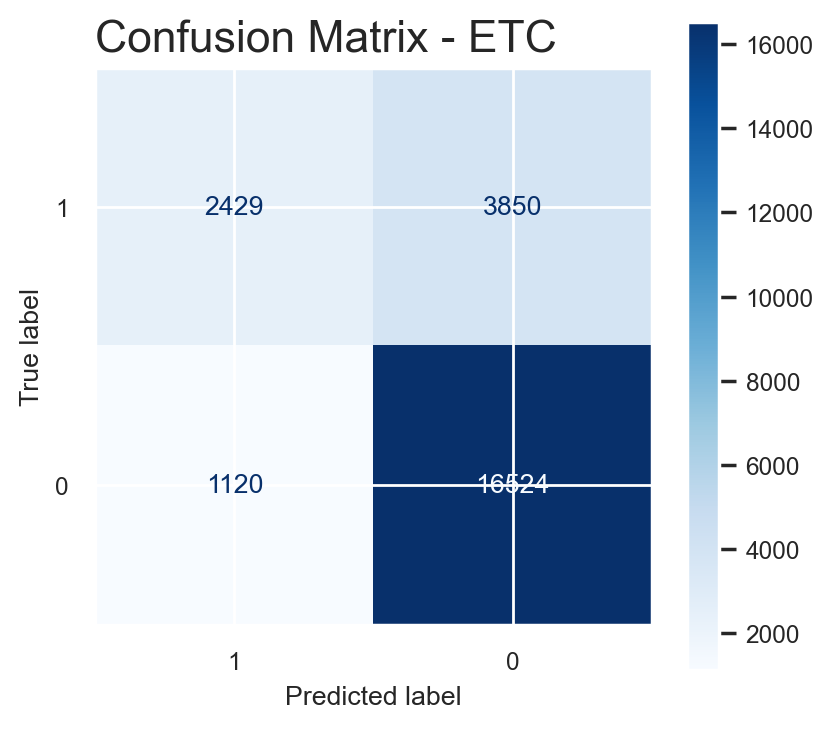

In [193]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', labels=[1, 0], ax=ax)
plt.title('Confusion Matrix - ETC', loc='left', fontsize = 16)
plt.show()

We have two rather unbalanced classes (baseline is **0.74**) and the model tends to predict more often the majority class, that in our case is **0** (not delayed).

#### Classification Report

In [22]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70576
           1       1.00      1.00      1.00     25114

    accuracy                           1.00     95690
   macro avg       1.00      1.00      1.00     95690
weighted avg       1.00      1.00      1.00     95690



In [23]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     17644
           1       0.68      0.39      0.49      6279

    accuracy                           0.79     23923
   macro avg       0.75      0.66      0.68     23923
weighted avg       0.78      0.79      0.77     23923



The classification report confirms the unbalanced behaviour of the model.  
The majority class **0** has a good precision score and a very good recall score.  
The minority class **1** has an average precision score and a bad recall score.  

***

#### Receiver Operator Characteristic Curve

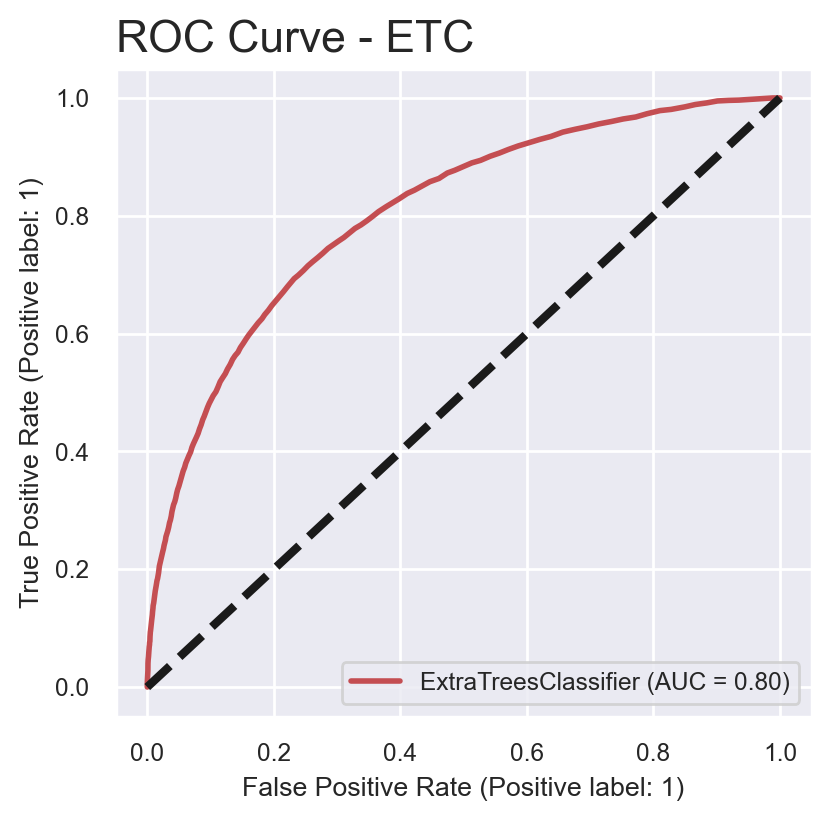

In [194]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_roc_curve(model, X_test, y_test, c='r', lw=2, ax=ax)
plt.title('ROC Curve - ETC', loc='left', fontsize = 16)
ax.plot([0, 1], [0, 1], 'k--', lw=3)
plt.show()

In [25]:
print('ROC-AUC Score:', roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

ROC-AUC Score: 0.8044507491135486


#### Precision-Recall Curve

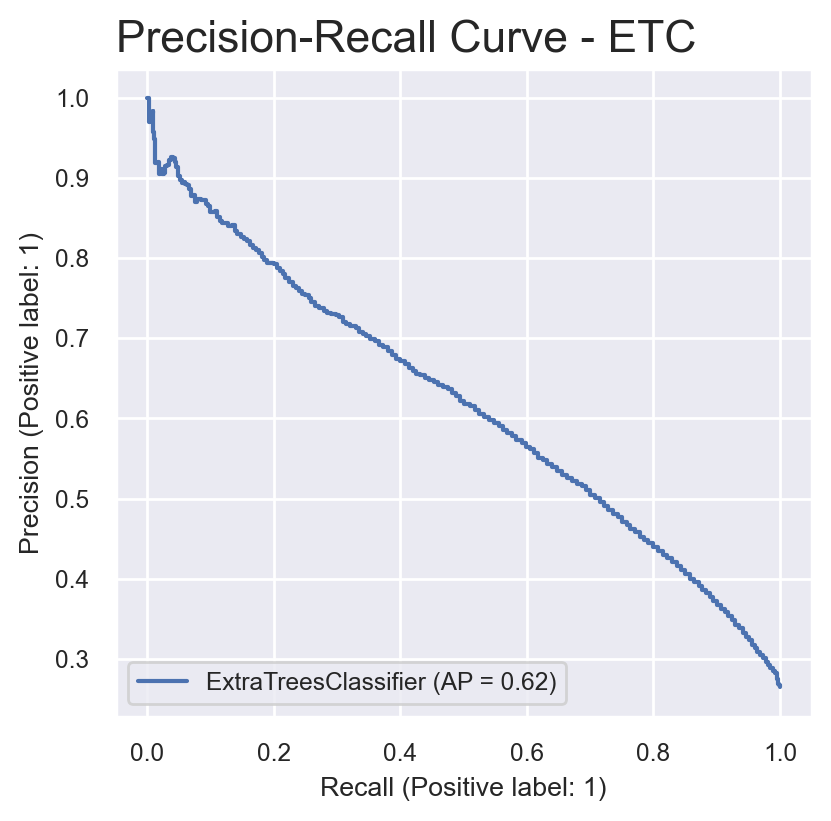

In [195]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_precision_recall_curve(model, X_test, y_test, ax=ax)
plt.title('Precision-Recall Curve - ETC', loc='left', fontsize = 16)
plt.show()

A critical step after implementing a machine learning algorithm is to find out how effective our model is based on metrics and datasets.  
  
  
The Confusion Matrix is not entirely a performance metric but provides a basis on which other metrics can evaluate the results.  
In our example it shows clearly that the model is biased towards the **majority class (0)** which is then **overpredicted**.  

The Classification Report confirms the unbalanced behaviour of the model.  
The majority class has a good precision score and a very good recall score.  
The minority class has an average precision score and a bad recall score.  
  
  The ROC-AUC Score is **0.80**, which tells us that the model has a fairly good class separation capacity.  
  The precision-recall curve shows the tradeoff between precision and recall for different threshold; here the PR-AUC is **0.62**, the curve descends in an atypical monotonic fashion, and the precision decreases significantly at **0.75** when recall is around **0.25**.  
  <br/><br/>
  





#### Logistic Regression CV

In [61]:
lr_CV = LogisticRegressionCV(solver='lbfgs', multi_class='auto', cv=5, max_iter = 1000)
lr_CV.fit(X_train, y_train)
#use the C calculated from CV model, plug into regular Logistic Regression model
lr_CV.Cs


# Instantiating the model 
logreg = LogisticRegression(C = 10, max_iter = 1000)

# Fitting the model
logreg.fit(X_train, y_train)

# Calculating scores
logreg_train = logreg.score(X_train, y_train)
logreg_test = logreg.score(X_test, y_test)
logreg_cv = (cross_val_score(logreg, X_train, y_train, cv = 10)).mean()

# Collecting the scores in a dataframe to compare different models later
logreg_df = pd.DataFrame([logreg_train, logreg_test, logreg_cv], index = ['train', 'test', 'cv'], columns=['Logistic Reg'])

print('Logistic Regression Scores: \n')
print('train score: ', logreg_train)
print('test score: ', logreg_test)
print('CV score: ', logreg_cv)


Logistic Regression Scores: 

train score:  0.7643222907304839
test score:  0.7642018141537432
CV score:  0.7620022990908141


In [62]:
lr_CV = LogisticRegressionCV(solver='saga', multi_class='auto', cv=5, max_iter = 1000)
lr_CV.fit(X_train, y_train)
#use the C calculated from CV model, plug into regular Logistic Regression model
lr_CV.Cs


# Instantiating the model 
logreg = LogisticRegression(solver='saga', C = 10, max_iter = 1000)

# Fitting the model
logreg.fit(X_train, y_train)

# Calculating scores
logreg_train = logreg.score(X_train, y_train)
logreg_test = logreg.score(X_test, y_test)
logreg_cv = (cross_val_score(logreg, X_train, y_train, cv = 10)).mean()

# Collecting the scores in a dataframe to compare different models later
logreg_df = pd.DataFrame([logreg_train, logreg_test, logreg_cv], index = ['train', 'test', 'cv'], columns=['Logistic Reg'])

print('Logistic Regression Scores: \n')
print('train score: ', logreg_train)
print('test score: ', logreg_test)
print('CV score: ', logreg_cv)


Logistic Regression Scores: 

train score:  0.7643222907304839
test score:  0.7642018141537432
CV score:  0.7620022990908141


In [178]:
# Collecting the model coefficients in a dataframe
lr_coef = pd.DataFrame(logreg.coef_[0], index=X_train.columns, columns=['coefficients'])
lr_coef.sort_values(by = 'coefficients', ascending = False)[:10]

coefficients
pax_1                                      1.197837
temperature                                0.882513
airline_name_НАК БЕЛОРУССИИ "БЕЛАВИА"      0.629624
airline_code_B2                            0.629624
pax_6                                      0.460031
domestic                                   0.378655
country_name_CHINA                         0.378222
load_factor                                0.309059
baggage_weight                             0.285298
airline_name_KLM-ROYAL DUTCH AIRLINES      0.282670

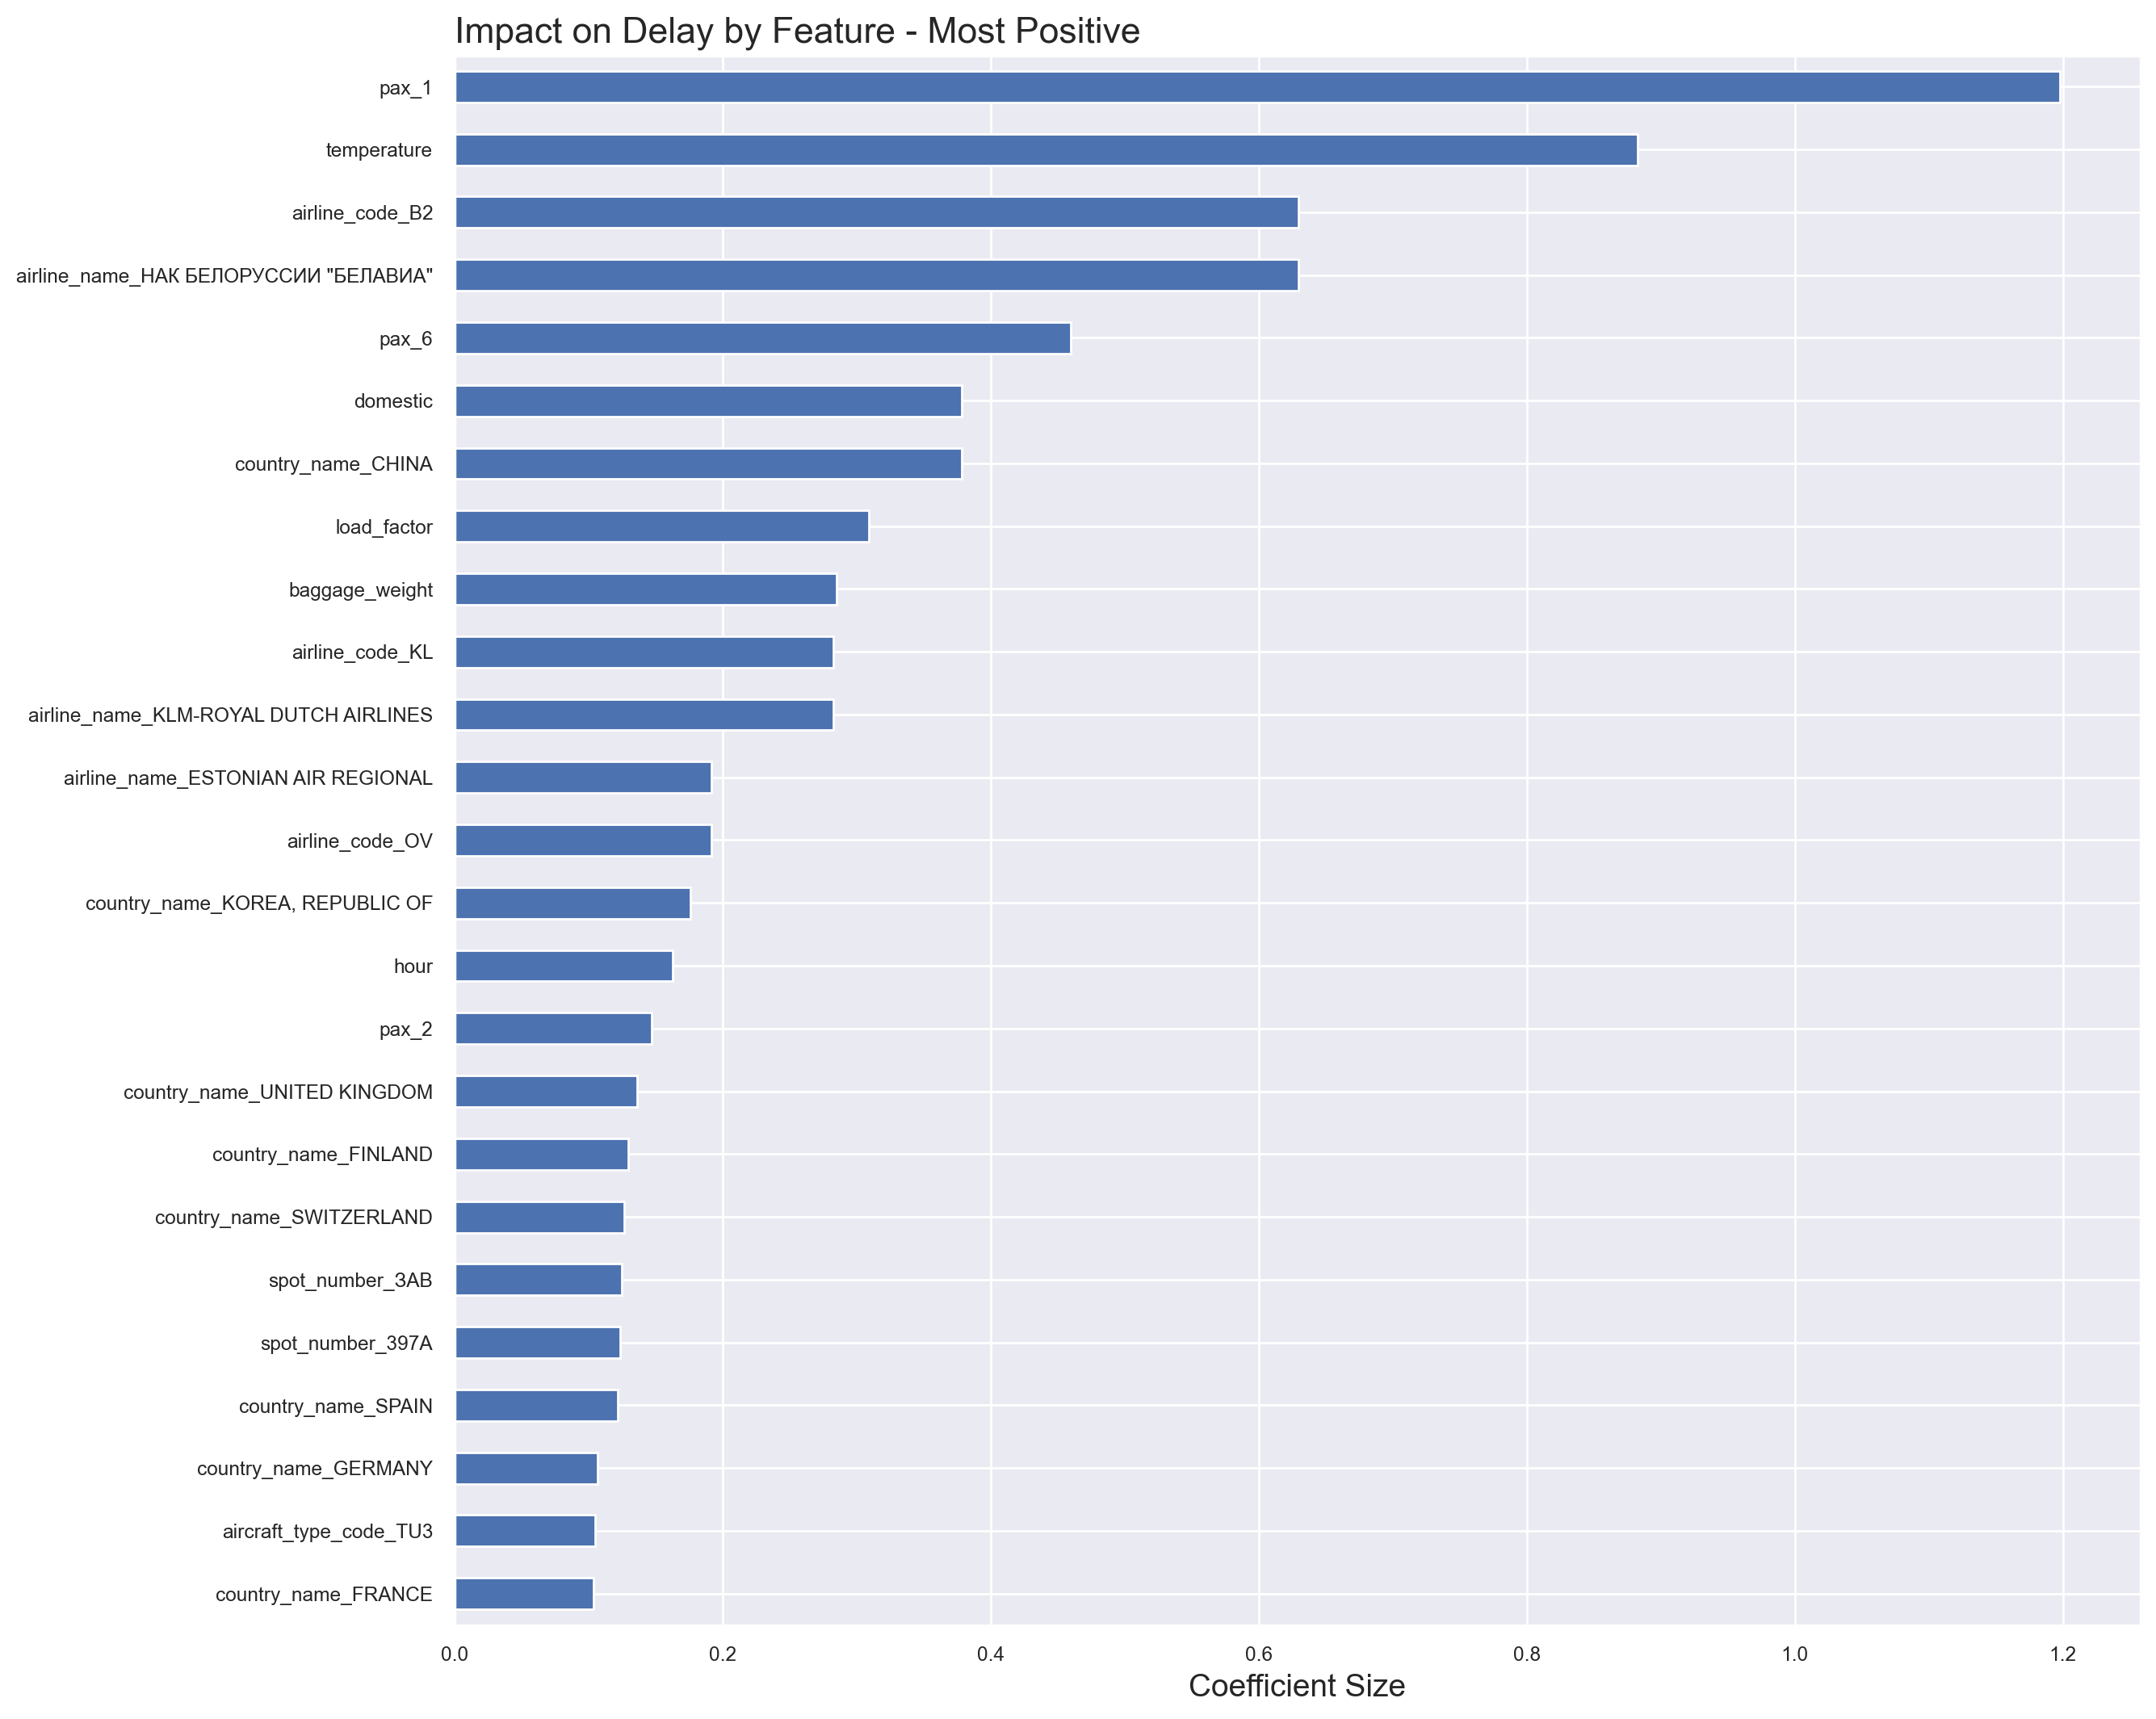

In [180]:
# Plotting the coefficients
plt.figure(figsize=(12,12))
plt.title('Impact on Delay by Feature - Most Positive', loc='left', fontsize = 16)
plt.xlabel('Coefficient Size', fontsize = 14)

lr_coef['coefficients'].sort_values(ascending = True).tail(25).plot(kind='barh');

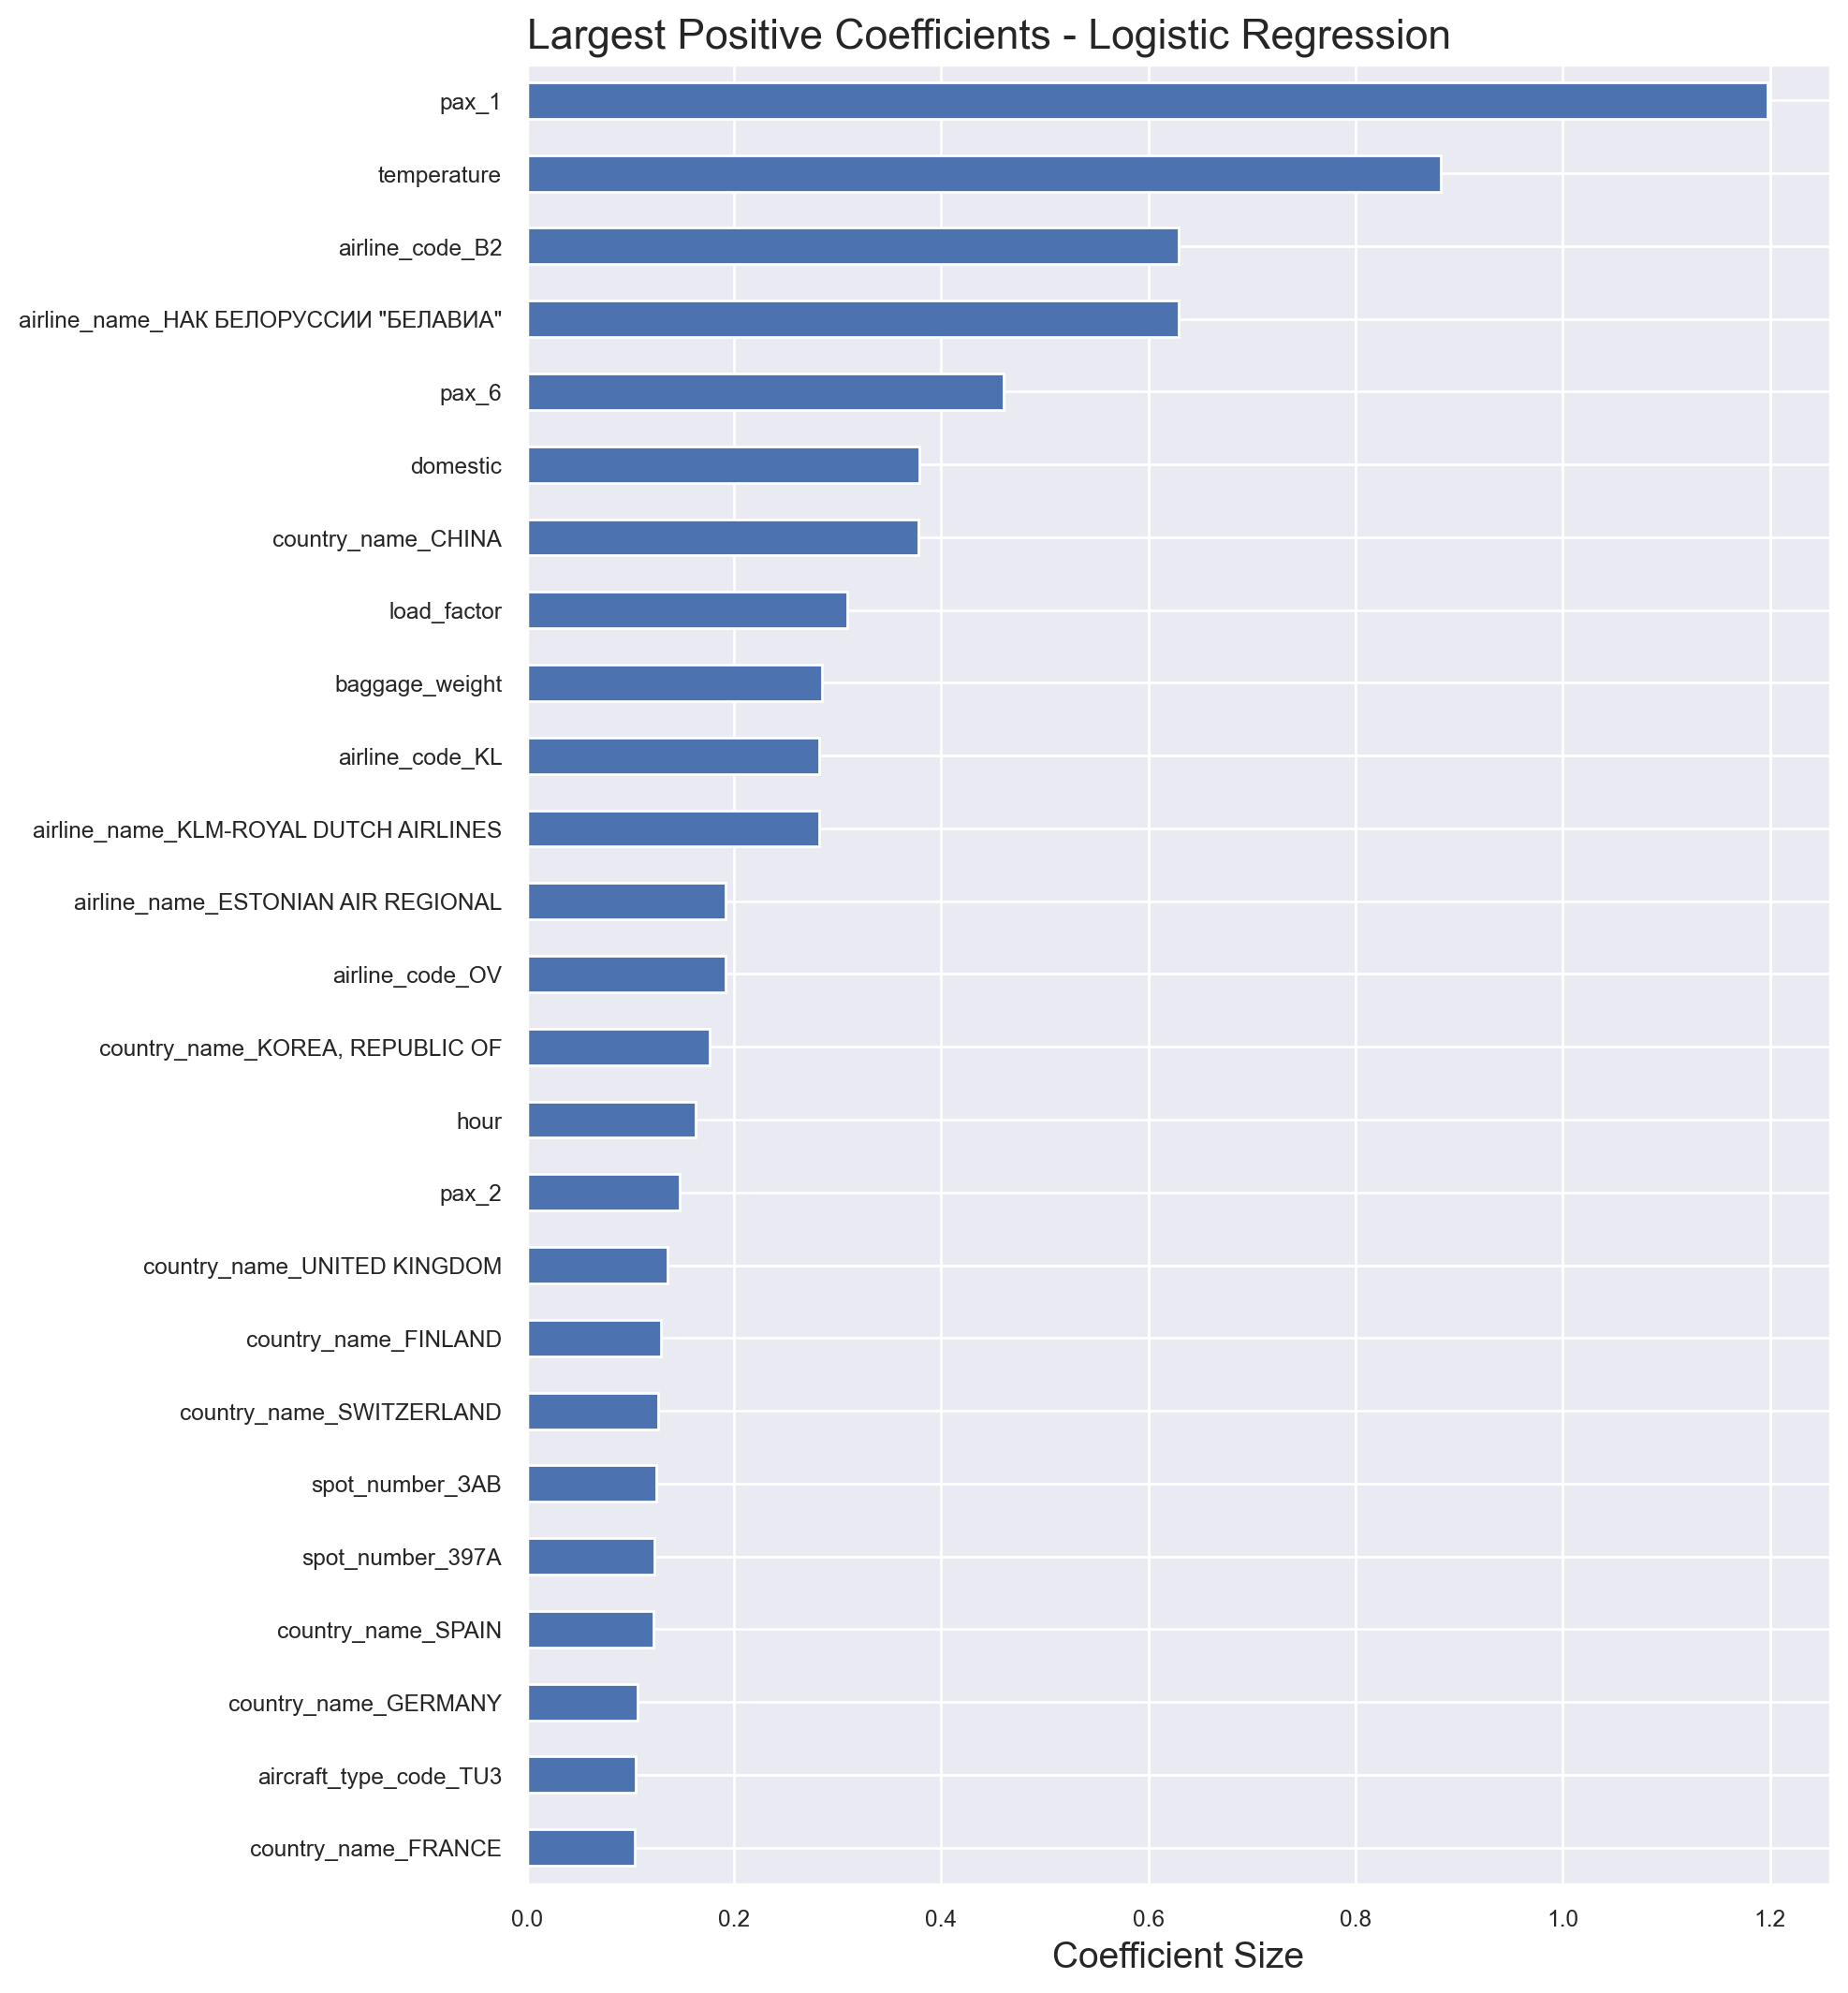

In [191]:
# Plotting the coefficients
plt.figure(figsize=(8,12))
plt.title('Largest Positive Coefficients - Logistic Regression', loc='left', fontsize = 16)
plt.xlabel('Coefficient Size', fontsize = 14)

lr_coef['coefficients'].sort_values(ascending = True).tail(25).plot(kind='barh');

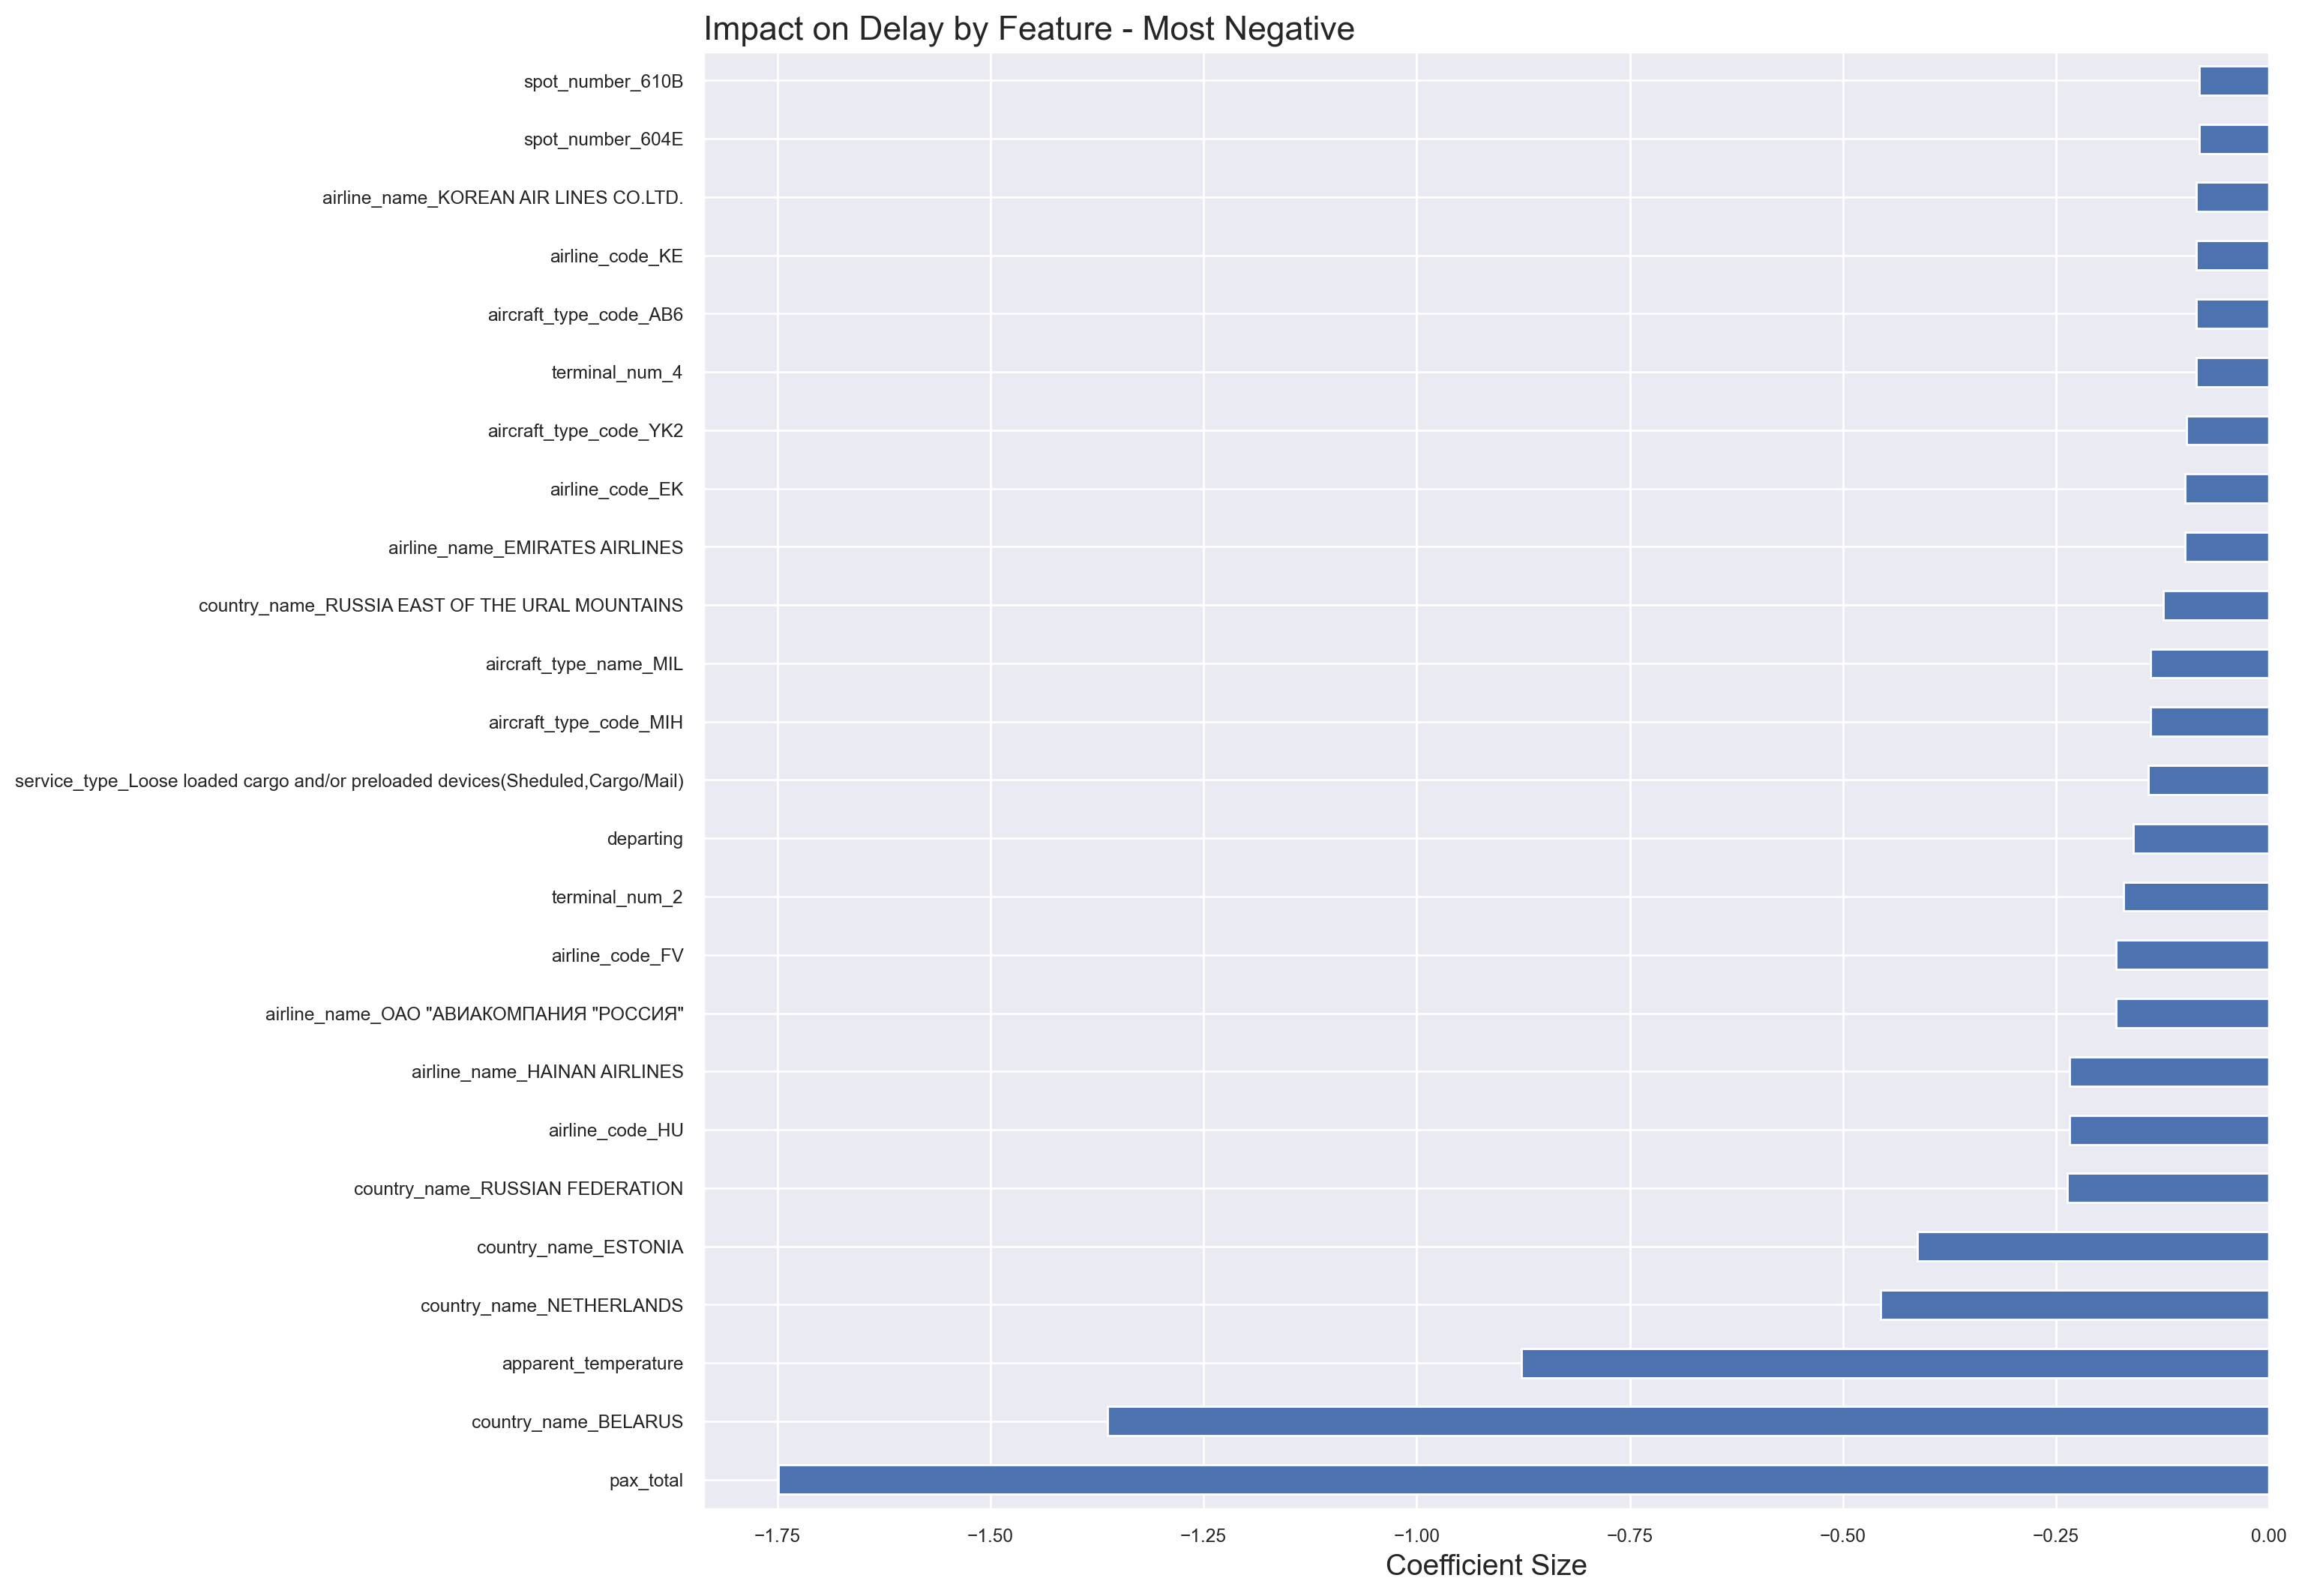

In [181]:
# Plotting the coefficients
plt.figure(figsize=(12,12))
plt.title('Impact on Delay by Feature - Most Negative', loc='left', fontsize = 16)
plt.xlabel('Coefficient Size', fontsize = 14)

lr_coef['coefficients'].sort_values(ascending = True).head(25).plot(kind='barh');

In [182]:
predictions = logreg.predict(X_test)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     17644
           1       0.64      0.24      0.34      6279

    accuracy                           0.76     23923
   macro avg       0.71      0.59      0.60     23923
weighted avg       0.74      0.76      0.72     23923



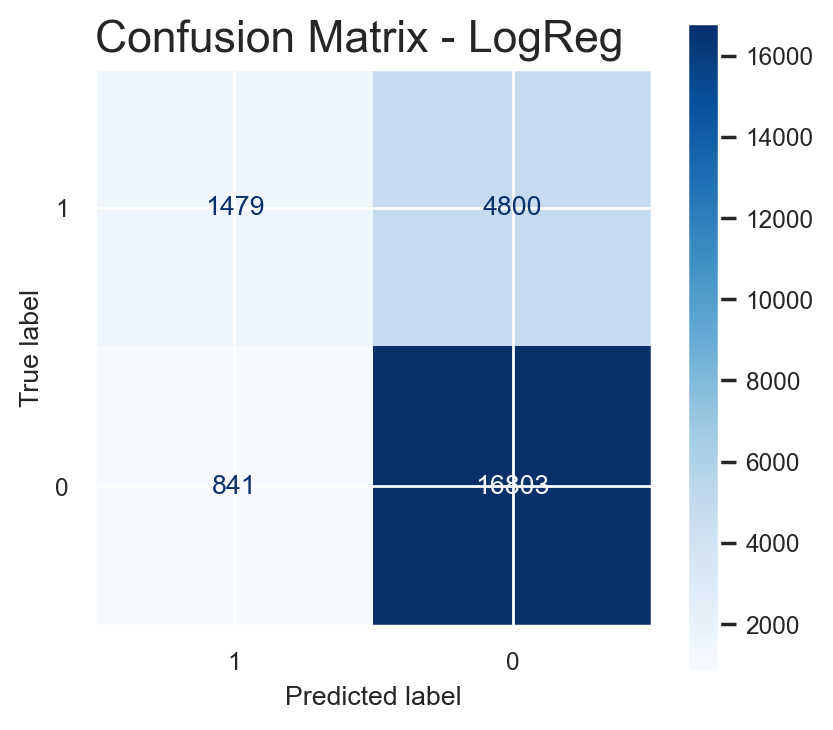

In [196]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', labels=[1, 0], ax=ax)
plt.title('Confusion Matrix - LogReg', loc='left', fontsize = 16)
plt.show()

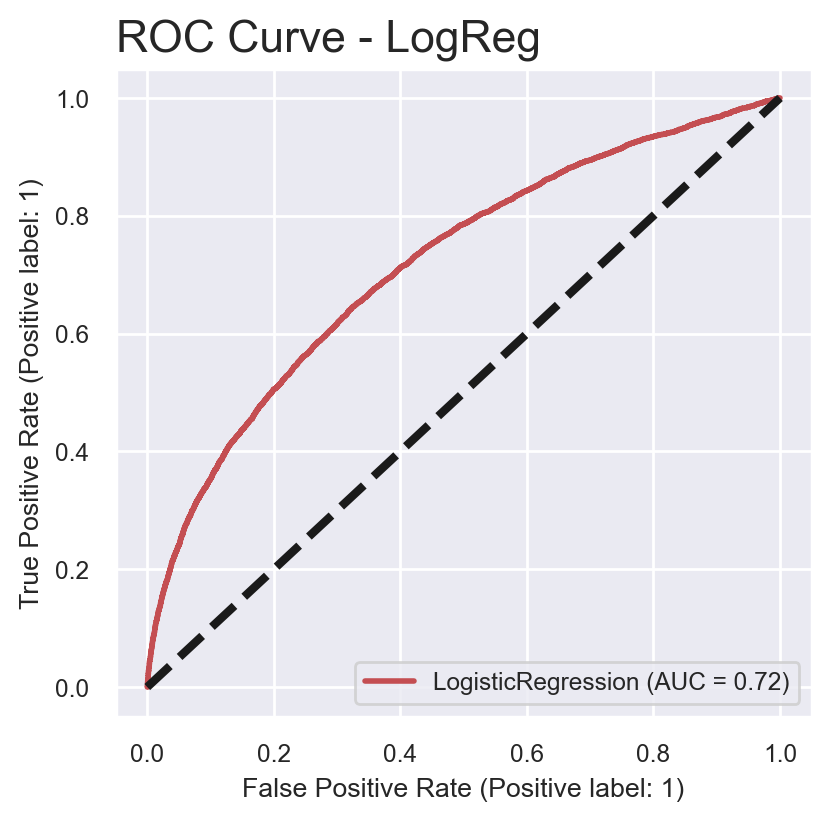

In [197]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_roc_curve(logreg, X_test, y_test, c='r', lw=2, ax=ax)
plt.title('ROC Curve - LogReg', loc='left', fontsize = 16)
ax.plot([0, 1], [0, 1], 'k--', lw=3)
plt.show()

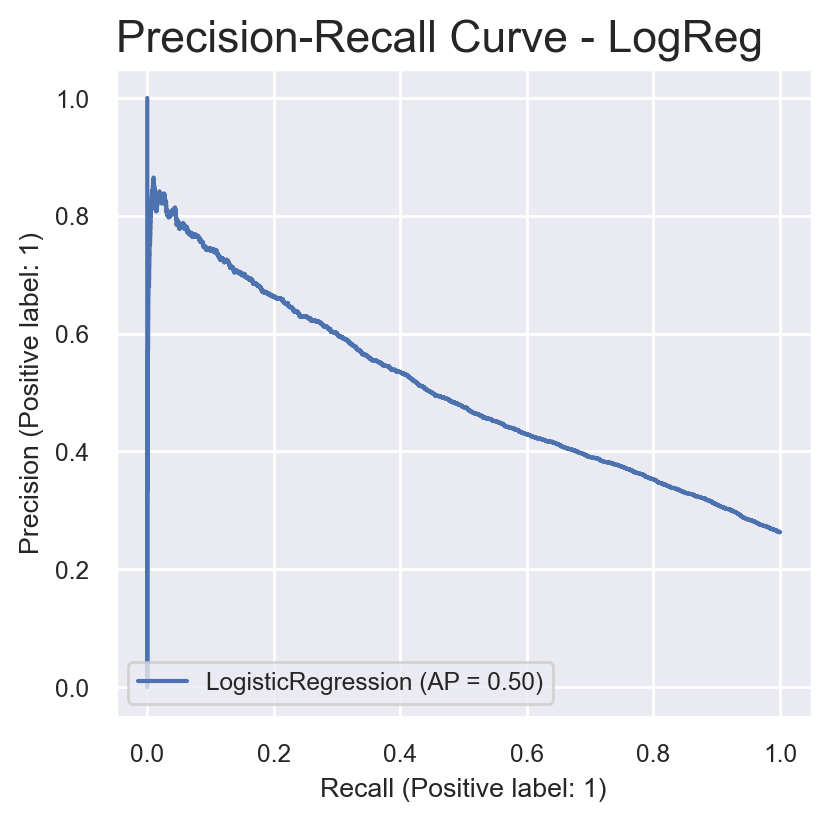

In [198]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_precision_recall_curve(logreg, X_test, y_test, ax=ax)
plt.title('Precision-Recall Curve - LogReg', loc='left', fontsize = 16)
plt.show()

#### Neural Networks try

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [42]:
clf = MLPClassifier(solver='adam',
                    alpha=10**(0),
                    hidden_layer_sizes=(8, 8, 8, 8, 8),
                    activation='tanh',
                    random_state=42,
                    batch_size=50,
                    max_iter=500)
clf.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, clf.predict(X_test)))

0.7445554487313464


In [43]:
clf = MLPClassifier(solver='adam',
                    alpha=10**(0),
                    hidden_layer_sizes=(8, 8, 8, 8, 8),
                    activation='relu',
                    random_state=42,
                    batch_size=50,
                    max_iter=500)
clf.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, clf.predict(X_test)))

0.7592693224093968


In [44]:
clf = MLPClassifier(solver='sgd',
                    alpha=10**(0),
                    hidden_layer_sizes=(8, 8, 8, 8, 8),
                    activation='relu',
                    random_state=42,
                    batch_size=50,
                    max_iter=500)
clf.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, clf.predict(X_test)))

0.7375329181122768


In [46]:
clf = MLPClassifier(solver='adam',
                    alpha=10**(0),
                    hidden_layer_sizes=(6, 6, 8, 8, 8, 6, 6),
                    activation='tanh',
                    random_state=42,
                    batch_size=50,
                    max_iter=500)
clf.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, clf.predict(X_test)))

0.7375329181122768


In [48]:
clf = MLPClassifier(solver='adam',
                    alpha=10**(0),
                    hidden_layer_sizes=(8, 8, 8, 8, 8, 8, 8),
                    activation='tanh',
                    random_state=42,
                    batch_size=50,
                    max_iter=500)
clf.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, clf.predict(X_test)))

0.7424654098566233


In [50]:
clf = MLPClassifier(solver='adam',
                    alpha=10**(0),
                    hidden_layer_sizes=(8, 10, 8, 10, 8, 10, 8),
                    activation='tanh',
                    random_state=42,
                    batch_size=50,
                    max_iter=500)
clf.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, clf.predict(X_test)))

0.7448898549513021


In [51]:
clf = MLPClassifier(solver='adam',
                    alpha=10**(0),
                    hidden_layer_sizes=(8, 10, 12, 10, 12, 10, 8),
                    activation='tanh',
                    random_state=42,
                    batch_size=50,
                    max_iter=500)
clf.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, clf.predict(X_test)))

0.749864147473143


In [54]:
clf = MLPClassifier(solver='adam',
                    alpha=10**(0),
                    hidden_layer_sizes=(12, 12, 12, 12, 12),
                    activation='tanh',
                    random_state=42,
                    batch_size=50,
                    max_iter=500)
clf.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, clf.predict(X_test)))

0.7375329181122768
